In [428]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from scipy import stats

pd.set_option('display.max_colwidth',None)
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
stats.ch

#  Importing data

In [154]:
#Importing files

ld1 = pd.read_csv('loan_data_2007_2014.csv', index_col = 0) #index_col = 0, will use first column as index in dataframe
ld2 = pd.read_csv('loan_data_2015.csv')

## Basic data information

In [155]:
print('total number of rows and columns for dataset1 ld1: ', ld1.shape)
print('total number of rows and columns for dataset2 ld2: ', ld2.shape)

total number of rows and columns for dataset1 ld1:  (466285, 74)
total number of rows and columns for dataset2 ld2:  (421094, 74)


In [156]:
ld1.head(2)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment grade sub_grade  ... total_bal_il il_util open_rv_12m  open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m
0  1077501    1296599       5000         5000           4975.0   36 months     10.65       162.87     B        B2  ...          NaN     NaN         NaN          NaN        NaN      NaN              NaN    NaN         NaN          NaN
1  1077430    1314167       2500         2500           2500.0   60 months     15.27        59.83     C        C4  ...          NaN     NaN         NaN          NaN        NaN      NaN              NaN    NaN         NaN          NaN

[2 rows x 74 columns]

In [157]:
ld2.tail(2)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment grade sub_grade  ... total_bal_il il_util open_rv_12m  open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m
421092  36490806   39222577      12000        12000          12000.0   60 months     19.99       317.86     E        E3  ...          NaN     NaN         NaN          NaN        NaN      NaN          27000.0    NaN         NaN          NaN
421093  36271262   38982659      20000        20000          20000.0   36 months     11.99       664.20     B        B5  ...          NaN     NaN         NaN          NaN        NaN      NaN          41700.0    NaN         NaN          NaN

[2 rows x 74 columns]

In [158]:
df = pd.concat([ld1, ld2])

In [159]:
df.reset_index(drop =True,inplace= True)


### dataset shape

In [160]:
df.shape

(887379, 74)

# Note:- 

* We are trimming our taget column at starting to reduce unwanted datas and to work smoothly with a limited computing resources.

#### In our project, we are mainly focused on predicting True Negatives, like given info about a customer, model needs to predict that whether they are going to default or not, so we will only keep, three values out of 10,and they are as follows:

Fully Paid

Charged off

Default

In [161]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

In [162]:
df.drop(df[df['loan_status'].isin(['Current', 
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'])].index,inplace = True)

In [163]:
df.reset_index(drop = True,inplace = True)

In [164]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Default'], dtype=object)

In [165]:
df.replace('Charged Off','Default',inplace = True)

## Datatype verification

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254190 entries, 0 to 254189
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           254190 non-null  int64  
 1   member_id                    254190 non-null  int64  
 2   loan_amnt                    254190 non-null  int64  
 3   funded_amnt                  254190 non-null  int64  
 4   funded_amnt_inv              254190 non-null  float64
 5   term                         254190 non-null  object 
 6   int_rate                     254190 non-null  float64
 7   installment                  254190 non-null  float64
 8   grade                        254190 non-null  object 
 9   sub_grade                    254190 non-null  object 
 10  emp_title                    240180 non-null  object 
 11  emp_length                   244222 non-null  object 
 12  home_ownership               254190 non-null  object 
 13 

## Conclusion

1) 74 columns info are being displayed over there, their non-null values count and datatypes respectively. While looking over the table it can be easily spotted that almost 17- 18 columns have more than 95% of missing values, So we are going to drop them right away.
2) and, for datattype verification, its a bit tedious task to verify by going through it, so we are going for an indepth data verification after droping columns with large number of missing values.

## Duplicated value check

In [167]:
df.duplicated().sum()

0

#  NOTE:-  Here we are performing a null value check, instead of dataype conversion, "we can't change the datatype with null value presence , so we have to get rid of those missing values prior to perform any conversion".

## Missing value check

In [168]:
mv = pd.DataFrame({'mv_count':df.isnull().sum(),
                                'percent_missing':df.isnull().sum()/len(df) *100}
                              ).sort_values(by = ['percent_missing'], ascending = False)
mv.head(25)

mv_count  percent_missing
dti_joint                      254189        99.999607
verification_status_joint      254189        99.999607
annual_inc_joint               254189        99.999607
il_util                        254064        99.950431
mths_since_rcnt_il             254050        99.944923
open_acc_6m                    254046        99.943349
open_il_6m                     254046        99.943349
open_il_12m                    254046        99.943349
open_il_24m                    254046        99.943349
total_bal_il                   254046        99.943349
inq_last_12m                   254046        99.943349
open_rv_12m                    254046        99.943349
open_rv_24m                    254046        99.943349
max_bal_bc                     254046        99.943349
all_util                       254046        99.943349
inq_fi                         254046        99.943349
total_cu_tl                    254046        99.943349
next_pymnt_d                   252971        99.520437
mths_since_last_record         222376        87.484165
mths_since_last_major_derog    206314        81.165270
desc                           165747        65.205948
mths_since_last_delinq         141446        55.645777
tot_coll_amt                    63726        25.070223
tot_cur_bal                     63726        25.070223
total_rev_hi_lim                63726        25.070223

In [169]:
print('Total no of columns having null values more than 55% are: ',len(mv[mv['percent_missing'].gt(56)]),
'\n', ' ', 'total number of columns in dataset: ', df.shape[1])

Total no of columns having null values more than 55% are:  21 
   total number of columns in dataset:  74


### 21 columns in our dataset has more than 56% of missing values present in them, and out of 21 columns, only 1 column has less than 81% missing valuues.
So we are going to drop all the columns having more than 56% of values present in them.

In [170]:
df.drop(mv[mv['percent_missing'].gt(56)].index, axis = 1, inplace = True)

In [171]:
new= df.copy()

In [172]:
new_mv = pd.DataFrame({'mv_count':df.isnull().sum(),
                                'percent_missing':df.isnull().sum()/len(df) *100}
                              ).sort_values(by = ['percent_missing'], ascending = False).head(12)
new_mv.head(12)

mv_count  percent_missing
mths_since_last_delinq        141446        55.645777
tot_coll_amt                   63726        25.070223
total_rev_hi_lim               63726        25.070223
tot_cur_bal                    63726        25.070223
emp_title                      14010         5.511625
emp_length                      9968         3.921476
last_pymnt_d                     536         0.210866
revol_util                       200         0.078681
collections_12_mths_ex_med        56         0.022031
last_credit_pull_d                21         0.008262
title                             14         0.005508
total_pymnt_inv                    0         0.000000

In [173]:
for row in ['title','emp_length','last_pymnt_d','last_credit_pull_d']:
    df[row].fillna(df[row].mode()[0],inplace = True)

In [174]:
for row in new_mv.index[:12]:
    if df[row].dtypes in ['float64','int64']:
        df[row].fillna(df[row].median(),inplace = True)
    else:
        pass 
    

In [175]:
df.shape

(254190, 53)

#### Note: 
As the information present in above cell is a bit confusing and there is a chance of making errors, we will go for an indepth datatype verification.

# Datatype Correction

####  Creating a dataframe having column names of our dataset as values in index column and their datatypes as values in other one.

In [176]:
#creating a dataframe having variables and their datatypes in seperate columns

df_d = pd.DataFrame(df.dtypes)          #dataframe for datatypes as read by system
df_d.reset_index(inplace = True)
df_d.head(5)

index        0
0               id    int64
1        member_id    int64
2        loan_amnt    int64
3      funded_amnt    int64
4  funded_amnt_inv  float64

##### importing original csv file containing variables and thier actual datatypes along with their descriptions

In [177]:
!pip install openpyxl

In [178]:
#importing original csv file containing variables and thier actual datatypes along with their descriptions
d = pd.read_excel('lclub.xlsx', index_col = 0) #d ---- dataframe for data dictionary hosted on website
d.head()
#concatenating 
merged_df = df_d.merge(d, left_on='index', right_on='index', how='inner')

merged_df.head()

index        0 data_types                                                                   description
0               id    int64        obj                                 A unique LC assigned ID for the loan listing.
1        member_id    int64        obj                              A unique LC assigned ID for the borrower member.
2        loan_amnt    int64      int64                    The listed amount of the loan applied for by the borrower.
3      funded_amnt    int64      int64                The total amount committed to that loan at that point in time.
4  funded_amnt_inv  float64    float64  The total amount committed by investors for that loan at that point in time.

In [179]:
merged_df.shape

(53, 4)

In [180]:
#changing the column name 

merged_df.rename(columns = {0 : 'env_dtype'},inplace = True)
merged_df.head()

index env_dtype data_types                                                                   description
0               id     int64        obj                                 A unique LC assigned ID for the loan listing.
1        member_id     int64        obj                              A unique LC assigned ID for the borrower member.
2        loan_amnt     int64      int64                    The listed amount of the loan applied for by the borrower.
3      funded_amnt     int64      int64                The total amount committed to that loan at that point in time.
4  funded_amnt_inv   float64    float64  The total amount committed by investors for that loan at that point in time.

In [181]:
for col in merged_df[['env_dtype','data_types']]:
    print('unique values presnt in : ',col, ' ', merged_df[col].unique())

unique values presnt in :  env_dtype   [dtype('int64') dtype('float64') dtype('O')]
unique values presnt in :  data_types   ['obj' 'int64' 'float64' 'obj/cat' 'yearmonth' 'object' 'categorical']


In [182]:
merged_df['data_types'].replace(['obj','obj/cat','categorical'],['object','object','object'], inplace = True)

In [183]:
cd_n = merged_df.copy()

In [184]:
print('Total column having correct datatypes are: ', len(merged_df[merged_df['data_types'].eq(merged_df['env_dtype'])]))
print()
print(merged_df[merged_df['data_types'].eq(merged_df['env_dtype'])].head(5))

Total column having correct datatypes are:  38

             index env_dtype data_types                                                                           description
2        loan_amnt     int64      int64                            The listed amount of the loan applied for by the borrower.
3      funded_amnt     int64      int64                        The total amount committed to that loan at that point in time.
4  funded_amnt_inv   float64    float64          The total amount committed by investors for that loan at that point in time.
5             term    object     object  The number of payments on the loan. Values are in months and can be either 36 or 60.
6         int_rate   float64    float64                                                        The interest rate on the loan.


### Following variables have incorrect datatype, we will convert the data into their desired format.

In [185]:
print('Total number of column having incorrect datatypes are: ', len(merged_df[~merged_df['data_types'].eq(merged_df['env_dtype'])]))
print()
print(merged_df[~merged_df['data_types'].eq(merged_df['env_dtype'])]) #.head(5))

Total number of column having incorrect datatypes are:  15

                         index env_dtype data_types                                                                                                    description
0                           id     int64     object                                                                  A unique LC assigned ID for the loan listing.
1                    member_id     int64     object                                                               A unique LC assigned ID for the borrower member.
15                     issue_d    object  yearmonth                                                                           The month which the loan was funded.
24                 delinq_2yrs   float64      int64  The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.
25            earliest_cr_line    object  yearmonth                                             The month the borrower's earl

##### creating a dictionary, having 'variable' as key and their top 5 'unique_values' as value, to use this dictionary in our datatype dataframe


In [186]:
# creating a dictionary, having 'variable' as key and their top 5 'unique_values' as value, to use this dictionary in our datatype dataframe

unique_values_dict = {}
for i in df.columns:
    unique_values = list(pd.Series(df[i].unique()))
    uv = unique_values[:5]
    #lis1.append(unique_values[:5])
    unique_values_dict[i] = uv

In [187]:
#creating a new column corresponging to the variables present in the index column
merged_df['uniq_va'] = merged_df['index'].map(unique_values_dict)

In [188]:
merged_df.sample(5)

index env_dtype data_types                                                                                         description                                           uniq_va
13   annual_inc   float64    float64                       The self-reported annual income provided by the borrower during registration.     [24000.0, 30000.0, 12252.0, 49200.0, 36000.0]
11   emp_length    object     object  Employment length in years. Possible values are between 0 and 10 where 0 means less than one year.  [10+ years, < 1 year, 3 years, 9 years, 4 years]
8         grade    object     object                                                                             LC assigned loan grade.                                   [B, C, A, E, F]
47  policy_code     int64     object                Publicly available policy_code=1; new products not publicly available policy_code=2.                                               [1]
2     loan_amnt     int64      int64                                          The listed amount of the loan applied for by the borrower.                   [5000, 2500, 2400, 10000, 3000]

##### creating a new datfarame using 'datatype' datfarame for column having 'incorrect datatypes'

In [189]:
inmerged_df = merged_df[~merged_df['data_types'].eq(merged_df['env_dtype'])]
inmerged_df.head()

index env_dtype data_types                                                                                                    description                                        uniq_va
0                 id     int64     object                                                                  A unique LC assigned ID for the loan listing.  [1077501, 1077430, 1077175, 1076863, 1075269]
1          member_id     int64     object                                                               A unique LC assigned ID for the borrower member.  [1296599, 1314167, 1313524, 1277178, 1311441]
15           issue_d    object  yearmonth                                                                           The month which the loan was funded.       [Dec-11, Nov-11, Oct-11, Sep-11, Aug-11]
24       delinq_2yrs   float64      int64  The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.                      [0.0, 2.0, 3.0, 1.0, 4.0]
25  earliest_cr_line    object  yearmonth                                             The month the borrower's earliest reported credit line was opened.       [Jan-85, Apr-99, Nov-01, Feb-96, Nov-04]

In [190]:
inmerged_df[inmerged_df['data_types'].eq('yearmonth')]

index env_dtype data_types                                                         description                                   uniq_va
15             issue_d    object  yearmonth                                The month which the loan was funded.  [Dec-11, Nov-11, Oct-11, Sep-11, Aug-11]
25    earliest_cr_line    object  yearmonth  The month the borrower's earliest reported credit line was opened.  [Jan-85, Apr-99, Nov-01, Feb-96, Nov-04]
43        last_pymnt_d    object  yearmonth                                    Last month payment was received.  [Jan-15, Apr-13, Jun-14, Apr-12, Nov-12]
45  last_credit_pull_d    object  yearmonth               The most recent month LC pulled credit for this loan.  [Jan-16, Sep-13, Jan-15, Sep-15, Dec-14]

In [191]:
for col in ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']:
    df[col] = pd.to_datetime(df[col], format='%b-%y', errors='coerce')

In [192]:
df1 = df.copy()

In [193]:
for i in inmerged_df['index']:
    
    data_type_value = inmerged_df.loc[inmerged_df['index'] == i, 'data_types'].iloc[0]

    
    if data_type_value in ['int64', 'object']:
        
        if data_type_value in ['int64']:
            df[i] = df[i].astype(data_type_value)
        else:
            df[i] = df[i].astype(data_type_value)
            
    else:
        print(f"Invalid data type value '{data_type_value}' for index '{i}'. Skipping conversion.")
        continue  

Invalid data type value 'yearmonth' for index 'issue_d'. Skipping conversion.
Invalid data type value 'yearmonth' for index 'earliest_cr_line'. Skipping conversion.
Invalid data type value 'yearmonth' for index 'last_pymnt_d'. Skipping conversion.
Invalid data type value 'yearmonth' for index 'last_credit_pull_d'. Skipping conversion.


In [194]:
df_= pd.DataFrame(df.dtypes)          #dataframe for datatypes as read by system
df_.reset_index(inplace = True)
df_.head(5)

index        0
0               id   object
1        member_id   object
2        loan_amnt    int64
3      funded_amnt    int64
4  funded_amnt_inv  float64

In [195]:
d = pd.read_excel('lclub.xlsx', index_col = 0) #d ---- dataframe for data dictionary hosted on website

#concatenating 
merged_ = df_.merge(d, left_on='index', right_on='index', how='inner')

In [196]:
merged_.rename(columns = {0 : 'env_dtype'},inplace = True)
merged_.head()

index env_dtype data_types                                                                   description
0               id    object        obj                                 A unique LC assigned ID for the loan listing.
1        member_id    object        obj                              A unique LC assigned ID for the borrower member.
2        loan_amnt     int64      int64                    The listed amount of the loan applied for by the borrower.
3      funded_amnt     int64      int64                The total amount committed to that loan at that point in time.
4  funded_amnt_inv   float64    float64  The total amount committed by investors for that loan at that point in time.

In [197]:
for col in merged_[['env_dtype','data_types']]:
    print('unique values presnt in : ',col, ' ', merged_[col].unique())

unique values presnt in :  env_dtype   [dtype('O') dtype('int64') dtype('float64') dtype('<M8[ns]')]
unique values presnt in :  data_types   ['obj' 'int64' 'float64' 'obj/cat' 'yearmonth' 'object' 'categorical']


In [198]:
merged_['data_types'].replace(['obj','obj/cat','categorical'],['object','object','object'], inplace = True)

In [199]:
print('Total number of column having incorrect datatypes are: ', len(merged_[~merged_['data_types'].eq(merged_['env_dtype'])]))
print()
print(merged_[~merged_['data_types'].eq(merged_['env_dtype'])])

Total number of column having incorrect datatypes are:  4

                 index       env_dtype data_types                                                         description
15             issue_d  datetime64[ns]  yearmonth                                The month which the loan was funded.
25    earliest_cr_line  datetime64[ns]  yearmonth  The month the borrower's earliest reported credit line was opened.
43        last_pymnt_d  datetime64[ns]  yearmonth                                    Last month payment was received.
45  last_credit_pull_d  datetime64[ns]  yearmonth               The most recent month LC pulled credit for this loan.


## Conclusion: Datatype verification 
Now we have all the variables in desired format

In [200]:
df.shape

(254190, 53)

In [201]:
new = df.copy()

##  Converting target column into encoded form

In [153]:
df['loan_status'].replace({'Fully Paid':0,'Default':1},inplace = True)

df['loan_status'].head(2)

target = pd.get_dummies(df['loan_status'],drop_first = True)  #Default = 0, fully_paid = 1
target.head(2)

df1 = pd.concat([df,target], axis =1)
df1.head(2)

df1.rename(columns = {'Fully Paid':'target_loan_status'}, inplace = True)

In [202]:
df1 = df.copy()

## Describing dataset

### Splitting dataset into - numeric and categorical

In [203]:
numeric = df1.select_dtypes(include = ['float64','int64'])
cat = df1.select_dtypes(include = ['object'])

In [204]:
for i in cat.columns:
    print(cat[i].value_counts().head())
    print()
    print('No. of unique values: ',cat[i].nunique())

id
1077501     1
29754505    1
30425697    1
30435850    1
30545760    1
Name: count, dtype: int64

No. of unique values:  254190
member_id
1296599     1
32277699    1
32968870    1
32989029    1
33098947    1
Name: count, dtype: int64

No. of unique values:  254190
term
36 months    197373
60 months     56817
Name: count, dtype: int64

No. of unique values:  2
grade
B    76263
C    65680
A    42343
D    40818
E    19387
Name: count, dtype: int64

No. of unique values:  7
sub_grade
B3    18106
B4    16992
C1    15023
B2    14654
C2    14419
Name: count, dtype: int64

No. of unique values:  35
emp_title
Manager             1959
Teacher             1927
Supervisor           863
Registered Nurse     848
RN                   844
Name: count, dtype: int64

No. of unique values:  133189
emp_length
10+ years    87224
2 years      23647
< 1 year     20975
3 years      20484
5 years      18136
Name: count, dtype: int64

No. of unique values:  11
home_ownership
MORTGAGE    125342
RENT        106

In [205]:
cat.describe().T

count  unique                                                                   top      freq
id                        254190  254190                                                               1077501         1
member_id                 254190  254190                                                               1296599         1
term                      254190       2                                                             36 months    197373
grade                     254190       7                                                                     B     76263
sub_grade                 254190      35                                                                    B3     18106
emp_title                 240180  133189                                                               Manager      1959
emp_length                254190      11                                                             10+ years     87224
home_ownership            254190       6                                                              MORTGAGE    125342
verification_status       254190       3                                                              Verified     93375
loan_status               254190       2                                                            Fully Paid    207723
pymnt_plan                254190       2                                                                     n    254188
url                       254190  254190  https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501         1
purpose                   254190      14                                                    debt_consolidation    149153
title                     254190   47943                                                    Debt consolidation     72769
zip_code                  254190     886                                                                 945xx      3303
addr_state                254190      51                                                                    CA     43321
inq_last_6mths          254190.0     9.0                                                                   0.0  124360.0
mths_since_last_delinq  254190.0   127.0                                                                  32.0  143082.0
initial_list_status       254190       2                                                                     f    182747
policy_code               254190       1                                                                     1    254190
application_type          254190       2                                                            INDIVIDUAL    254189

### Note:- Please check the insights given below before looking at the dropped columns

In [206]:
df1.drop(['id','member_id','url','policy_code','pymnt_plan','application_type', 'acc_now_delinq','collections_12_mths_ex_med'],axis = 1,inplace = True)

In [207]:
cat.drop(['id','member_id','url','policy_code','pymnt_plan','application_type',],axis = 1,inplace = True)

In [208]:
df1.shape

(254190, 45)

# Insights

* On examining the the table above, 

* Almost, 75% of loan has a term of 36 months.
* B grade is the most frequent grade assigned by LendingClub with a total number of 76K, which is somewhere around 33%,and same goes for sub grade which has B3 as most frequent.

# Id, member_id, url - Completely Unique values

1) We can see clearly that id and member id has complete unique values, which is obvious because of its use case, and same for url column,data in url column is an link which possibly refers to the landing page/login page/dashboard that a user gets access using credentials given by LendingClub.

# Purpose, title - Seems to have same values

3) Purpose and title column looks similar with only difference in number of their unique values, will look closely in further analysis.

# Grade , Subgrade - grade seems to be further classified in subgrade 

4) In grade and sub grade column, B and B3 are the values with highest number of occurences,and it is clear that sub grade is a diversified from of grade, we will check thier relevance to our target variable using statistcal analysis.

# emp_title,addr_state,zip_code - Cardinality Issue

5) emp_title and addr_state are something that might need feature engineering.we will keep zip code as well for now.

# Policy_code - Column dominated by one type value

6) policy code has  only 1 type of value present in entire dataset, seemingly it won't be going to be much of our use.

# application type, acc_now_delniq - one value dominated column

7) application_type and acc_now_delinq  has 2 and 6 unique values in them, but both the columns are pakced with only one type of values in each, making it redundant for us.

In [209]:
ad = numeric.describe().T

q1 = np.quantile(df1['loan_amnt'],0.25)
q3 = np.quantile(df1['loan_amnt'],0.75)
iqr = q3 - q1

q3 + (1.5 * iqr)

sns.boxplot(data = df1,
            x = 'loan_amnt')

a = 780000000000

a.real

ad['max'] = [i.real for i in ad['max']]


ad['max'].apply(lambda x: x.real)

In [210]:
ad = ad.reset_index()

mean_ = df['revol_util'].mean()
median_ = df['revol_util'].median()

if mean_ != median_:
    if mean_ > median_:
        print('right skewed')
    else:
        print('left skewed')
        


def skewness_check
    mean_ =     55   #df['loan_amnt'].mean()
    median_ =   60   #df['loan_amnt'].median()
    
    if mean_ != median_:
        if mean_ > median_:
            print('right skewed')
        else:
            print('left skewed')
            
    else:
        print('Data is not skewed')

df1['pub_rec'].nunique()

ad.head()

a = ad[ad['index']=='loan_amnt'].index
a[0]

ad['max'] = ad['max'].apply(lambda x: x.real)
ad['max']

df['loan_amnt'].

for i in ad['index']:
     a = (ad[ad['index']== i].index)
     print(ad.loc[a[0],'mean'])

for i in ad.columns:
    mean_ =     ad[i].mean()
    median_ =   ad[i].median()
    
    if mean_ != median_:
        if mean_ > median_:
            print('right skewed')
        else:
            print('left skewed')
            
    else:
        print('Data is not skewed')

In [211]:
pd.set_option('display.max_colwidth',None)

In [212]:
pd.set_option('display.expand_frame_repr',False)

In [213]:
ad = numeric.describe().T
ad.reset_index(inplace = True)

In [214]:
ad.round(3)

index     count        mean         std      min        25%        50%         75%         max
0                    loan_amnt  254190.0   13570.591    8133.387   500.00   7250.000  12000.000   18250.000    35000.00
1                  funded_amnt  254190.0   13530.210    8111.021   500.00   7200.000  12000.000   18125.000    35000.00
2              funded_amnt_inv  254190.0   13437.614    8129.476     0.00   7200.000  11975.000   18000.000    35000.00
3                     int_rate  254190.0      13.776       4.404     5.32     10.740     13.530      16.550       28.99
4                  installment  254190.0     418.273     244.913    15.69    239.560    365.230     547.550     1424.57
5                   annual_inc  254190.0   72510.513   58785.446  3000.00  45000.000  62000.000   87000.000  8706582.00
6                          dti  254190.0      16.561       7.794     0.00     10.770     16.220      22.010       57.14
7                  delinq_2yrs  254190.0       0.251       0.742     0.00      0.000      0.000       0.000       29.00
8                     open_acc  254190.0      10.944       4.893     0.00      7.000     10.000      14.000       76.00
9                      pub_rec  254190.0       0.144       0.437     0.00      0.000      0.000       0.000       15.00
10                   revol_bal  254190.0   15170.267   18746.743     0.00   5863.000  10938.000   19068.750  1746716.00
11                  revol_util  254190.0      54.332      24.775     0.00     36.300     55.800      73.900      892.30
12                   total_acc  254190.0      25.037      11.749     2.00     16.000     23.000      32.000      150.00
13                   out_prncp  254190.0      55.605     956.145     0.00      0.000      0.000       0.000    35000.00
14               out_prncp_inv  254190.0      55.589     955.881     0.00      0.000      0.000       0.000    35000.00
15                 total_pymnt  254190.0   13572.862    9483.562     0.00   6362.915  11428.462   18567.049    57777.58
16             total_pymnt_inv  254190.0   13475.701    9483.627     0.00   6271.565  11328.530   18456.360    57777.58
17             total_rec_prncp  254190.0   11464.956    8340.763     0.00   5000.000  10000.000   16000.000    35000.03
18               total_rec_int  254190.0    1948.614    2067.222     0.00    629.990   1311.635    2488.960    22777.58
19          total_rec_late_fee  254190.0       0.720       5.443     0.00      0.000      0.000       0.000      358.68
20                  recoveries  254190.0     158.571     746.380     0.00      0.000      0.000       0.000    33520.27
21     collection_recovery_fee  254190.0      16.673     113.796     0.00      0.000      0.000       0.000     7002.19
22             last_pymnt_amnt  254190.0    6432.985    7357.853     0.00    484.940   3897.990   10006.518    36475.59
23  collections_12_mths_ex_med  254190.0       0.007       0.089     0.00      0.000      0.000       0.000        6.00
24              acc_now_delinq  254190.0       0.003       0.061     0.00      0.000      0.000       0.000        5.00
25                tot_coll_amt  254190.0     152.394   18208.946     0.00      0.000      0.000       0.000  9152545.00
26                 tot_cur_bal  254190.0  123770.160  134184.786     0.00  38315.000  80760.500  164862.750  8000078.00
27            total_rev_hi_lim  254190.0   27840.945   25735.948     0.00  16000.000  22300.000   30700.000  2013133.00

In [215]:
style = ad.style

In [216]:
style.set_properties(**{'max': {'width': 100}})

In [217]:
def check_ol_skewn_iqr(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns

    for col in numeric_columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)] #outliers
        skewness = df[col].skew()                                        #skewness
        
        print(f"Column: {col}")
        print(f"Outliers:\n{len(outliers)}")
        print(f"Skewness: {skewness:.2f}")
        print(f"Q1: {q1:.2f}, Q2 (Median): {df[col].median():.2f}, Q3: {q3:.2f}, IQR: {iqr:.2f}")
        print("===================================")

### Numeric data skewness, outliers check

In [218]:
check_ol_skewn_iqr(df1)

Column: loan_amnt
Outliers:
8129
Skewness: 0.83
Q1: 7250.00, Q2 (Median): 12000.00, Q3: 18250.00, IQR: 11000.00
Column: funded_amnt
Outliers:
8055
Skewness: 0.84
Q1: 7200.00, Q2 (Median): 12000.00, Q3: 18125.00, IQR: 10925.00
Column: funded_amnt_inv
Outliers:
8103
Skewness: 0.84
Q1: 7200.00, Q2 (Median): 11975.00, Q3: 18000.00, IQR: 10800.00
Column: int_rate
Outliers:
1911
Skewness: 0.34
Q1: 10.74, Q2 (Median): 13.53, Q3: 16.55, IQR: 5.81
Column: installment
Outliers:
7031
Skewness: 1.01
Q1: 239.56, Q2 (Median): 365.23, Q3: 547.55, IQR: 307.99
Column: annual_inc
Outliers:
10592
Skewness: 40.76
Q1: 45000.00, Q2 (Median): 62000.00, Q3: 87000.00, IQR: 42000.00
Column: dti
Outliers:
290
Skewness: 0.21
Q1: 10.77, Q2 (Median): 16.22, Q3: 22.01, IQR: 11.24
Column: delinq_2yrs
Outliers:
40980
Skewness: 5.81
Q1: 0.00, Q2 (Median): 0.00, Q3: 0.00, IQR: 0.00
Column: open_acc
Outliers:
3702
Skewness: 1.13
Q1: 7.00, Q2 (Median): 10.00, Q3: 14.00, IQR: 7.00
Column: pub_rec
Outliers:
31144
Skewness: 

In [75]:
def data_health(dataframe):
    # Corrected the selection of numeric columns
    numeric_columns = dataframe.select_dtypes(include=[np.number]).columns
    results_data = {
        'Column Name': [],
        'Outliers': [],
        'Skewness': [],
        'Q1': [],
        'Median': [],
        'Q3': [],
        'IQR': []
    }

    for col in numeric_columns:
        q1 = dataframe[col].quantile(0.25)
        q3 = dataframe[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        outliers = dataframe[(dataframe[col] < lower_bound) | (dataframe[col] > upper_bound)]
        skewness = dataframe[col].skew()

        # Append the results to the dictionary
        results_data['Column Name'].append(col)
        results_data['Outliers'].append(len(outliers))
        results_data['Skewness'].append(skewness)
        results_data['Q1'].append(q1)
        results_data['Median'].append(dataframe[col].median())  # Corrected reference to dataframe variable
        results_data['Q3'].append(q3)
        results_data['IQR'].append(iqr)

    results_df = pd.DataFrame(results_data)
    return results_df


In [83]:
datahealth = data_health(df)

data_health = {}
i = []
skewn = []
outliers = []
lower_quantile = []
Median = []
upper_quantile = []
Inter_quantile_region = []
for col in numeric.columns:
    i.append(col)
    skewn.append(round(df[col].skew(),3))
    outliers.append(numeric[numeric[col] < lower_bound) | (numeric[col] > upper_bound) 
    lower_quantile = []
    upper_quantile = 
    Inter_quantile_region = []
    data_health['columns'] = i
    data_health['skewness'] = skewn

data = {(data_health['columns'] = i),i.append(col) for col in numeric.columns}


ad = style.set_properties(**{'max': {'width': 100}})
ad

In [93]:
datahealth = datahealth.round(3)

<Axes: >

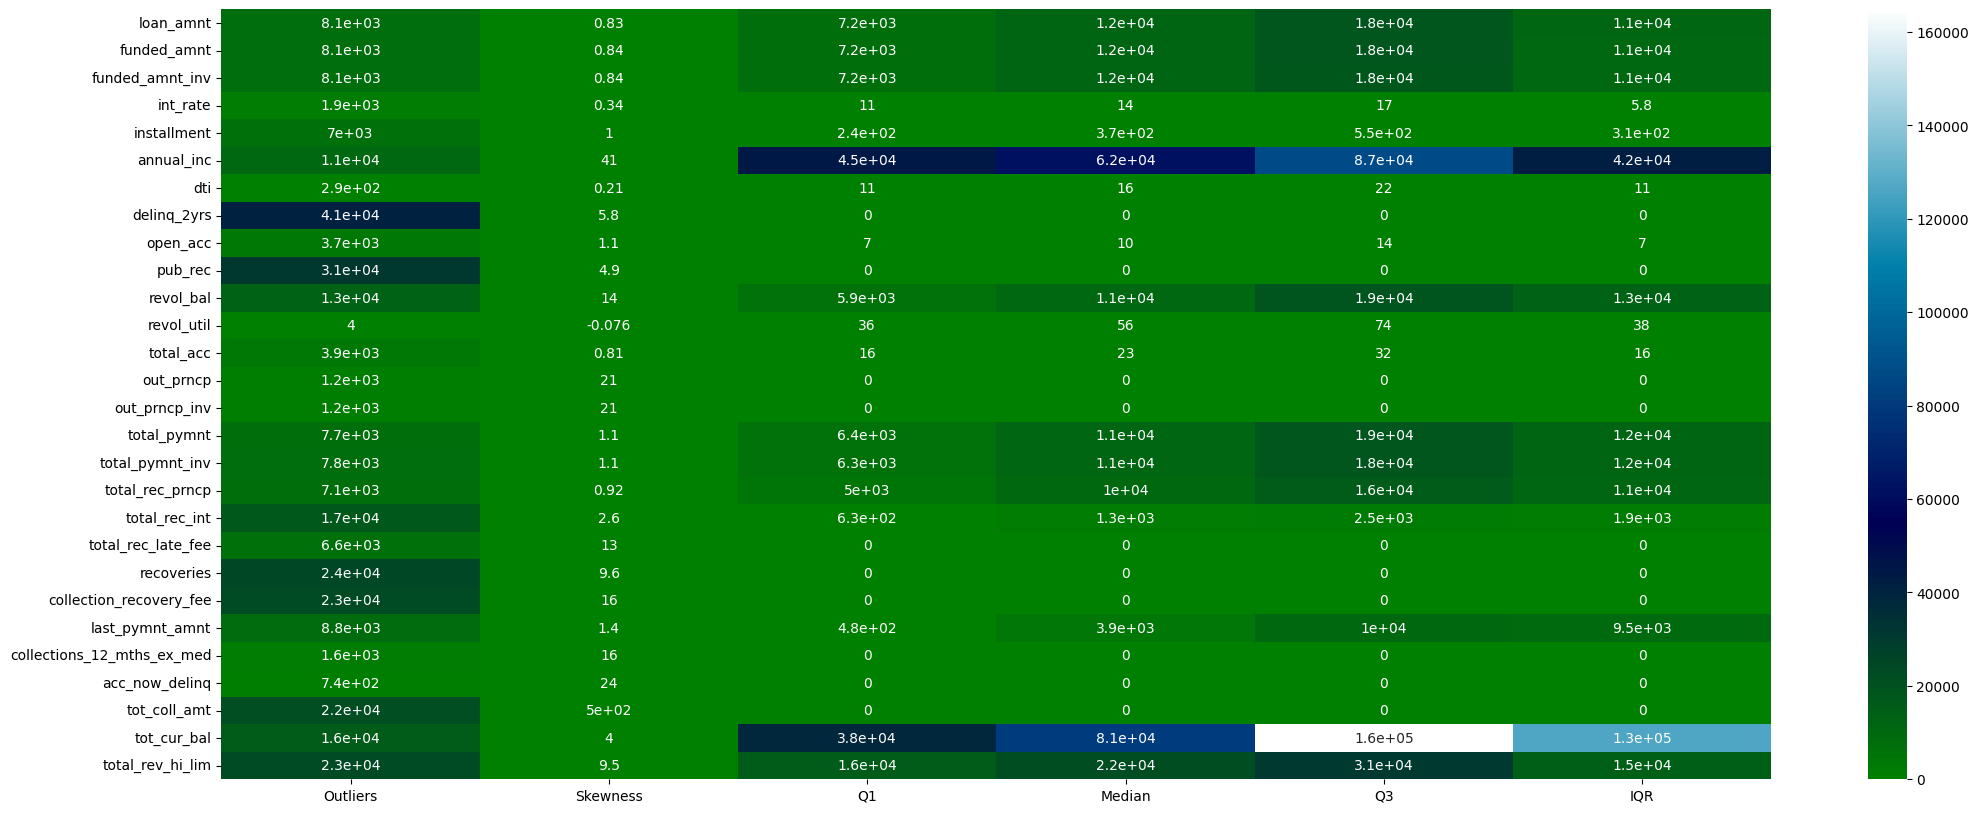

In [99]:
plt.figure(figsize = (25,10))
sns.heatmap(datahealth.round(3).select_dtypes(np.number),cmap = 'ocean', annot = True,yticklabels = datahealth['Column Name'])

# Exploratory Data Analysis

In [2]:
import matplotlib
print("Matplotlib version:", matplotlib.__version__)

import seaborn
print("Seaborn version:", seaborn.__version__)


Matplotlib version: 3.7.3
Seaborn version: 0.12.2


!pip uninstall matplotlib --y
#!pip install matplotlib==3.7.3

!pip install matplotlib==3.7.3

!pip install --force-reinstall matplotlib

<Axes: >

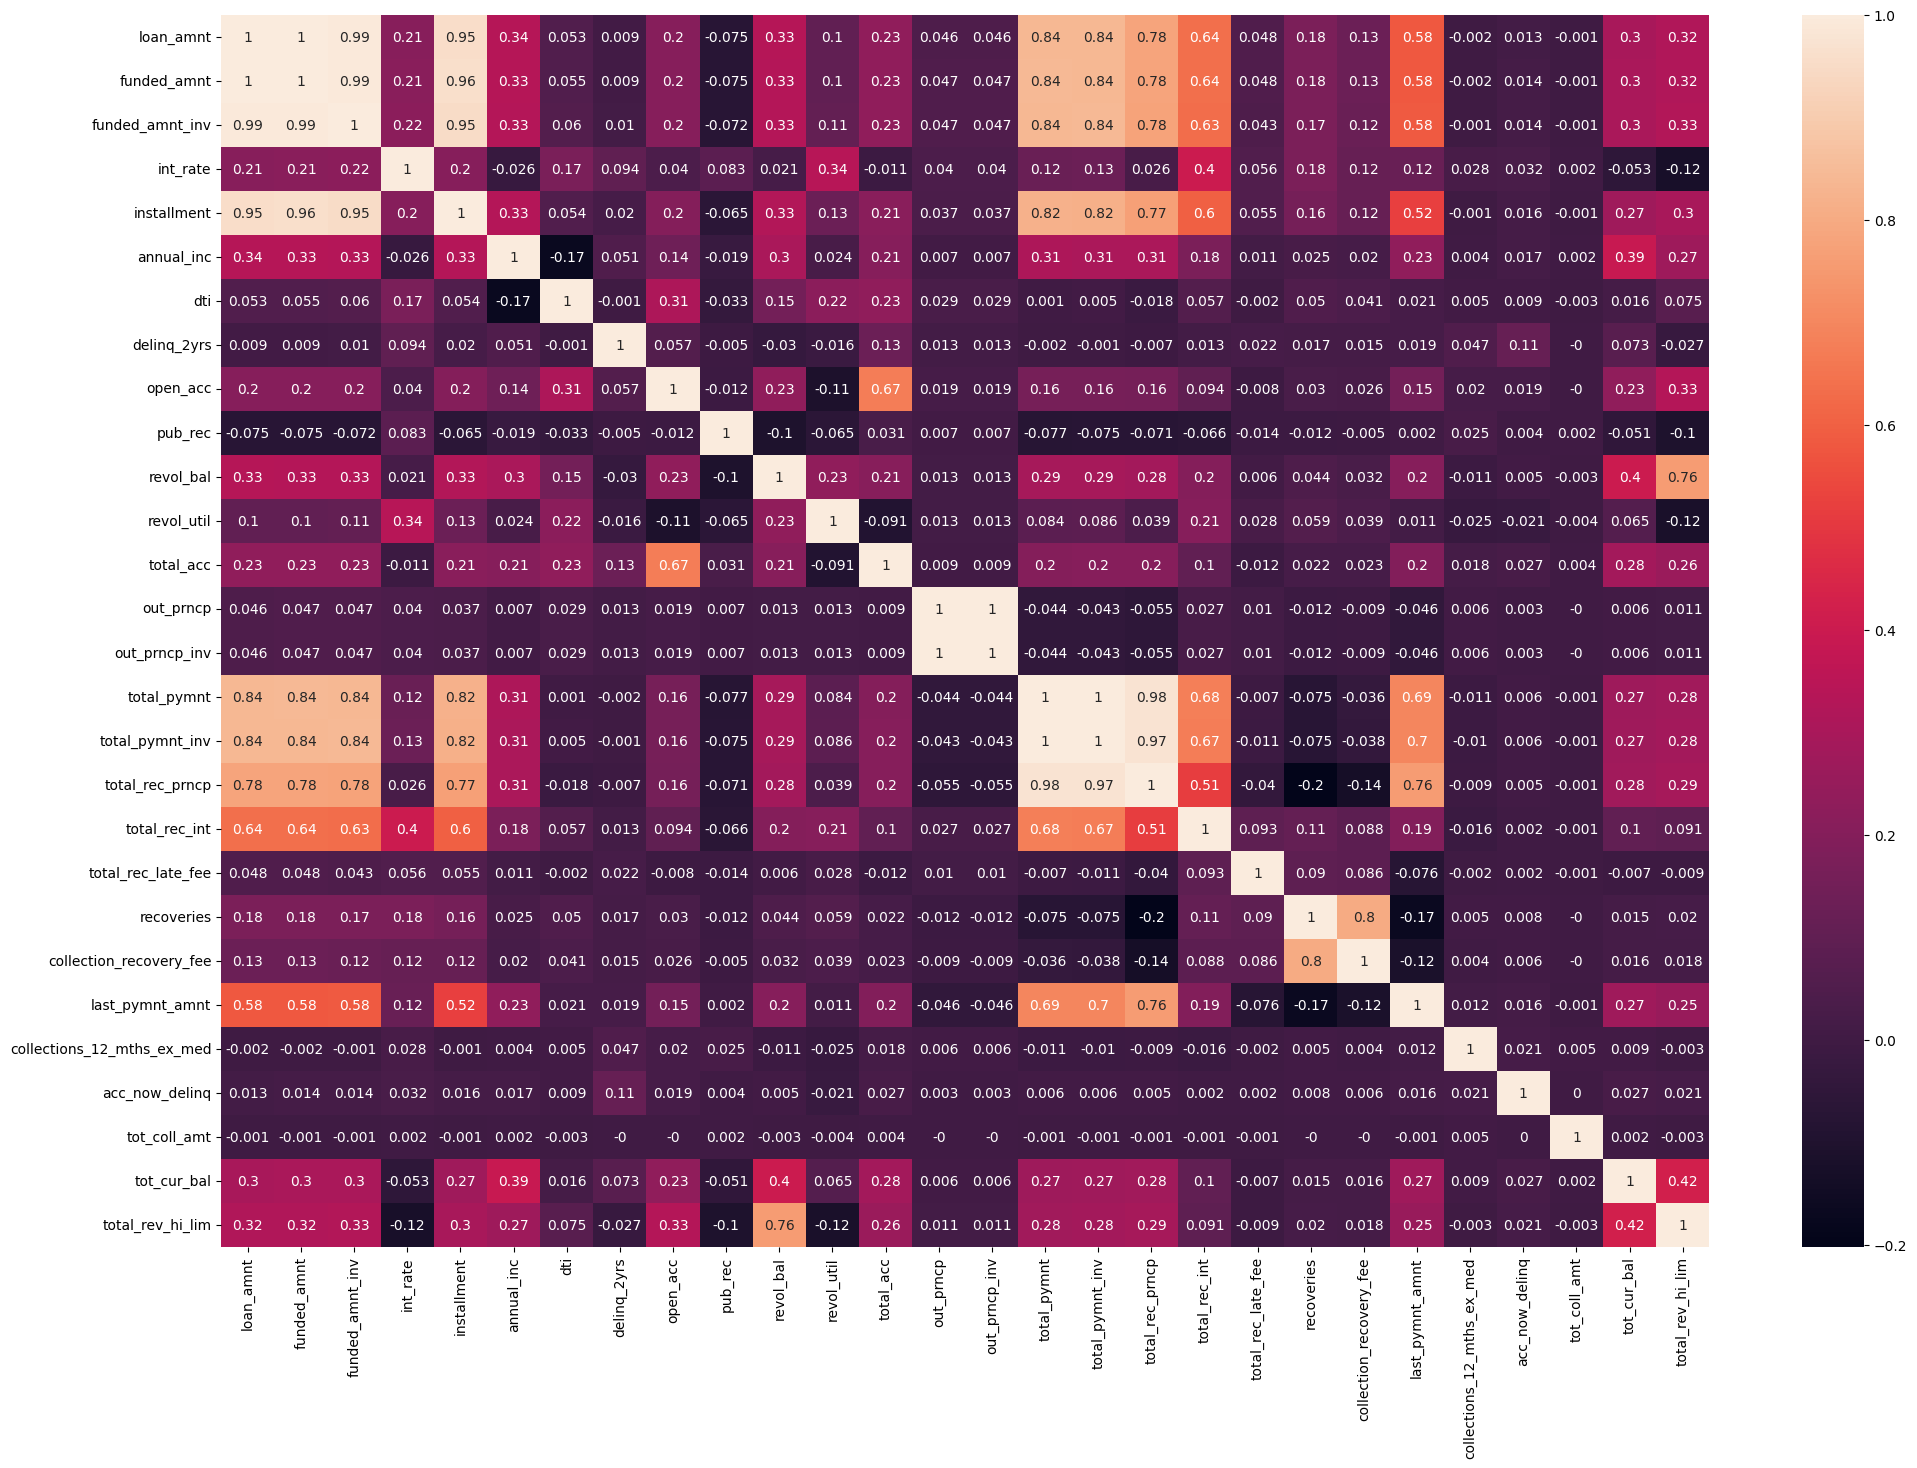

In [219]:
plt.figure(figsize = (24,16))

sns.heatmap(numeric.corr().round(3),annot = True,)

In [65]:
sns.pairplot(numeric)
plt.show()


KeyboardInterrupt



In [72]:
df['annual_inc'].describe().index.to_list()

['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']

plt.table(cellText = ['column'],rowLabels = df['annual_inc'].describe().index.to_list())

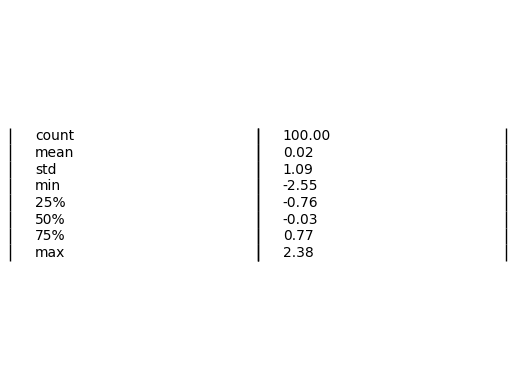

In [101]:
stats = df['A'].describe()
cell_text = [[f"{index}", f"{value:.2f}"] for index, value in stats.items()]
fig, ax = plt.subplots()
axs[2].axis('tight')
axs[2].axis('off')
axs[3].table(cellText=cell_text, cellLoc='left', edges='vertical', loc='center')
plt.show()

plt.table(cellText = [['count'],['mean'],['std'],['min'],['25%'],['50%'],['75%'],['max']],cellLoc='left',edges = 'vertical')

In [287]:
df['loan_amnt'].name

'loan_amnt'

In [293]:
pd.DataFrame(non_defaulter_data)['loan_amnt'].name

'loan_amnt'

In [233]:
#defining function to plot histgram and boxplot for numeric columns
def plot_histogram_boxplot(column_data, figsize = 'default',tick_params = 'default'):

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
    
    # histogram 
    sns.histplot(column_data, kde=True, color='skyblue', ax=axes[0])
    axes[0].ticklabel_format(style='plain', axis='x')
    axes[0].set_title(f' {column_data.name}')
    axes[0].set_xlabel(column_data.name)
    axes[0].set_ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    if True:
       axes[0].tick_params(axis = input(),labelrotation = int(input()))
    # table

    stats = column_data.describe()
    cell_text = [[f"{index}", f"{value:.2f}"] for index, value in stats.items()]
    axes[1].axis('tight')
    axes[1].axis('off')
    axes[1].table(cellText=cell_text, cellLoc='left', edges='vertical', loc='center')
    plt.grid(True)
    plt.tight_layout()
    #plt.show()
    
    
    # Box Plot
    axes[2].boxplot(column_data, vert=False, patch_artist=True, boxprops=dict(facecolor='lightgray'))
    axes[2].ticklabel_format(style='plain', axis='x')
    axes[2].set_title(f' {column_data.name}')
    axes[2].set_xlabel(column_data.name)
    plt.grid(True)
    plt.tight_layout()    
    if True:
        axes[2].tick_params(axis = input(),labelrotation = int(input()))

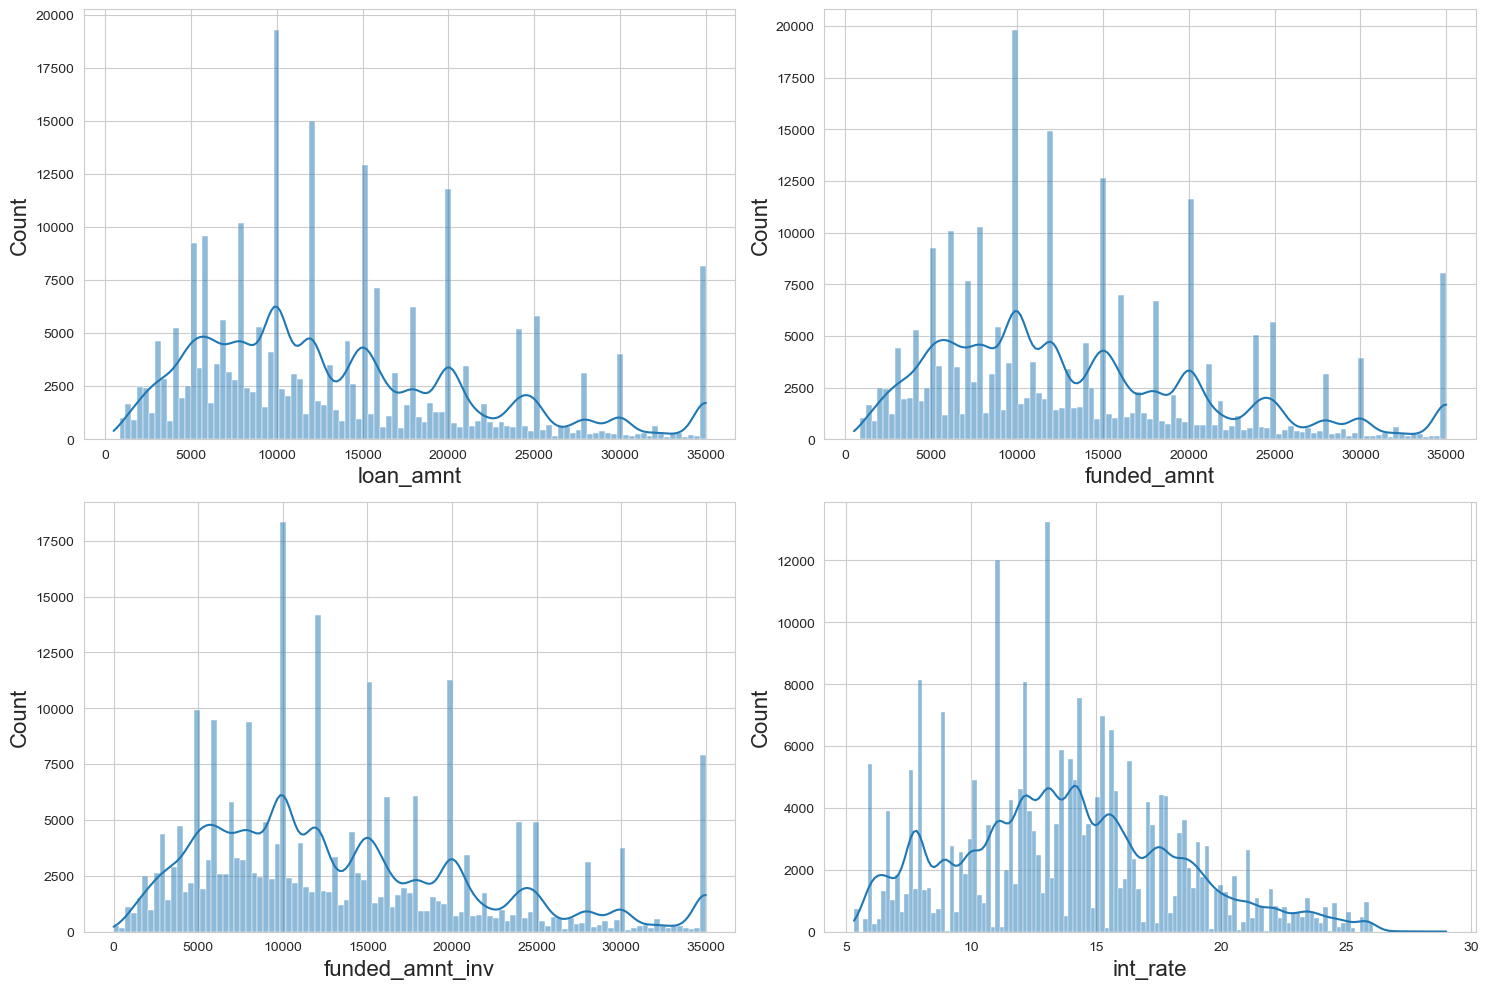

In [212]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axs = axs.flatten()

for row, var in enumerate(numeric.columns[:4]):
    sns.histplot(data=df1, x=var, kde=True, ax=axs[row])
   # plt.tick_params(axis='both', which='major', labelsize=24)
    axs[row].set_xlabel(f'{var}', fontsize=16)  
    axs[row].set_ylabel('Count', fontsize=16)   
    axs[row].grid(True)
    
        
   
plt.tight_layout()

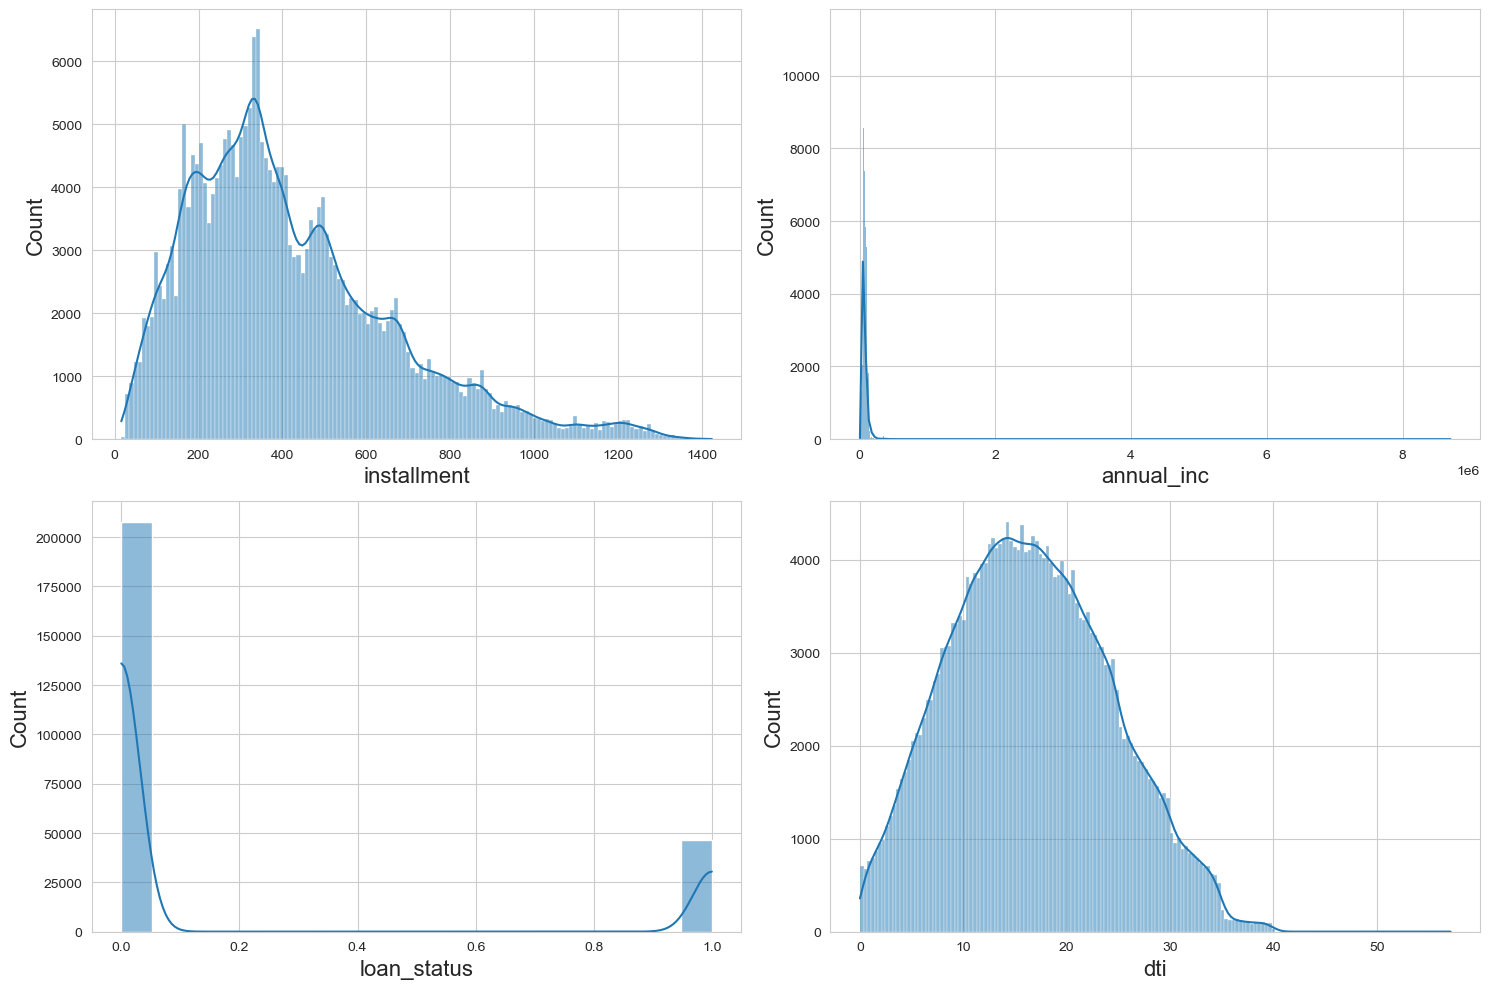

In [213]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axs = axs.flatten()

for row, var in enumerate(numeric.columns[4:8]):
    sns.histplot(data=df1, x=var, kde=True, ax=axs[row])
    plt.tick_params(axis='both', which='major', labelsize=10)
    axs[row].set_xlabel(f'{var}', fontsize=16)  
    axs[row].set_ylabel('Count', fontsize=16)   
    axs[row].grid(True)
    
        
   
plt.tight_layout()

In [165]:
np.sqrt(25189)
df1['annual_inc'].max()
df1['annual_inc'].min()
(df1['annual_inc'].max() - df1['annual_inc'].min())/round(np.sqrt(25189))

8706582.0

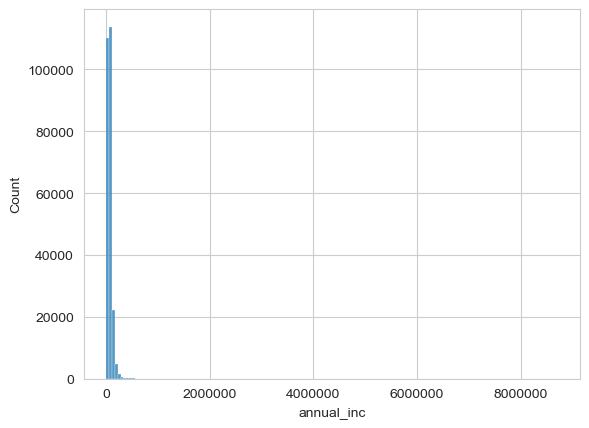

In [388]:
sns.histplot(data = df1,x = 'annual_inc',bins = 159, )
plt.ticklabel_format(style='plain', axis='x')

 x
 45
 x
 45


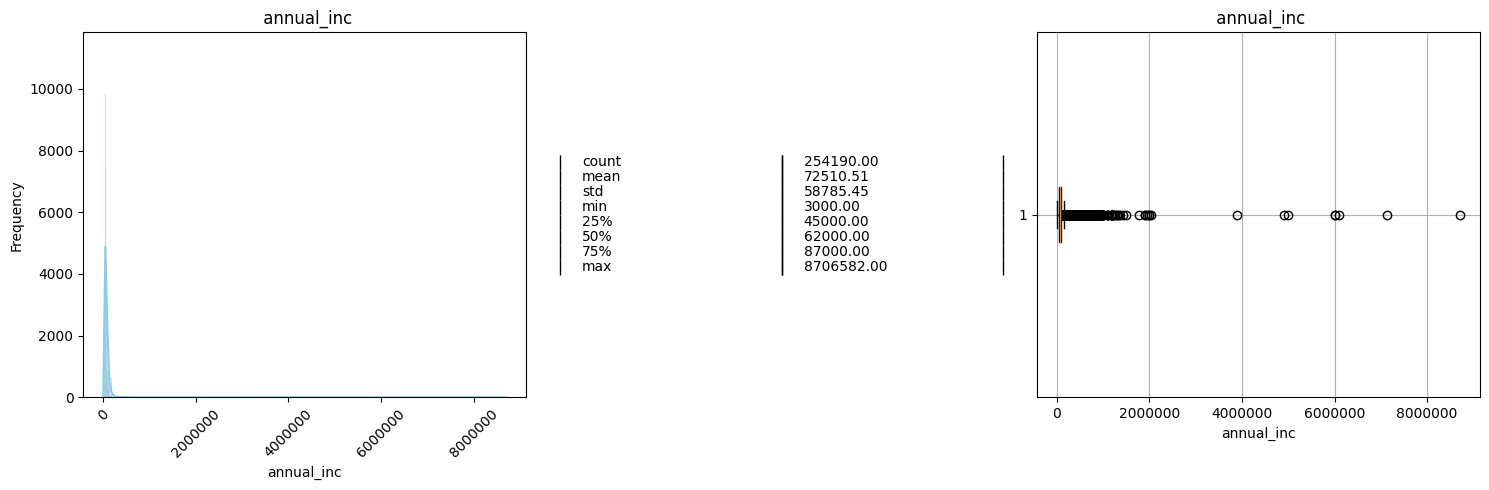

In [231]:
plot_histogram_boxplot(df1['annual_inc'])

In [84]:
a.index.to_list()

['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']

In [70]:
df1['annual_inc'].index

RangeIndex(start=0, stop=254190, step=1)

In [72]:
a = df1['annual_inc'].describe().round()

In [73]:
a.index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [139]:
from matplotlib.ticker import ScalarFormatter

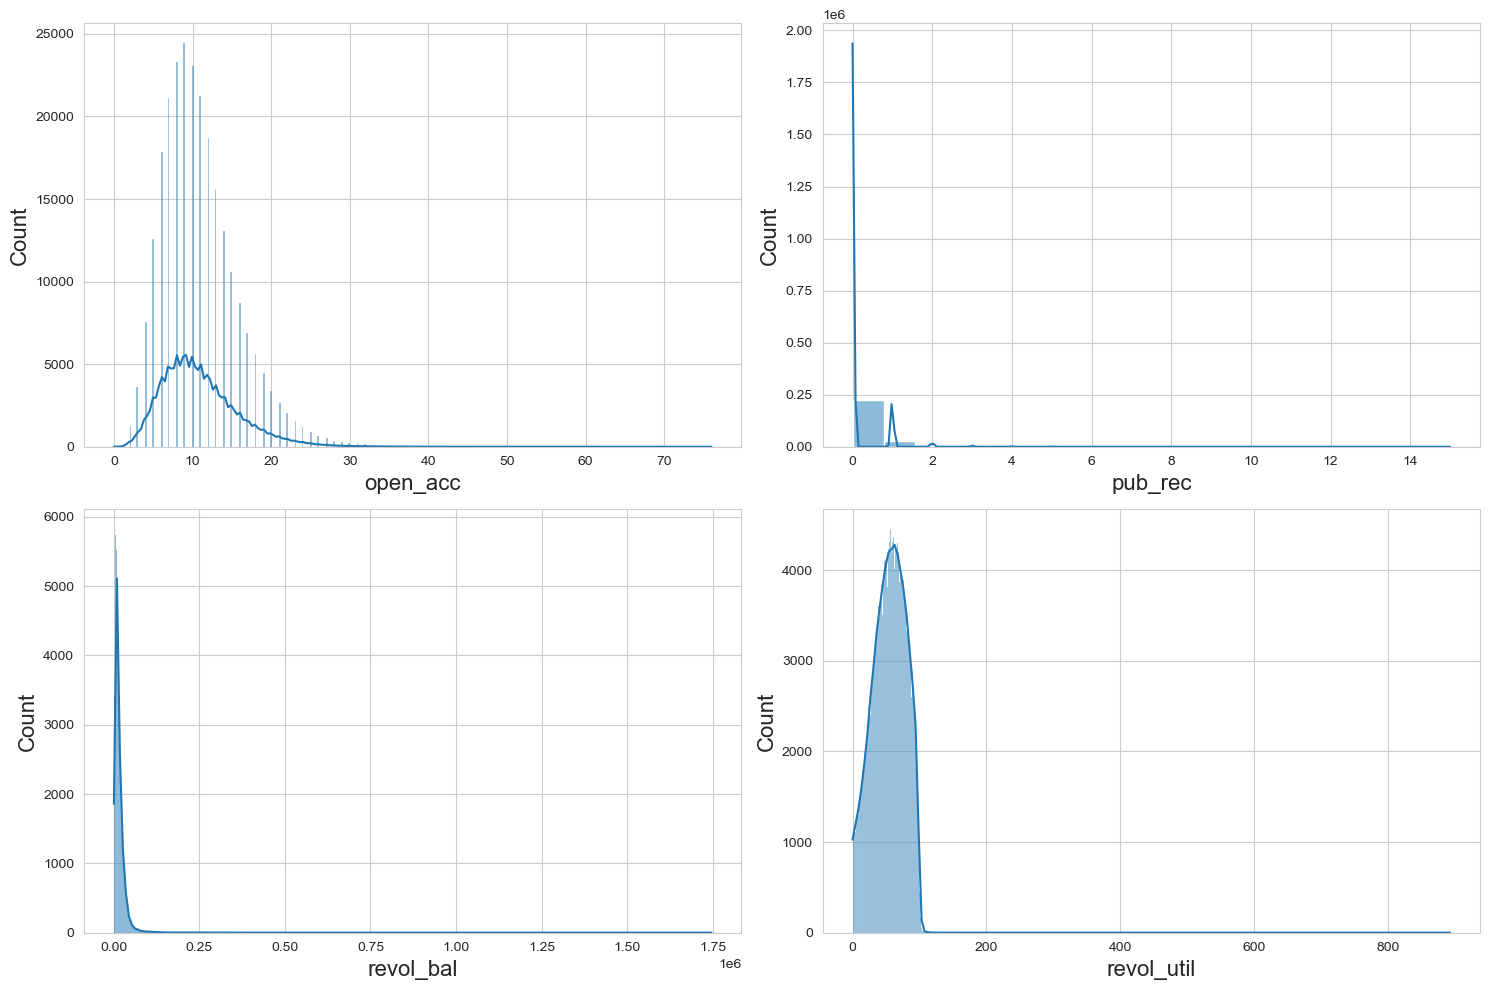

In [393]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axs = axs.flatten()

for row, var in enumerate(numeric.columns[8:12]):
    sns.histplot(data=df1, x=var, kde=True, ax=axs[row])
    #plt.tick_params(axis='both', which='major', labelsize=30)
    axs[row].set_xlabel(f'{var}', fontsize=16)  
    axs[row].set_ylabel('Count', fontsize=16)   
    axs[row].grid(True)
    
        
   
plt.tight_layout()

 x
 45
 x
 45


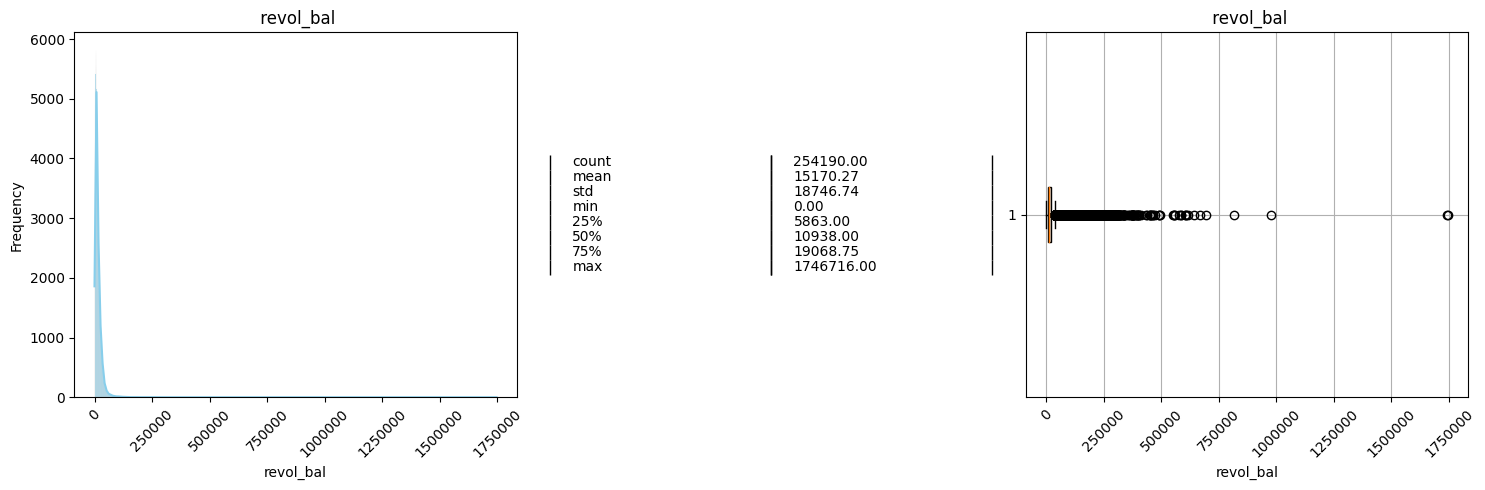

In [234]:
plot_histogram_boxplot(df1['revol_bal'])
#plt.ticklabel_format(style='plain', axis='x')
#axes[0].tick_params(axis = 'x',labelrotation = 45)
#axes[1].tick_params(axis = 'x',labelrotation = 45)

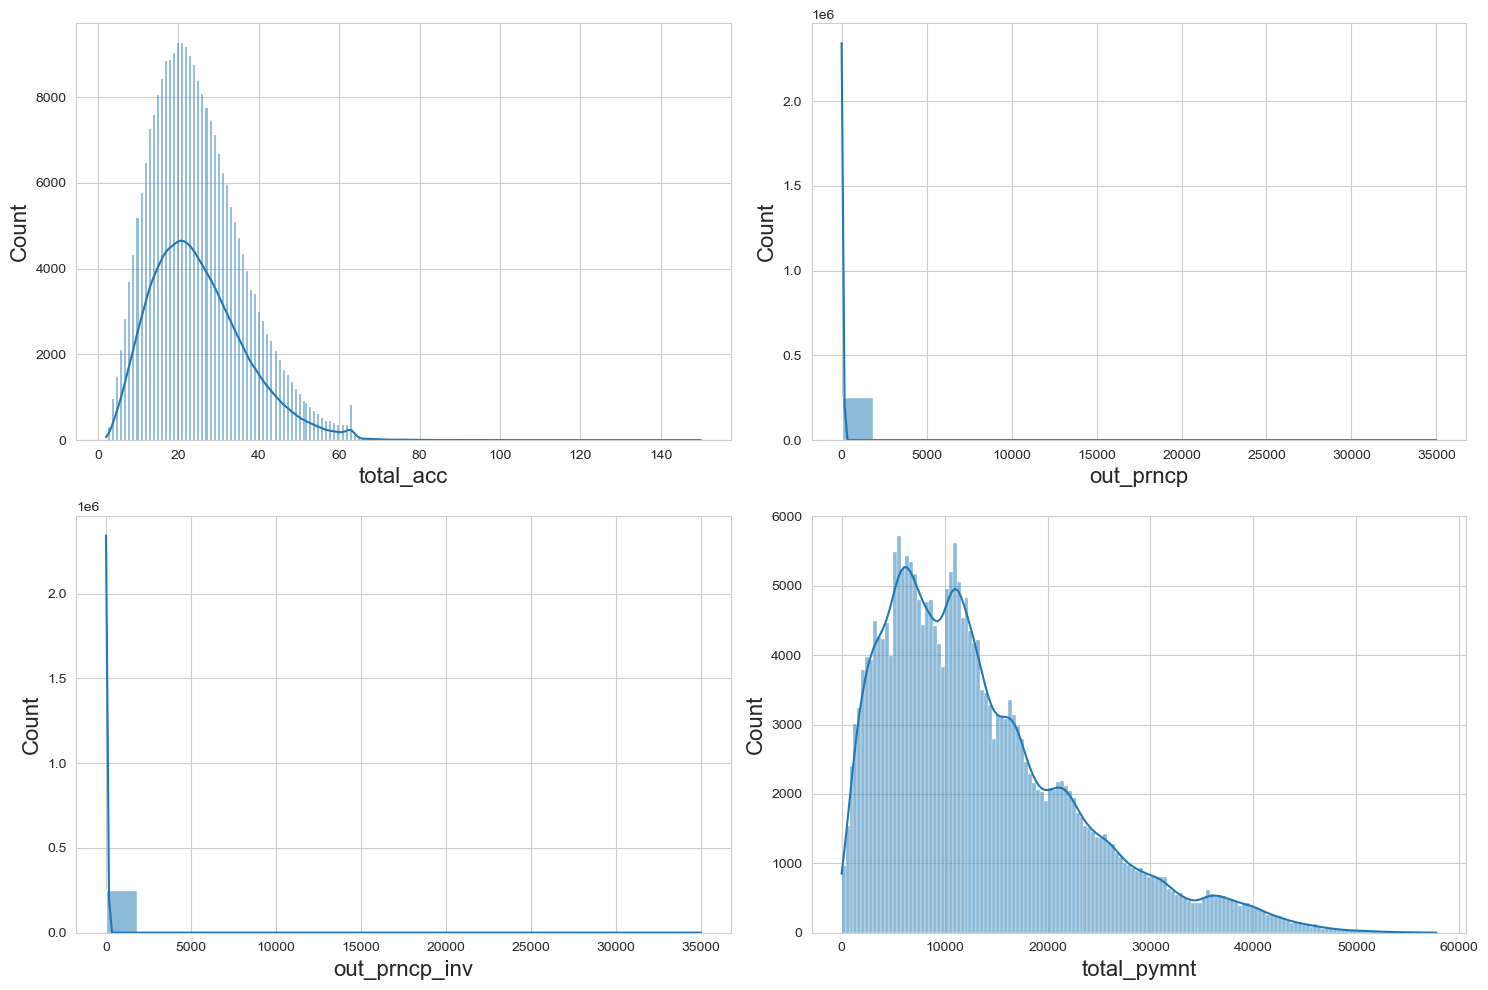

In [399]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axs = axs.flatten()

for row, var in enumerate(numeric.columns[12:16]):
    sns.histplot(data=df1, x=var, kde=True, ax=axs[row])
    #plt.tick_params(axis='both', which='major', labelsize=24)
    axs[row].set_xlabel(f'{var}', fontsize=16)  
    axs[row].set_ylabel('Count', fontsize=16)   
    axs[row].grid(True)
    
        
   
plt.tight_layout()

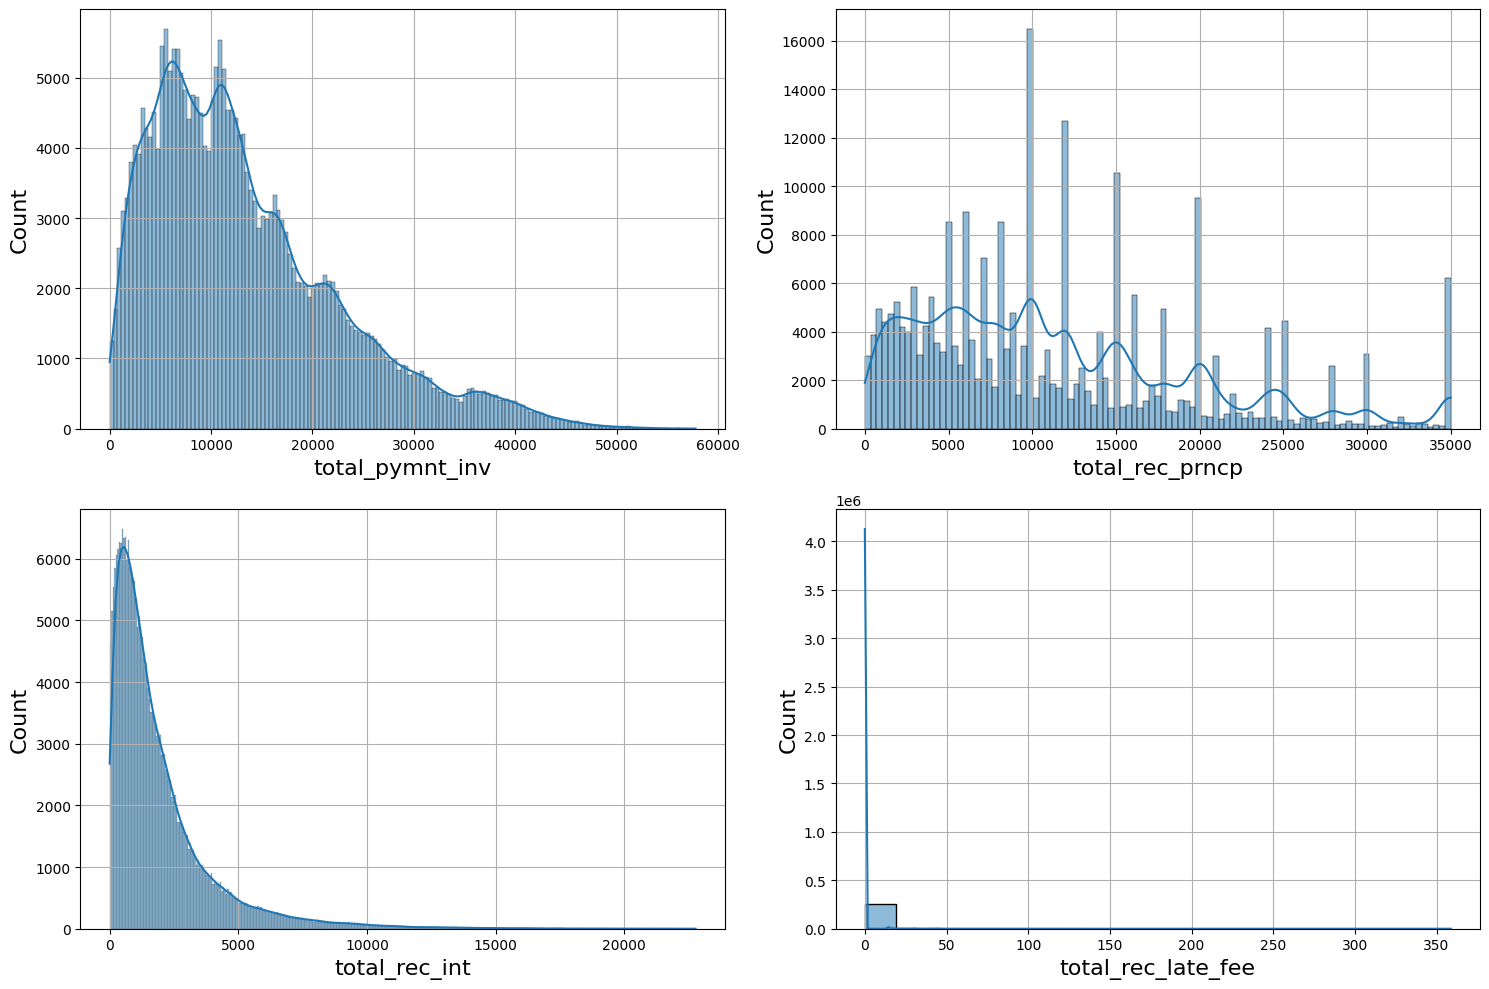

In [235]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axs = axs.flatten()

for row, var in enumerate(numeric.columns[16:20]):
    sns.histplot(data=df1, x=var, kde=True, ax=axs[row])
    #plt.tick_params(axis='both', which='major', labelsize=24)
    axs[row].set_xlabel(f'{var}', fontsize=16)  
    axs[row].set_ylabel('Count', fontsize=16)   
    axs[row].grid(True)
    
        
   
plt.tight_layout()

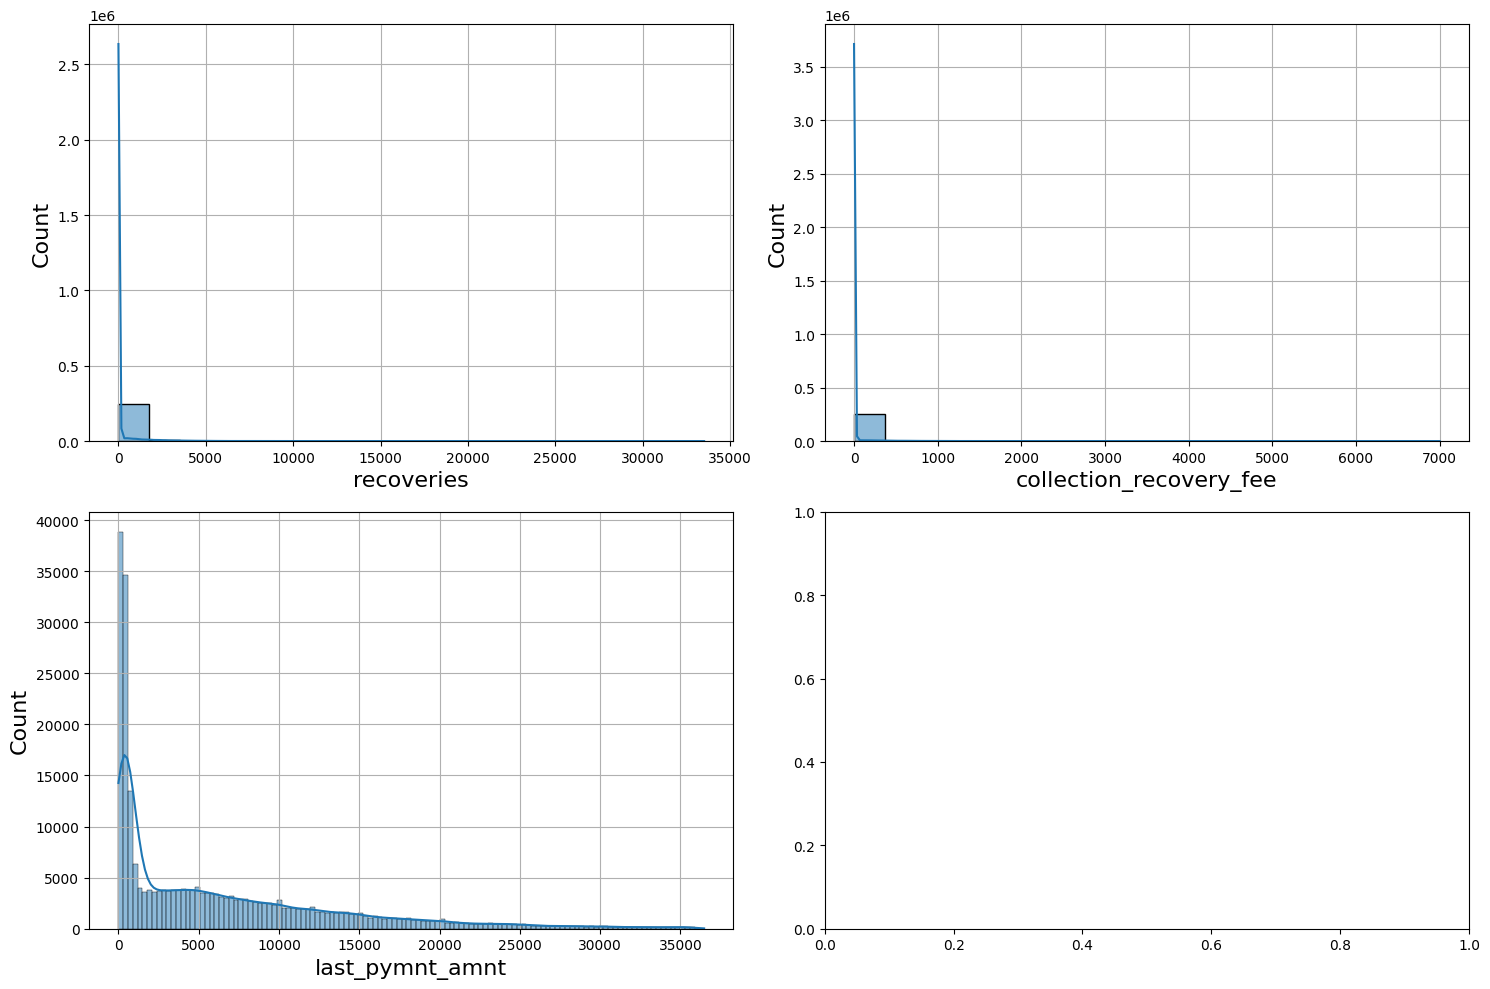

In [249]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axs = axs.flatten()

for row, var in enumerate(numeric.columns[20:23]):
    sns.histplot(data=df1, x=var, kde=True, ax=axs[row])
    #plt.tick_params(axis='both', which='major', labelsize=24)
    axs[row].set_xlabel(f'{var}', fontsize=16)  
    axs[row].set_ylabel('Count', fontsize=16)   
    axs[row].grid(True)
    
        
plt.tight_layout()

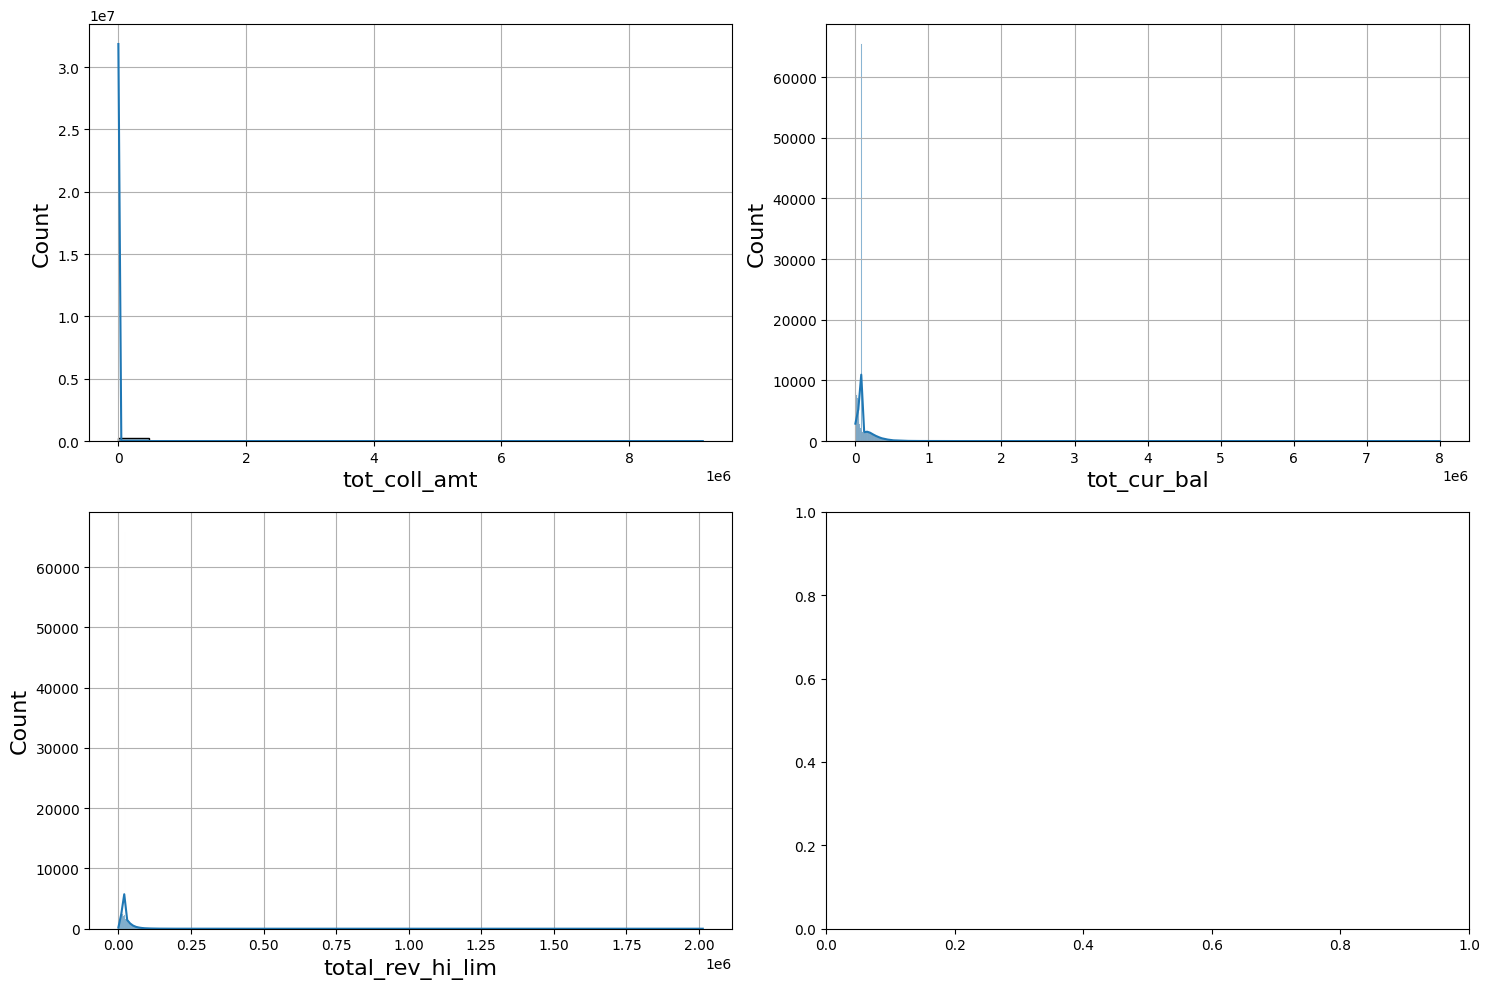

In [254]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
axs = axs.flatten()

for row, var in enumerate(numeric.columns[25:28]):
    sns.histplot(data=df1, x=var, kde=True, ax=axs[row])
    #plt.tick_params(axis='both', which='major', labelsize=24)
    axs[row].set_xlabel(f'{var}', fontsize=16)  
    axs[row].set_ylabel('Count', fontsize=16)   
    axs[row].grid(True)
    
        
   
plt.tight_layout()

In [255]:
cat.columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'loan_status', 'purpose',
       'title', 'zip_code', 'addr_state', 'inq_last_6mths',
       'mths_since_last_delinq', 'initial_list_status'],
      dtype='object')

Text(0.5, 0, 'sub_grade')

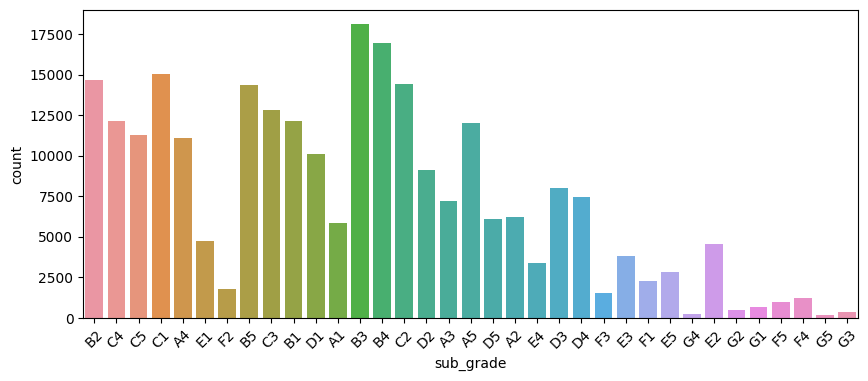

In [244]:
plt.rc('font', size=10)
plt.figure(figsize = (10,4))
#sns.countplot(df1['sub_grade'].value_counts())
sns.countplot(df1, x = 'sub_grade')
plt.tick_params('x', rotation = 45)
plt.xlabel('sub_grade', fontsize = 10)

plt.rc('font', size=5)
plt.figure(figsize = (10,4))
sns.countplot(df1, x = 'sub-regions',palette= 'pastel')
plt.tick_params('x', rotation = 45)
plt.xlabel('sub_regions', fontsize = 10)

Text(0.5, 0, 'sub_grade')

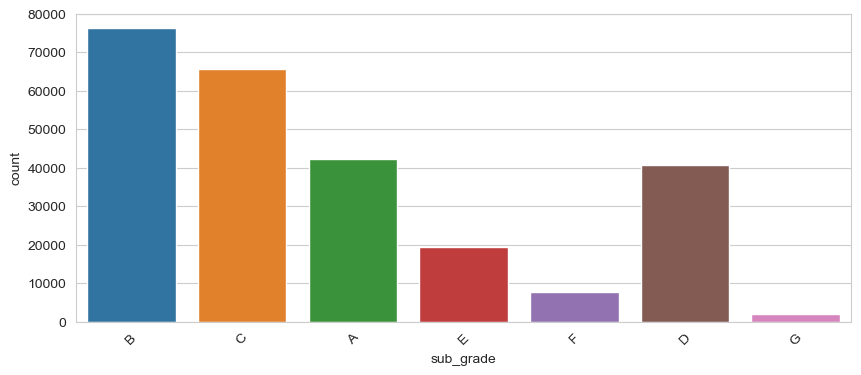

In [186]:
plt.rc('font', size=10)
plt.figure(figsize = (10,4))
sns.countplot(df1, x = 'grade')
plt.tick_params('x', rotation = 45)
plt.xlabel('sub_grade', fontsize = 10)

Text(0.5, 0, 'emp_length')

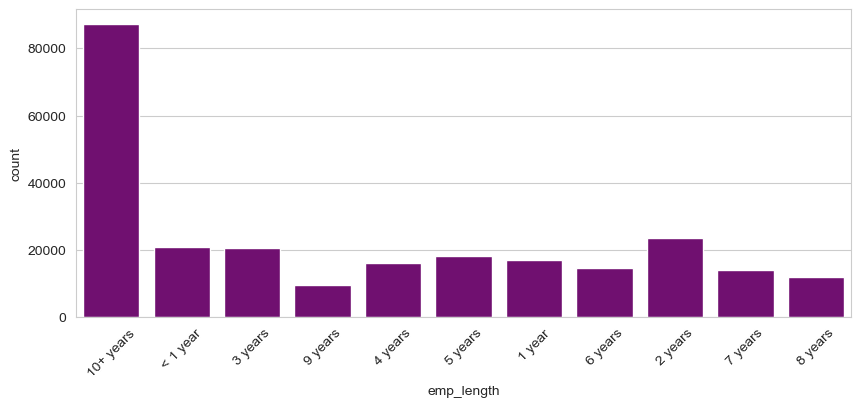

In [184]:
plt.rc('font', size=10)
plt.figure(figsize = (10,4))
sns.countplot(df1, x = 'emp_length',color = 'purple')
plt.tick_params('x', rotation = 45)
plt.xlabel('emp_length', fontsize = 10)

Text(0.5, 0, 'purpose')

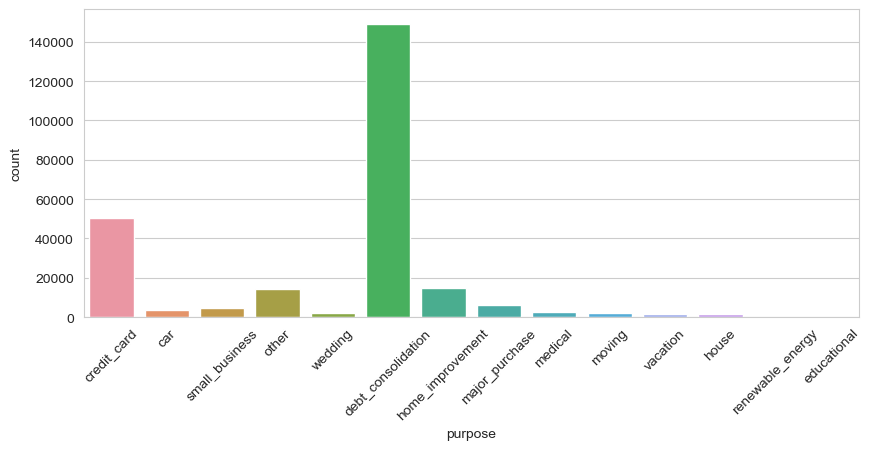

In [185]:
plt.rc('font', size=10)
plt.figure(figsize = (10,4))
sns.countplot(df1, x = 'purpose')
plt.tick_params('x', rotation = 45)
plt.xlabel('purpose', fontsize = 10)

Text(0.5, 0, 'home_ownership')

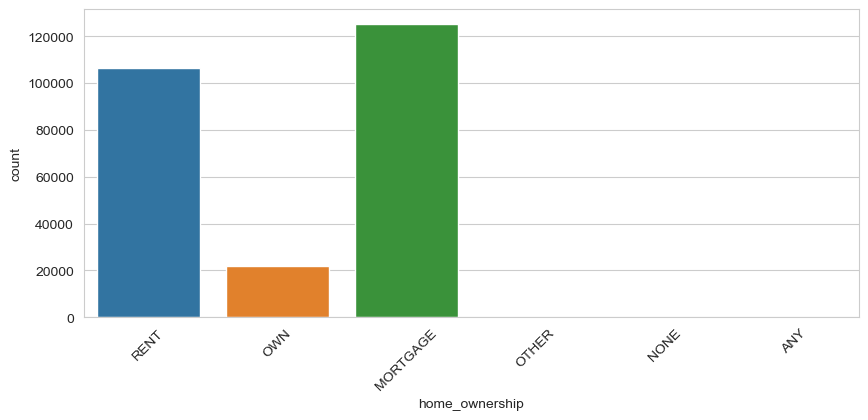

In [181]:
plt.rc('font', size=10)
plt.figure(figsize = (10,4))
sns.countplot(df1, x = 'home_ownership')
plt.tick_params('x', rotation = 45)
plt.xlabel('home_ownership', fontsize = 10)

Text(0.5, 0, 'sub_grade')

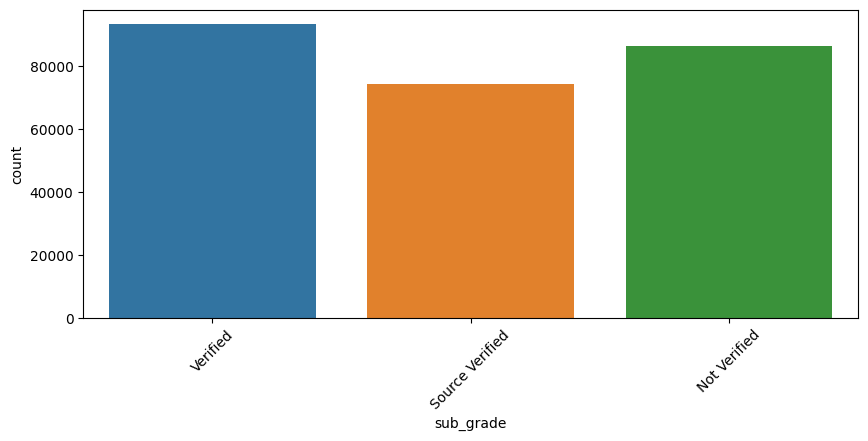

In [256]:
plt.rc('font', size=10)
plt.figure(figsize = (10,4))
#sns.countplot(df1['sub_grade'].value_counts())
sns.countplot(df1, x = 'verification_status')
plt.tick_params('x', rotation = 45)
plt.xlabel('sub_grade', fontsize = 10)

Text(0.5, 0, 'sub_grade')

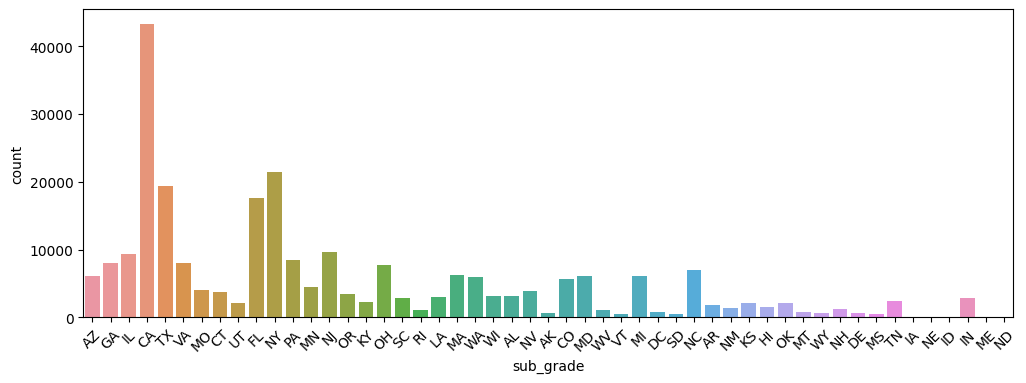

In [258]:
plt.rc('font', size=10)
plt.figure(figsize = (12,4))
#sns.countplot(df1['sub_grade'].value_counts())
sns.countplot(df1, x = 'addr_state')
plt.tick_params('x', rotation = 45)
plt.xlabel('addr_state', fontsize = 10)

## Bi-Variate Data Analysis

In [259]:
numeric.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [260]:
df['loan_status'].unique()

array(['Fully Paid', 'Default'], dtype=object)

In [264]:
# Assuming df is your main DataFrame
health_target_0 = data_health(df[df['loan_status'] == 'Fully Paid'])
health_target_1 = data_health(df[df['loan_status'] == 'Default'])


In [274]:
def subset_function(df,predictor,target):
    non_defaulter = df[df[target] == 'Fully Paid'][predictor]
    defaulter = df[df[target] == 'Default'][predictor]
    return

subset_function(df.select_dtypes(np.number),'loan_amnt',df['loan_status'].values)

In [279]:
columns = list(df.select_dtypes(include=[np.number]).columns) + ['loan_status']  
filtered_df = df[columns]


In [295]:
def subset_function(df, predictor, target):
    non_defaulter = pd.DataFrame(df[df[target] == 'Fully Paid'][predictor])
    defaulter = pd.DataFrame(df[df[target] == 'Default'][predictor])
    return non_defaulter, defaulter


In [296]:
non_defaulter_data, defaulter_data = subset_function(filtered_df, 'loan_amnt', 'loan_status')


 x
 45
 x
 45


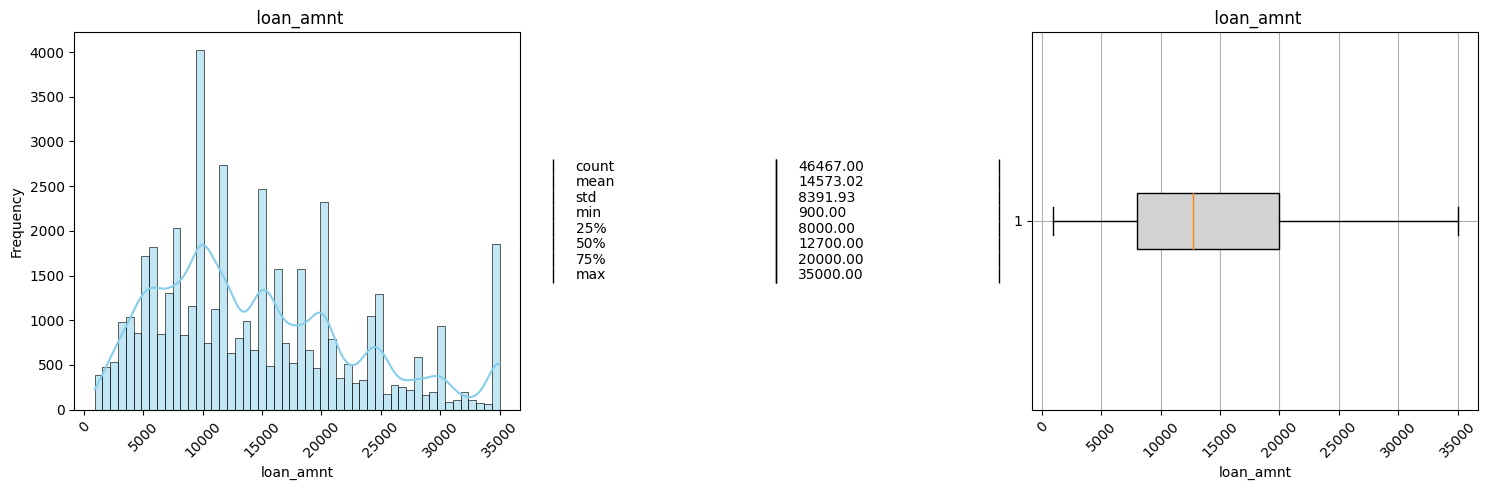

In [299]:
plot_histogram_boxplot(defaulter_data['loan_amnt'])

 x
 45
 x
 45


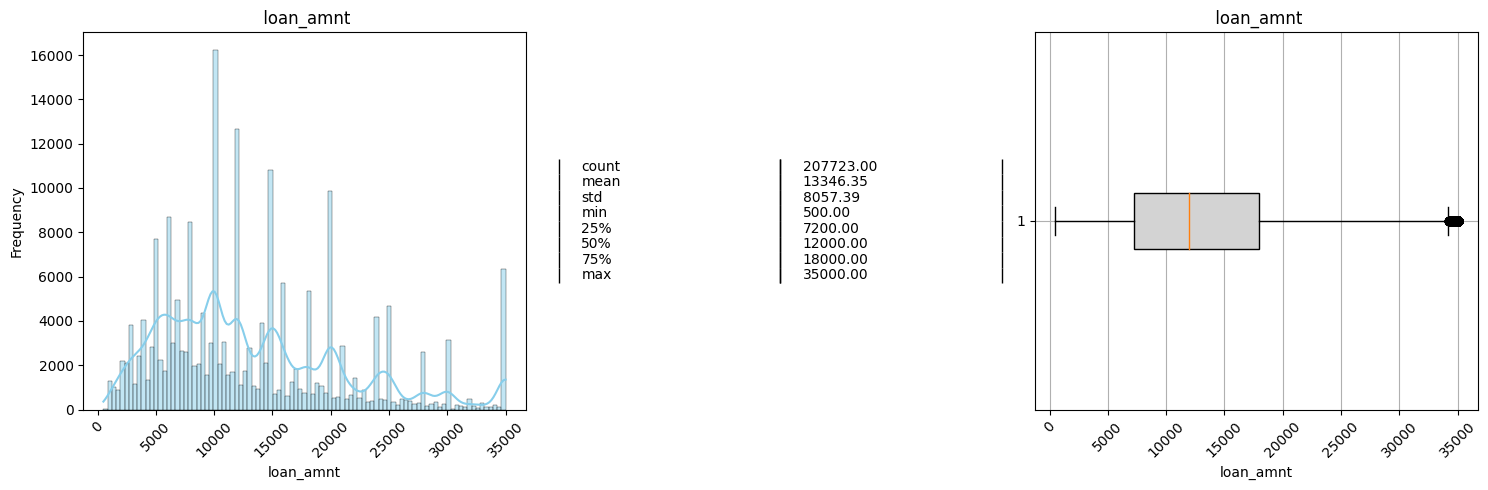

In [302]:
plot_histogram_boxplot(non_defaulter_data['loan_amnt'])

In [308]:
numeric.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

<Axes: xlabel='funded_amnt', ylabel='Count'>

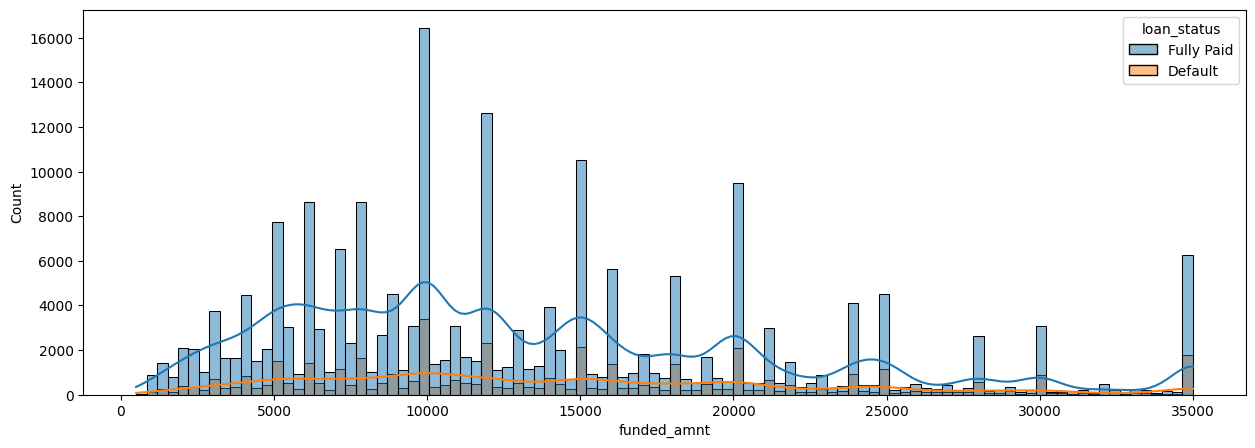

In [309]:
plt.figure(figsize = (15,5))
sns.histplot(data =df, x = 'funded_amnt', hue = 'loan_status',kde  =True)

<Axes: xlabel='loan_amnt', ylabel='Count'>

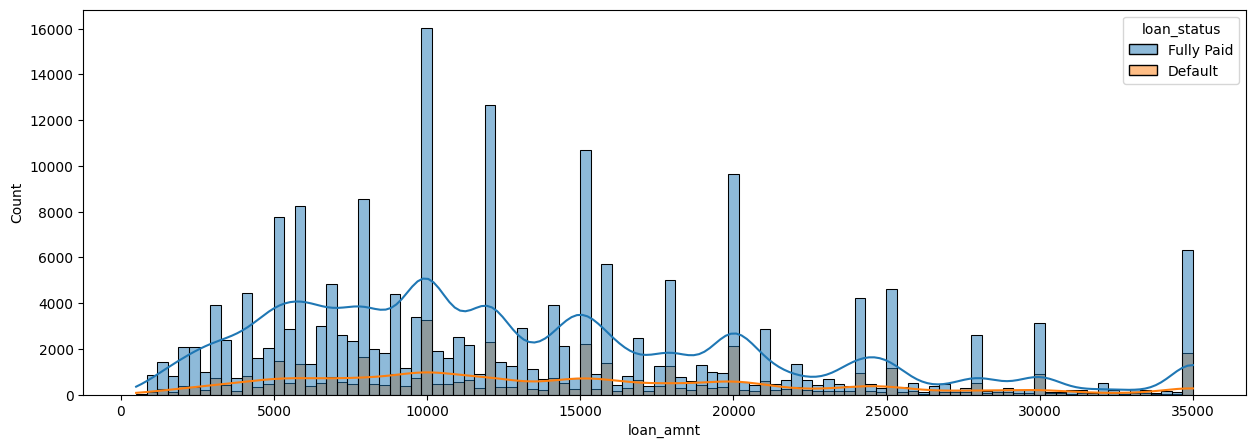

In [310]:
plt.figure(figsize = (15,5))
sns.histplot(data =df, x = 'loan_amnt', hue = 'loan_status',kde  =True)

In [340]:
df[['funded_amnt','loan_amnt','funded_amnt_inv']].corr()

funded_amnt  loan_amnt  funded_amnt_inv
funded_amnt         1.000000   0.997618         0.994640
loan_amnt           0.997618   1.000000         0.991783
funded_amnt_inv     0.994640   0.991783         1.000000

In [ ]:

       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim'

<Axes: xlabel='funded_amnt_inv', ylabel='Count'>

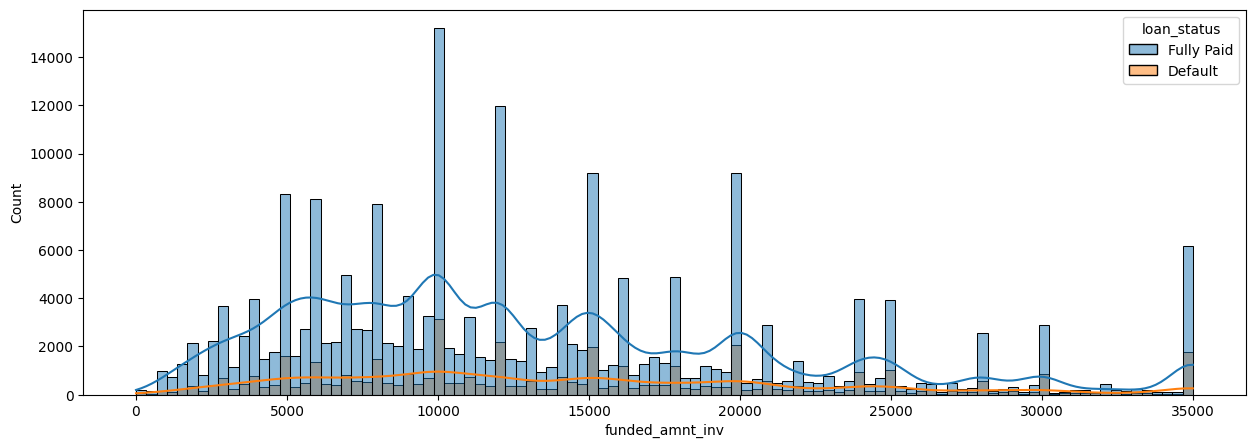

In [312]:
plt.figure(figsize = (15,5))
sns.histplot(data =df, x = 'funded_amnt_inv', hue = 'loan_status',kde  =True)

<Axes: xlabel='int_rate', ylabel='Count'>

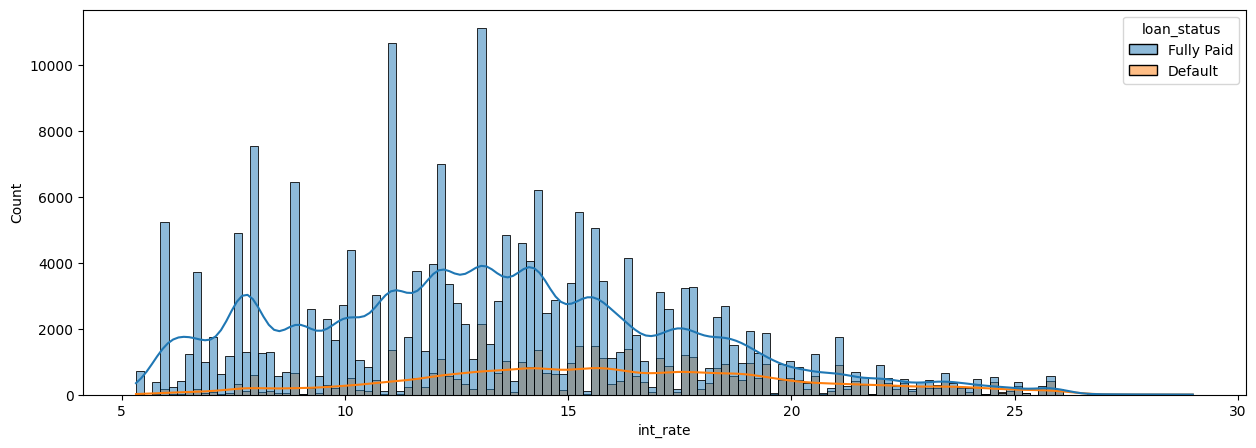

In [339]:
plt.figure(figsize = (15,5))
sns.histplot(data =df, x = 'int_rate', hue = 'loan_status',kde  =True)

In [322]:
df['funded_amnt_inv'].dtype

dtype('float64')

<Axes: xlabel='dti', ylabel='Count'>

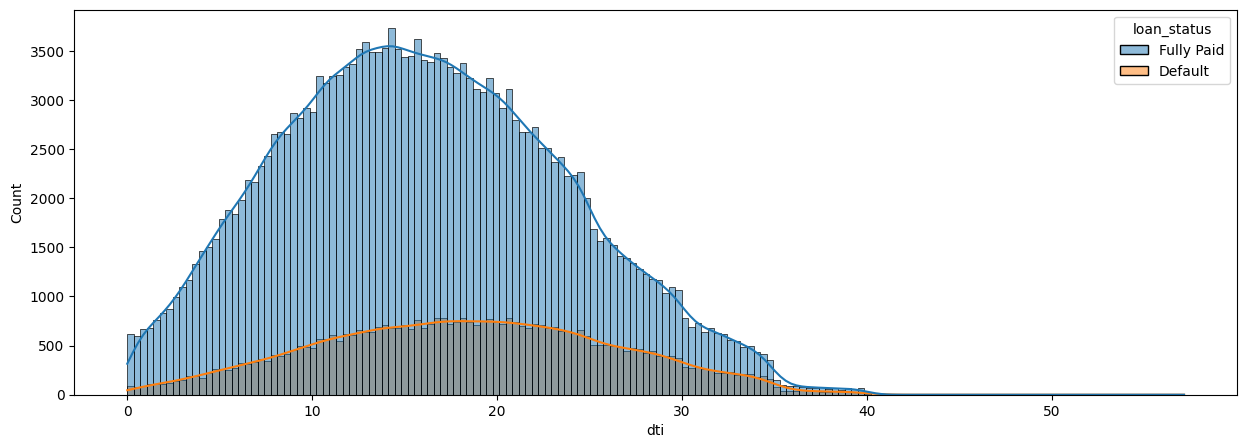

In [323]:
plt.figure(figsize = (15,5))
sns.histplot(data =df, x = 'dti' , hue = 'loan_status',kde  =True)

<Axes: xlabel='annual_inc', ylabel='Count'>

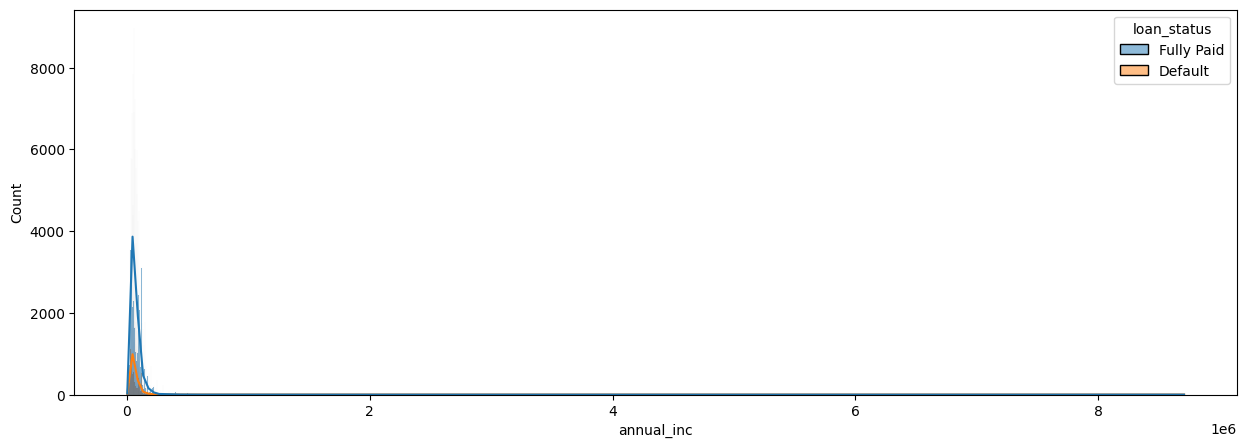

In [324]:
plt.figure(figsize = (15,5))
sns.histplot(data =df, x = 'annual_inc' , hue = 'loan_status',kde  =True)

In [374]:
def outlier_removed(data,column):
    q1 = np.quantile(data[column],0.25)
    q3 = np.quantile(data[column],0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    #iqr = q3 - q1
    #outliers = df[(df['property_area'] < lower_bound) | (df['property_area'] > upper_bound)]
    outliers_mask = (data[column] < lower_bound) | (data[column] > upper_bound)
    no_outliers = data[~outliers_mask]
                   
    return no_outliers

ai_df

<Axes: xlabel='annual_inc', ylabel='Count'>

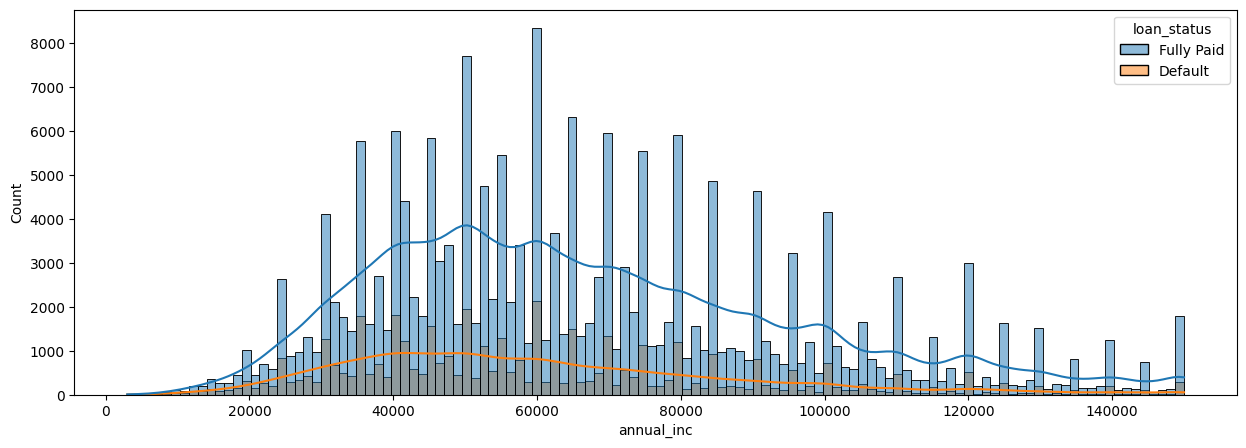

In [378]:
plt.figure(figsize = (15,5))
sns.histplot(data = ai_df, x = 'annual_inc' , hue = 'loan_status',kde  =True)

<Axes: xlabel='delinq_2yrs', ylabel='Count'>

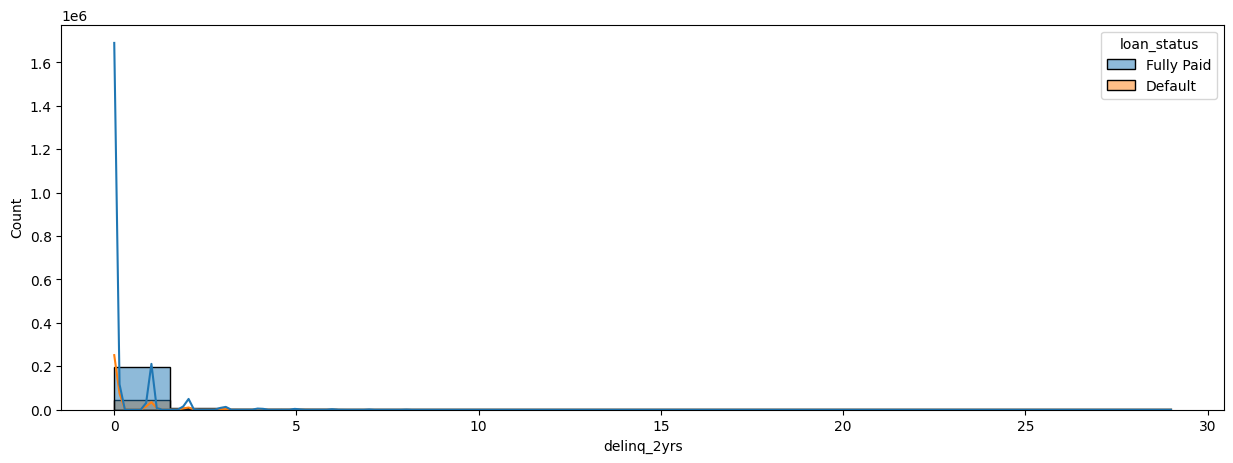

In [325]:
plt.figure(figsize = (15,5))
sns.histplot(data =df, x = 'delinq_2yrs' , hue = 'loan_status',kde  =True)

<Axes: xlabel='open_acc', ylabel='Count'>

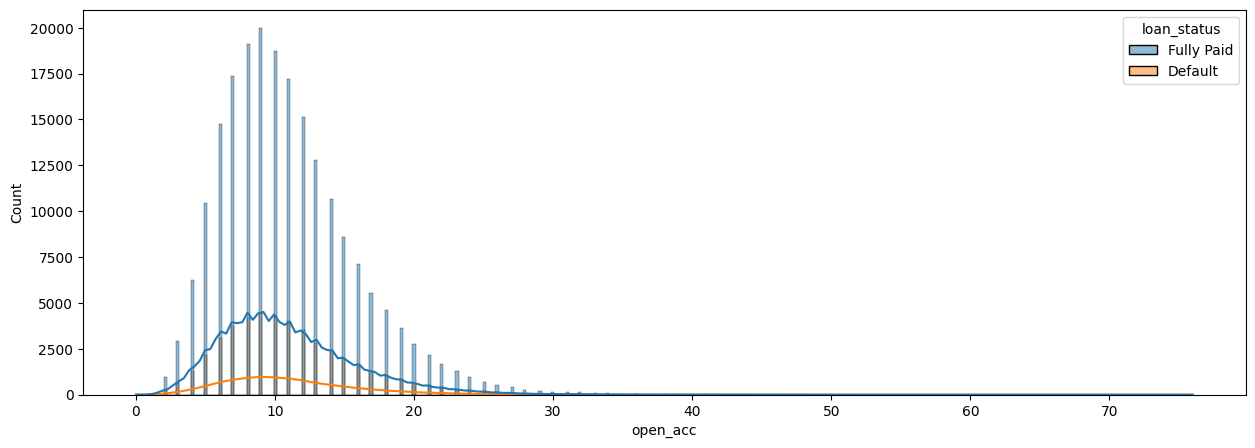

In [380]:
plt.figure(figsize = (15,5))
sns.histplot(data =df, x = 'open_acc' , hue = 'loan_status',kde  =True)

<Axes: xlabel='pub_rec', ylabel='Count'>

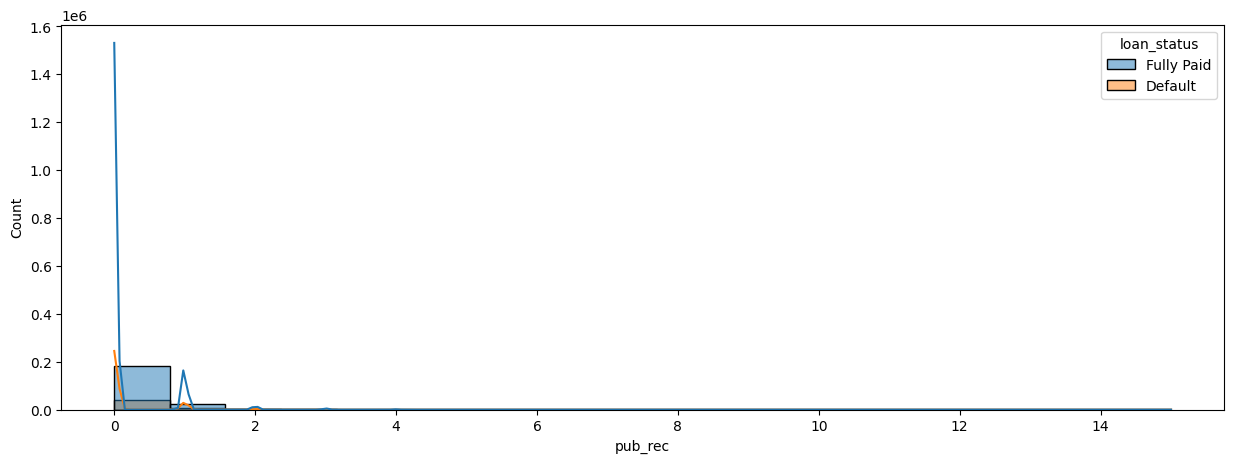

In [331]:
plt.figure(figsize = (15,5))
sns.histplot(data =df, x = 'pub_rec' , hue = 'loan_status',kde  =True)

In [410]:
df['pub_rec'].value_counts().head(20)

pub_rec
0     223046
1      27514
2       2570
3        684
4        204
5         93
6         39
7         19
8          8
9          5
10         5
11         1
15         1
12         1
Name: count, dtype: int64

Text(0.5, 1.0, 'Revol_bal with outliers')

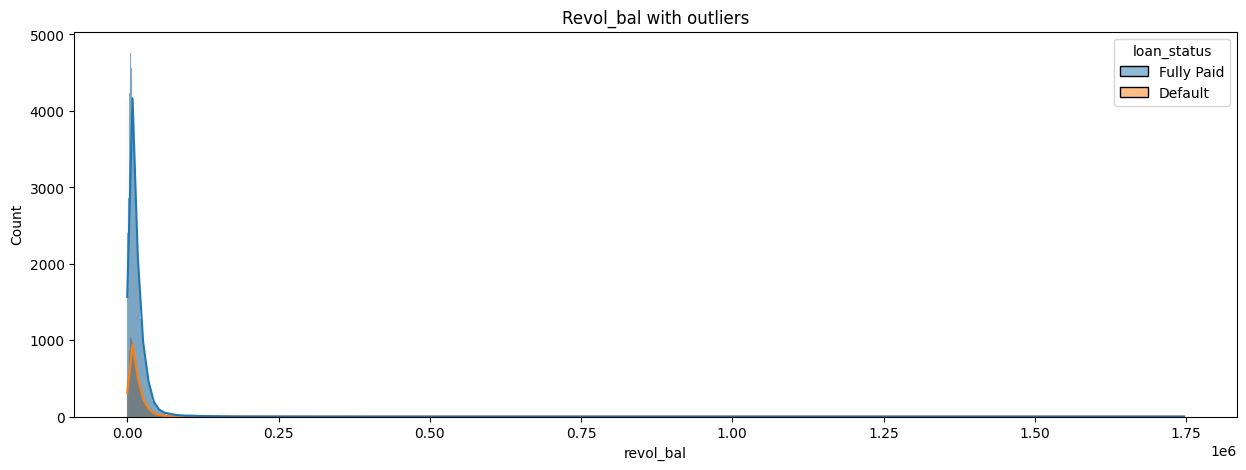

In [384]:
plt.figure(figsize = (15,5))
sns.histplot(data =df, x = 'revol_bal' , hue = 'loan_status',kde  =True)
plt.title('Revol_bal with outliers')

Text(0.5, 1.0, 'Revo_bal when outlier removed')

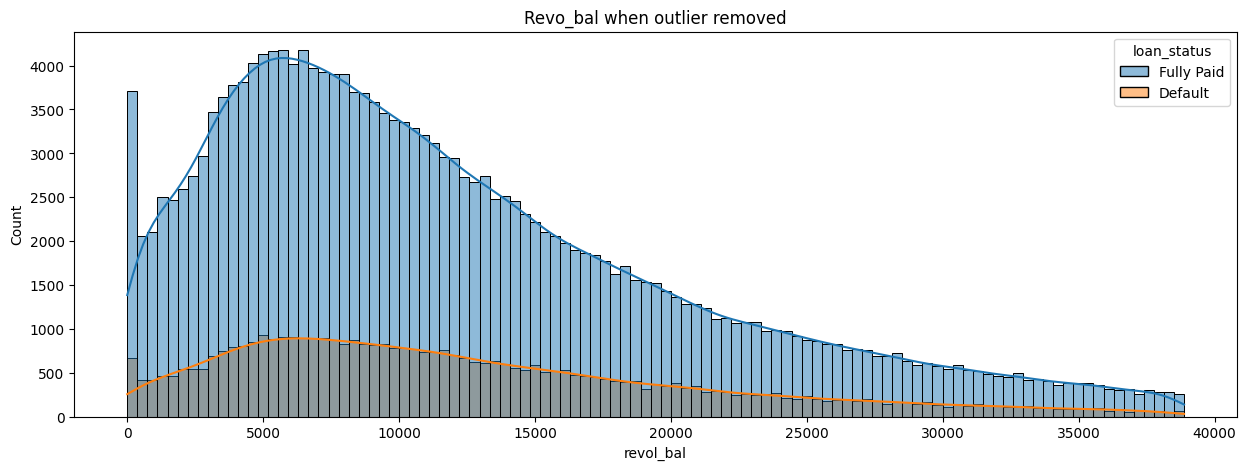

In [398]:
plt.figure(figsize = (15,5))
sns.histplot(data =ai_df, x = outlier_removed(df,'revol_bal')['revol_bal'] , hue = 'loan_status',kde  =True)
plt.title('Revo_bal when outlier removed')

<Axes: xlabel='revol_util', ylabel='Count'>

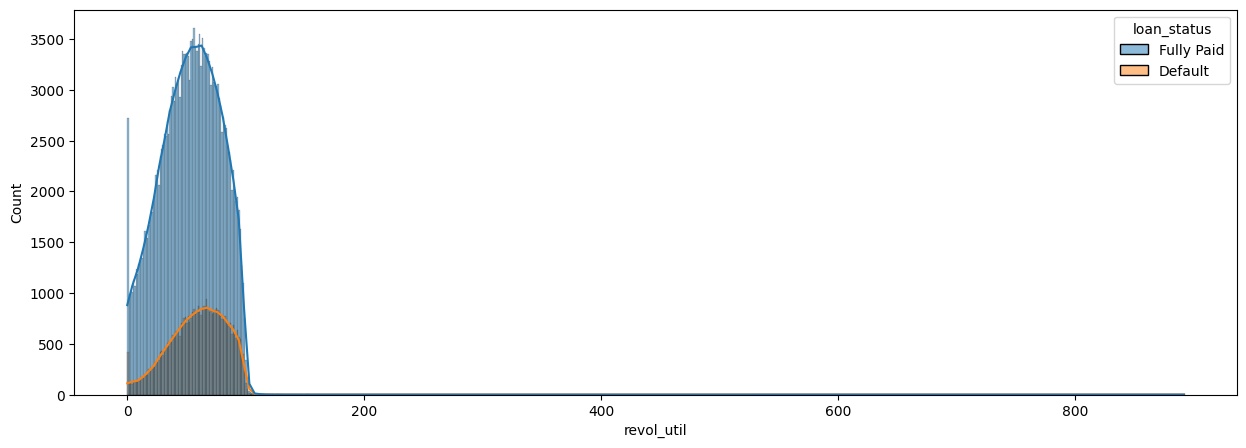

In [333]:
plt.figure(figsize = (15,5))
sns.histplot(data =df, x = 'revol_util' , hue = 'loan_status',kde  =True)

<Axes: xlabel='total_acc', ylabel='Count'>

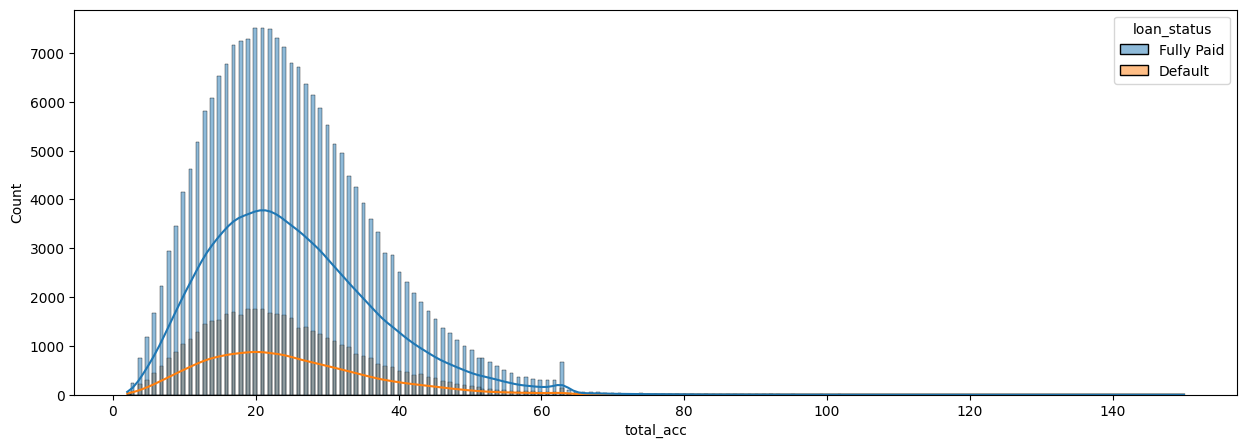

In [334]:
plt.figure(figsize = (15,5))
sns.histplot(data =df, x = 'total_acc' , hue = 'loan_status',kde  =True)

In [336]:
df['out_prncp'].value_counts().head()

out_prncp
0.00        252972
27847.66         2
2403.73          2
17154.65         2
12379.43         2
Name: count, dtype: int64

<Axes: xlabel='out_prncp', ylabel='Count'>

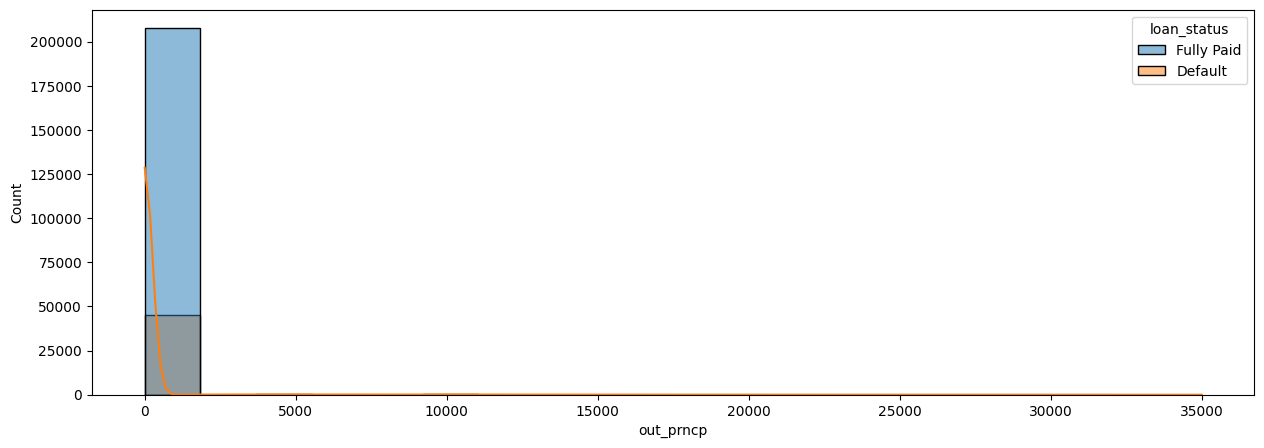

In [335]:
plt.figure(figsize = (15,5))
sns.histplot(data =df, x = 'out_prncp' , hue = 'loan_status',kde  =True)

<Axes: xlabel='out_prncp_inv', ylabel='Count'>

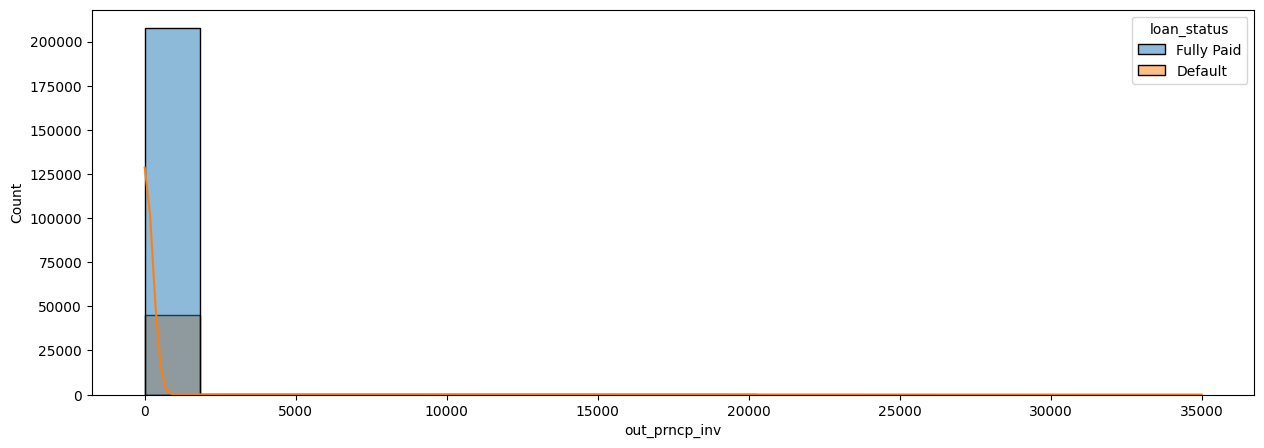

In [337]:
plt.figure(figsize = (15,5))
sns.histplot(data =df, x = 'out_prncp_inv' , hue = 'loan_status',kde  =True)

<Axes: xlabel='total_pymnt', ylabel='Count'>

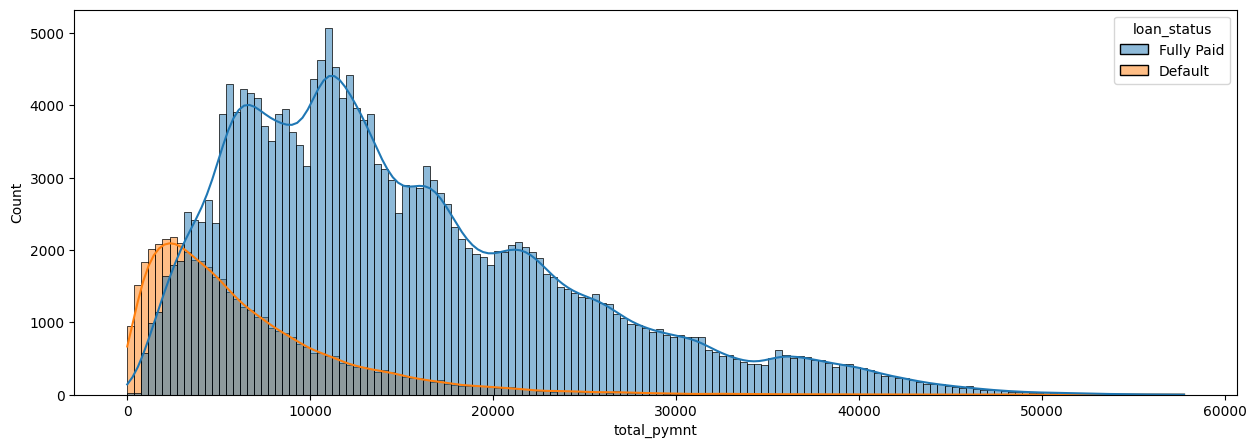

In [386]:
plt.figure(figsize = (15,5))
sns.histplot(data =df, x = 'total_pymnt' , hue = 'loan_status',kde  =True)

<Axes: xlabel='total_pymnt_inv', ylabel='Count'>

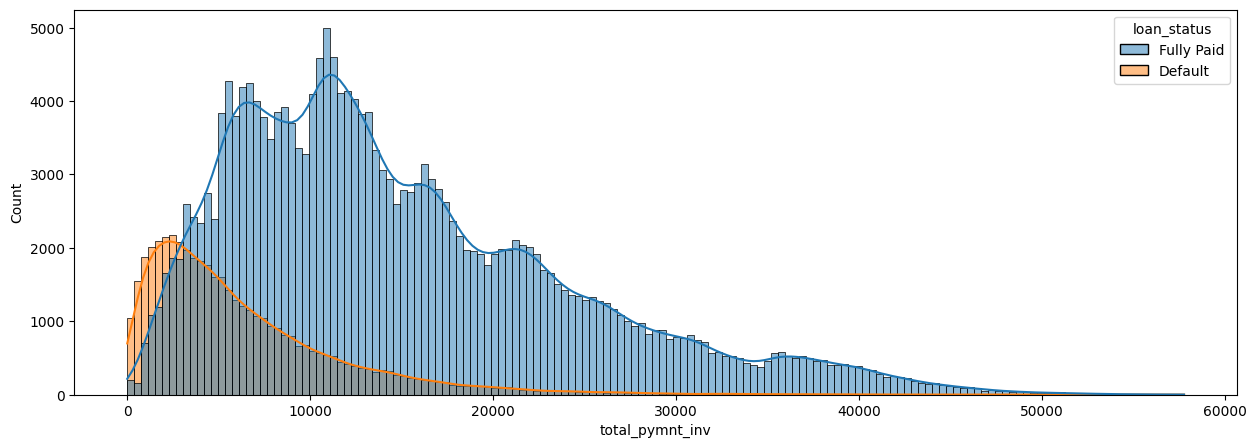

In [387]:
plt.figure(figsize = (15,5))
sns.histplot(data =df, x = 'total_pymnt_inv' , hue = 'loan_status',kde  =True)

<Axes: xlabel='total_rec_prncp', ylabel='Count'>

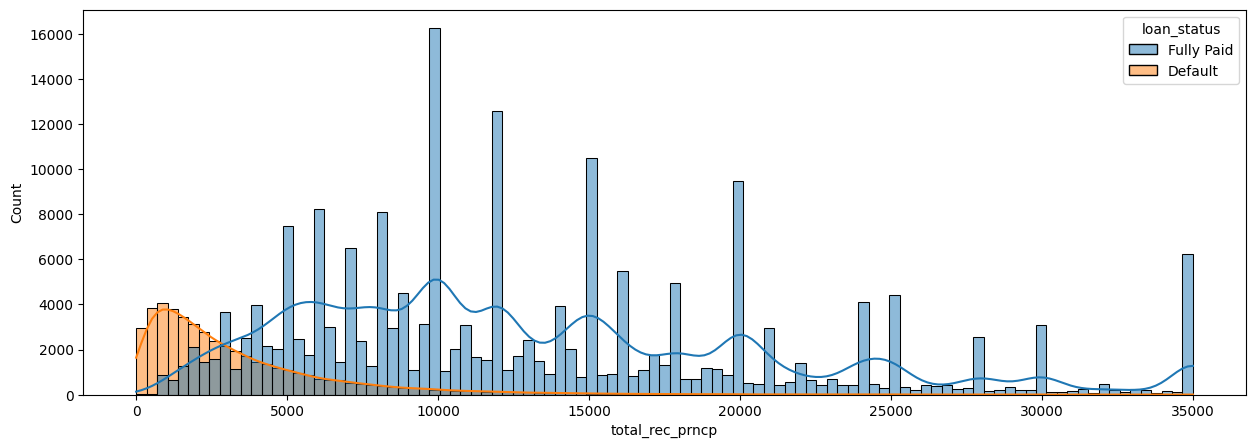

In [388]:
plt.figure(figsize = (15,5))
sns.histplot(data =df, x = 'total_rec_prncp' , hue = 'loan_status',kde  =True)

<Axes: xlabel='total_rec_int', ylabel='Count'>

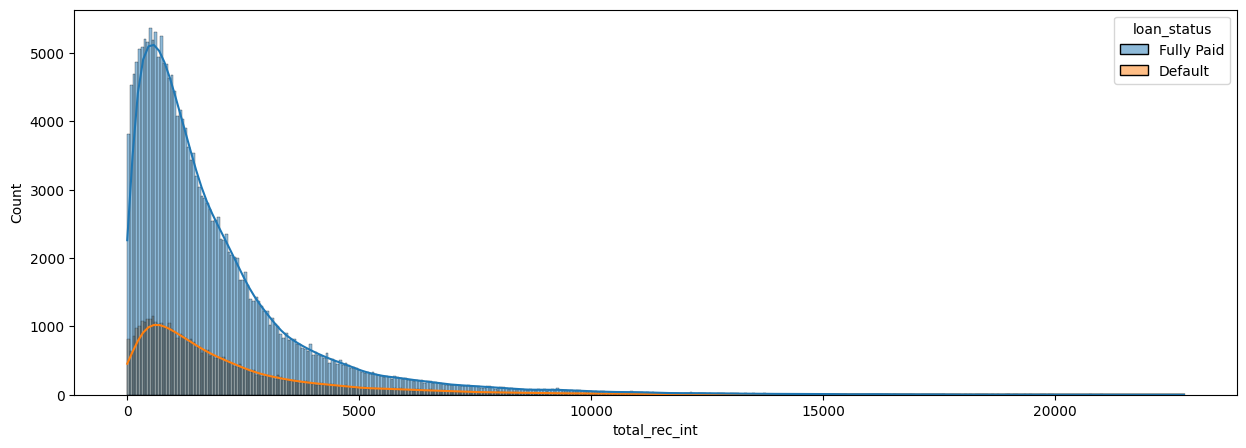

In [389]:
plt.figure(figsize = (15,5))
sns.histplot(data =df, x = 'total_rec_int' , hue = 'loan_status',kde  =True)

<Axes: xlabel='total_rec_late_fee', ylabel='Count'>

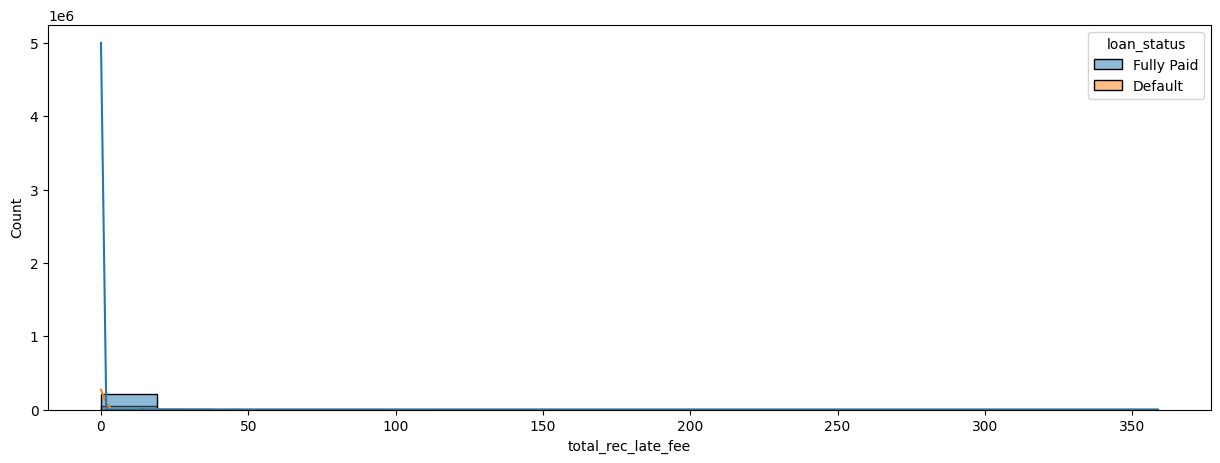

In [390]:
plt.figure(figsize = (15,5))
sns.histplot(data =df, x = 'total_rec_late_fee' , hue = 'loan_status',kde  =True)

In [403]:
df['total_rec_late_fee'].value_counts().head(20)

total_rec_late_fee
0.00     247568
15.00      1208
30.00       133
45.00        23
15.00        14
60.00        11
20.60        10
18.02        10
17.41         9
16.84         9
20.00         9
16.64         9
16.06         8
17.11         7
18.87         7
20.41         7
34.34         7
25.00         6
17.01         6
75.00         6
Name: count, dtype: int64

<Axes: xlabel='recoveries', ylabel='Count'>

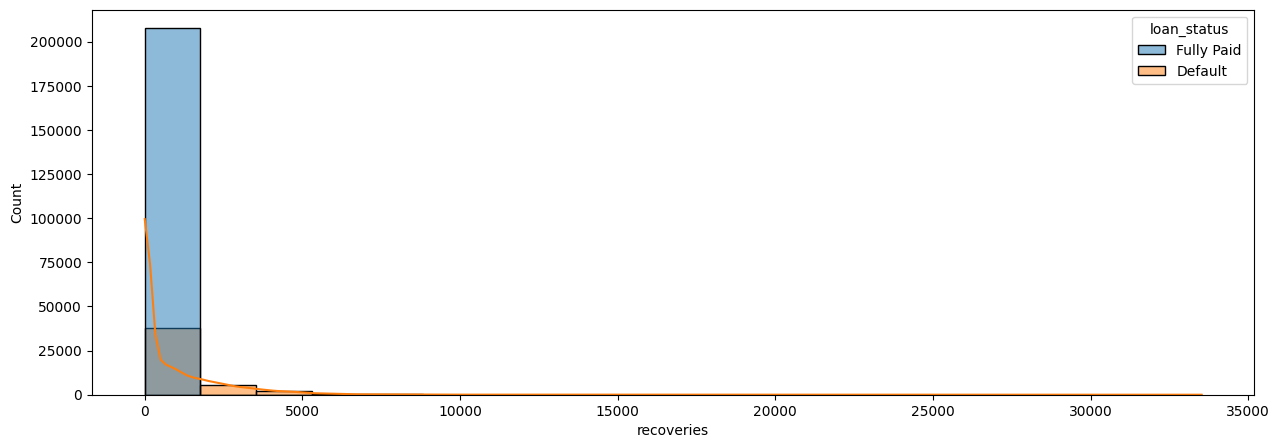

In [391]:
plt.figure(figsize = (15,5))
sns.histplot(data =df, x = 'recoveries' , hue = 'loan_status',kde  =True)

In [404]:
df['recoveries'].value_counts().head(20)

recoveries
0.00       230003
200.00         10
11.70           9
14.28           9
10.40           8
100.00          8
10.00           8
16.50           8
800.00          8
10.08           7
10.20           7
12.00           7
11.20           7
16.80           7
5200.00         6
10.66           6
10.92           6
11.16           6
10.56           6
13.20           6
Name: count, dtype: int64

<Axes: xlabel='collection_recovery_fee', ylabel='Count'>

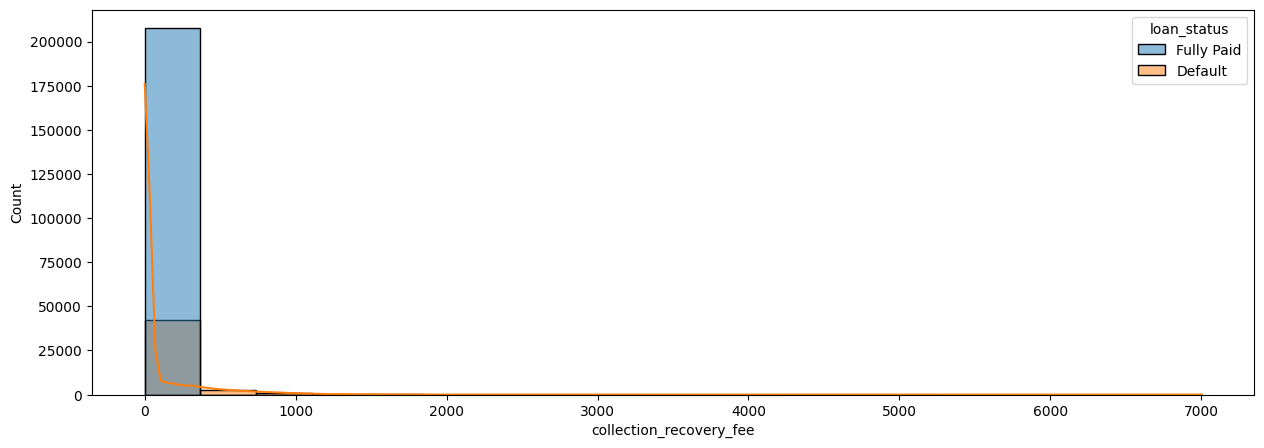

In [392]:
plt.figure(figsize = (15,5))
sns.histplot(data =df, x = 'collection_recovery_fee' , hue = 'loan_status',kde  =True)

In [401]:
df['collection_recovery_fee'].value_counts().head(20)

collection_recovery_fee
0.00    231155
2.00        15
1.80        11
1.88        11
4.52        11
1.20        11
2.52        11
1.55        10
1.07        10
2.61        10
3.93        10
1.69        10
3.20        10
2.88        10
3.09        10
3.39        10
2.43         9
2.02         9
0.80         9
1.60         9
Name: count, dtype: int64

<Axes: xlabel='last_pymnt_amnt', ylabel='Count'>

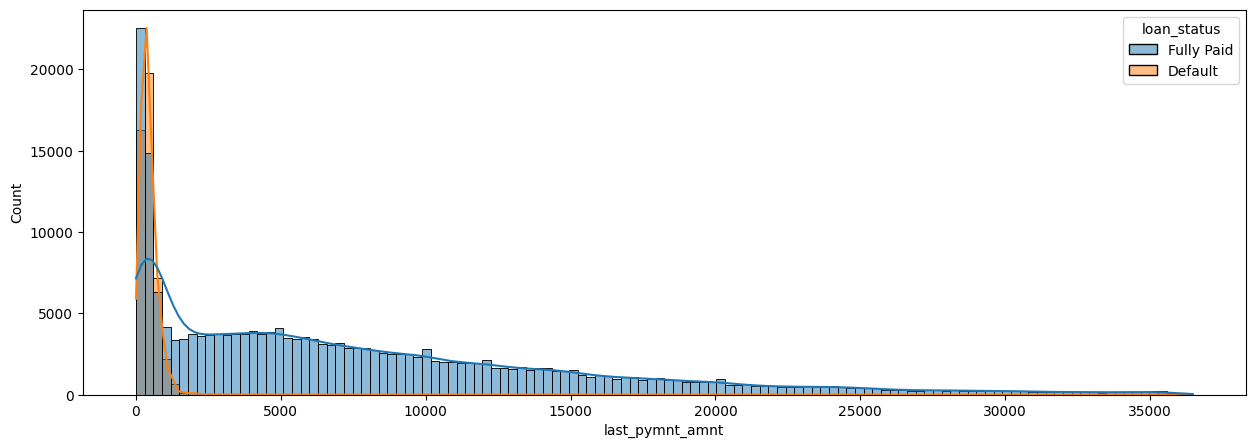

In [393]:
plt.figure(figsize = (15,5))
sns.histplot(data =df, x = 'last_pymnt_amnt' , hue = 'loan_status',kde  =True)

<Axes: xlabel='collections_12_mths_ex_med', ylabel='Count'>

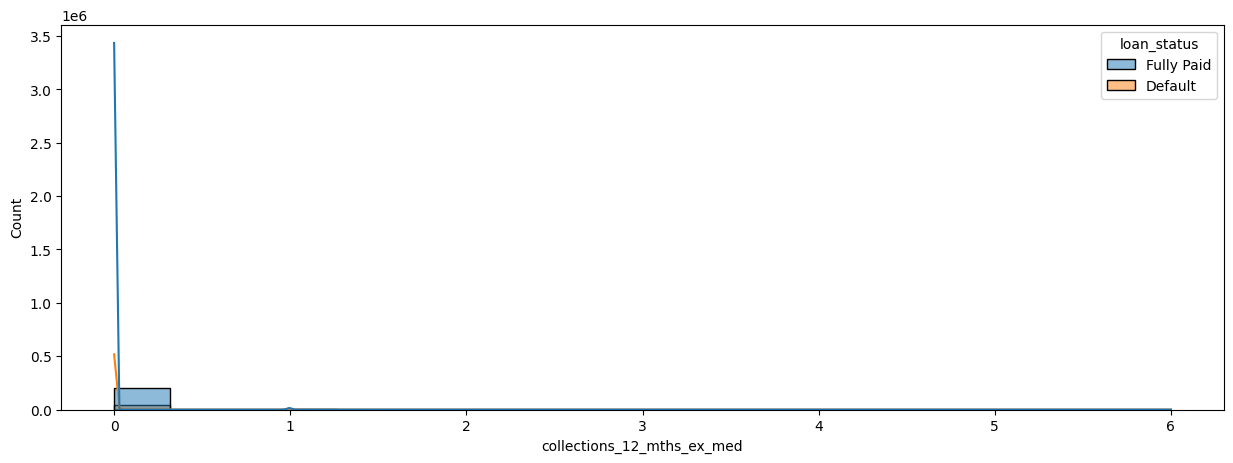

In [394]:
plt.figure(figsize = (15,5))
sns.histplot(data =df, x = 'collections_12_mths_ex_med' , hue = 'loan_status',kde  =True)

### Categorical type- 'collections_12_mths_ex_med'

In [400]:
df['collections_12_mths_ex_med'].value_counts().head(20)

collections_12_mths_ex_med
0    252597
1      1484
2        97
3         8
4         2
6         1
5         1
Name: count, dtype: int64

<Axes: xlabel='acc_now_delinq', ylabel='Count'>

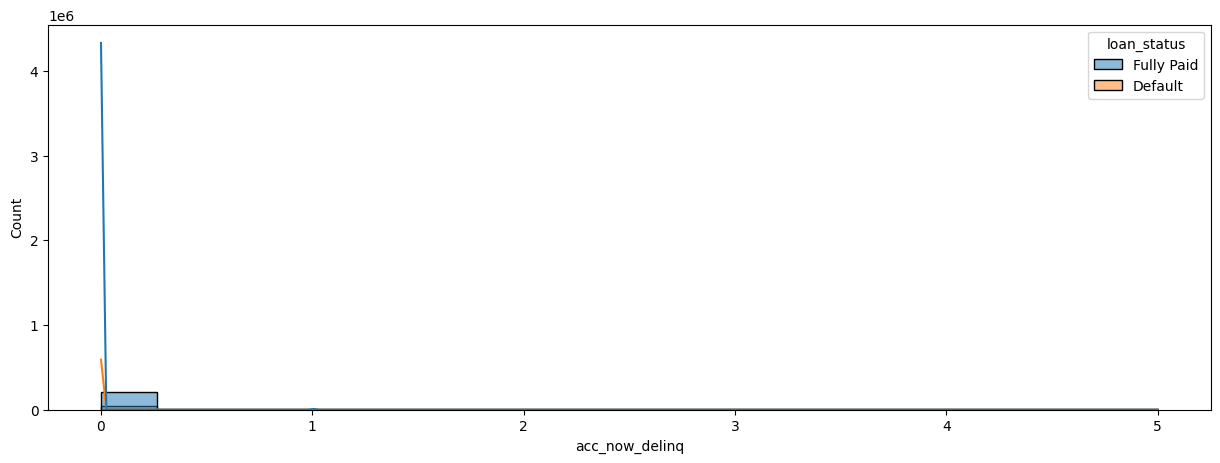

In [395]:
plt.figure(figsize = (15,5))
sns.histplot(data =df, x = 'acc_now_delinq' , hue = 'loan_status',kde  =True)

### acc_now_delinq - Categorical

In [405]:
df['acc_now_delinq'].value_counts().head(20)

acc_now_delinq
0    253449
1       699
2        36
3         3
5         2
4         1
Name: count, dtype: int64

<Axes: xlabel='tot_coll_amt', ylabel='Count'>

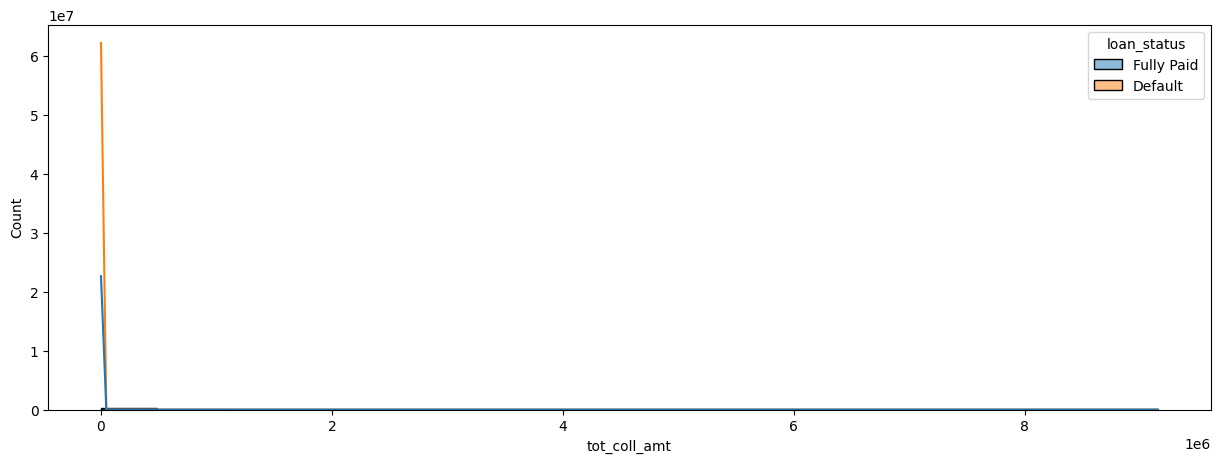

In [396]:
plt.figure(figsize = (15,5))
sns.histplot(data =df, x = 'tot_coll_amt' , hue = 'loan_status',kde  =True)

In [406]:
df['tot_coll_amt'].value_counts().head(20)

tot_coll_amt
0.0      232315
50.0        350
100.0       304
75.0        239
150.0       143
200.0       130
80.0        125
55.0        122
60.0        117
90.0        115
70.0        113
85.0        106
65.0         99
54.0         89
95.0         89
79.0         89
69.0         85
58.0         83
53.0         82
66.0         81
Name: count, dtype: int64

<Axes: xlabel='tot_cur_bal', ylabel='Count'>

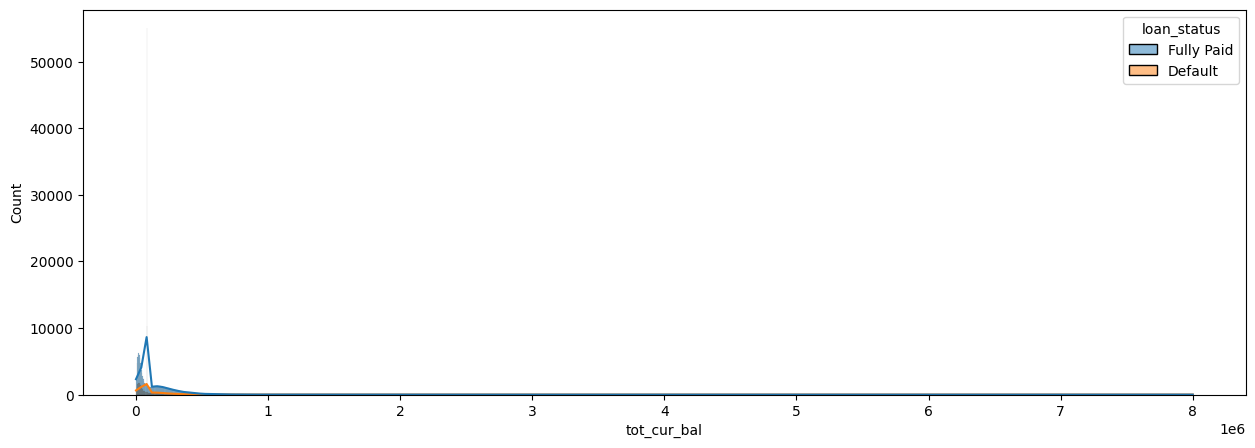

In [397]:
plt.figure(figsize = (15,5))
sns.histplot(data =df, x = 'tot_cur_bal' , hue = 'loan_status',kde  =True)

In [407]:
df['tot_cur_bal'].value_counts().head(20)

tot_cur_bal
80760.5    63726
0.0           50
19376.0        9
13530.0        9
4875.0         9
25341.0        9
28674.0        9
30491.0        9
13721.0        8
13166.0        8
15886.0        8
45492.0        8
25443.0        8
27222.0        8
26201.0        8
12022.0        8
15043.0        8
16709.0        8
18311.0        8
30652.0        8
Name: count, dtype: int64

<Axes: xlabel='total_rev_hi_lim', ylabel='Count'>

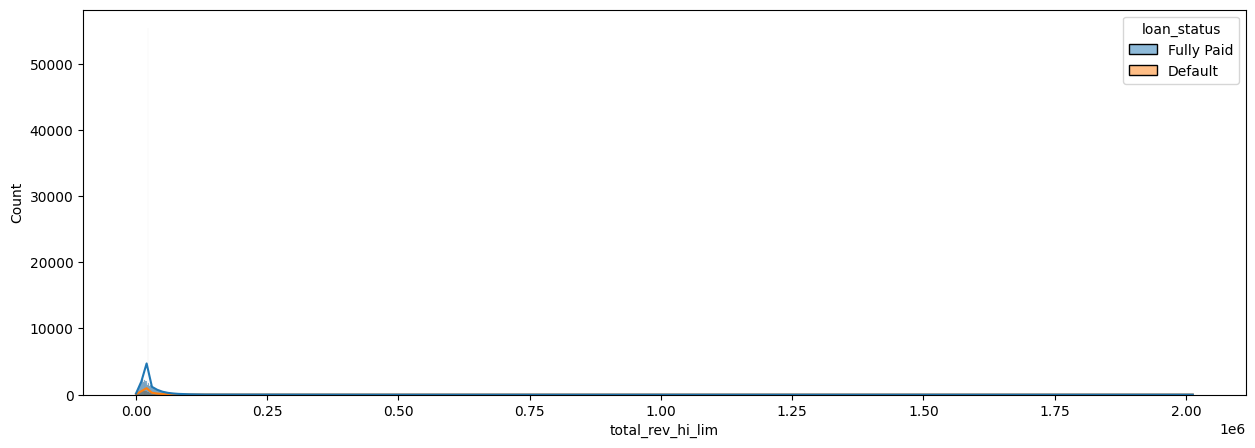

In [385]:
plt.figure(figsize = (15,5))
sns.histplot(data =df, x = 'total_rev_hi_lim' , hue = 'loan_status',kde  =True)

In [408]:
df['total_rev_hi_lim'].value_counts().head(20)

total_rev_hi_lim
22300.0    64126
9000.0       679
13500.0      679
15000.0      652
11500.0      651
11000.0      648
10500.0      644
10000.0      643
14500.0      643
12000.0      624
14000.0      618
16000.0      603
16300.0      602
12500.0      601
12200.0      593
8500.0       592
13800.0      590
17000.0      589
16500.0      588
13300.0      588
Name: count, dtype: int64

data_variance(health_target_0,health_target_1)

#### Categorical Type

In [416]:
df_wo_emp_title = cat.drop(['emp_title'],axis = 1)

In [414]:
df['emp_title'].nunique()

133189

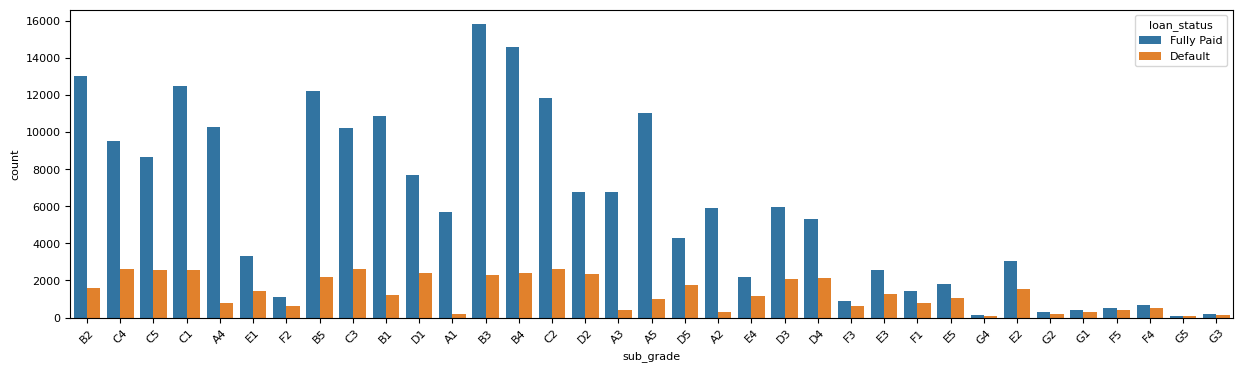

In [473]:
plt.rc('font', size = 8)
plt.figure(figsize = (15,4))
sns.countplot(data = df, x = 'sub_grade',hue  = 'loan_status')
plt.tick_params('x', labelrotation = 45)

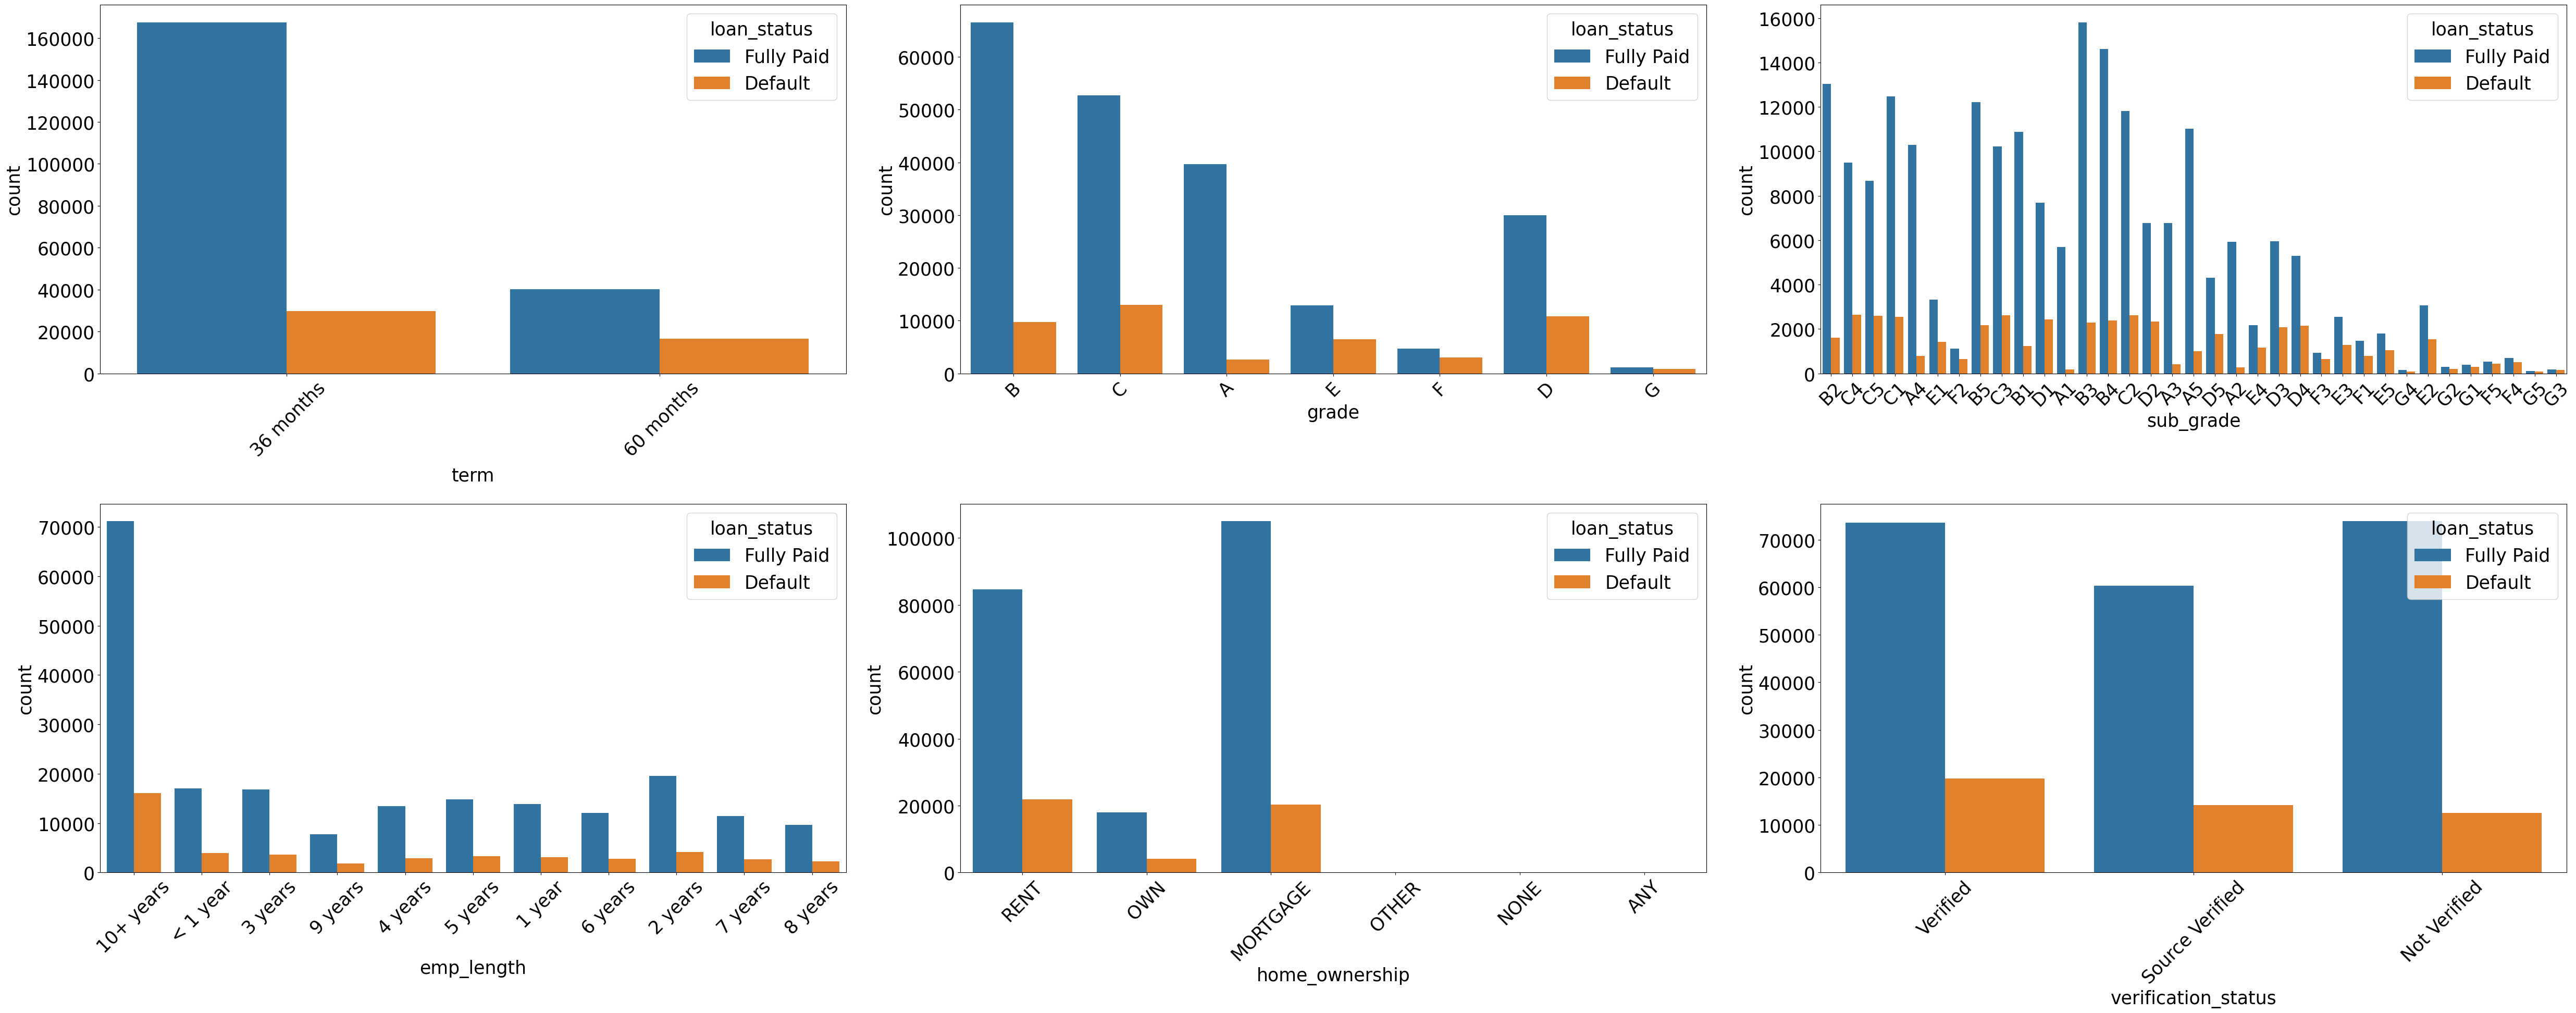

In [433]:
#plt.rc('font', size=25)
fig,axs = plt.subplots(nrows = 2, ncols = 3,figsize = (50,20))
axs = axs.flatten()
for row, var in enumerate(cat_wo_emp_title.columns[:6]):
    sns.countplot(data = df_wo_emp_title,x = var ,hue ='loan_status', ax = axs[row])
    axs[row].tick_params('x', labelrotation = 45)
    plt.tight_layout()


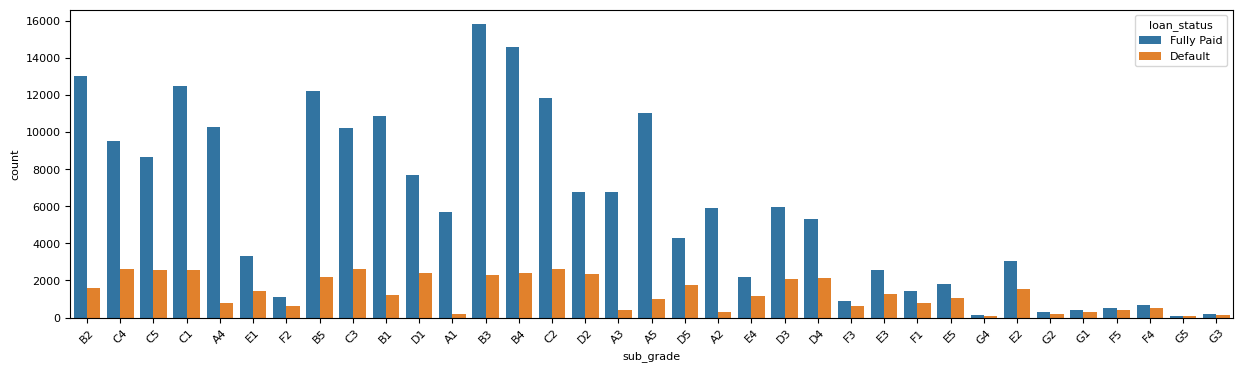

In [474]:
plt.rc('font', size = 8)
plt.figure(figsize = (15,4))
sns.countplot(data = df, x = 'sub_grade',hue  = 'loan_status')
plt.tick_params('x', labelrotation = 45)

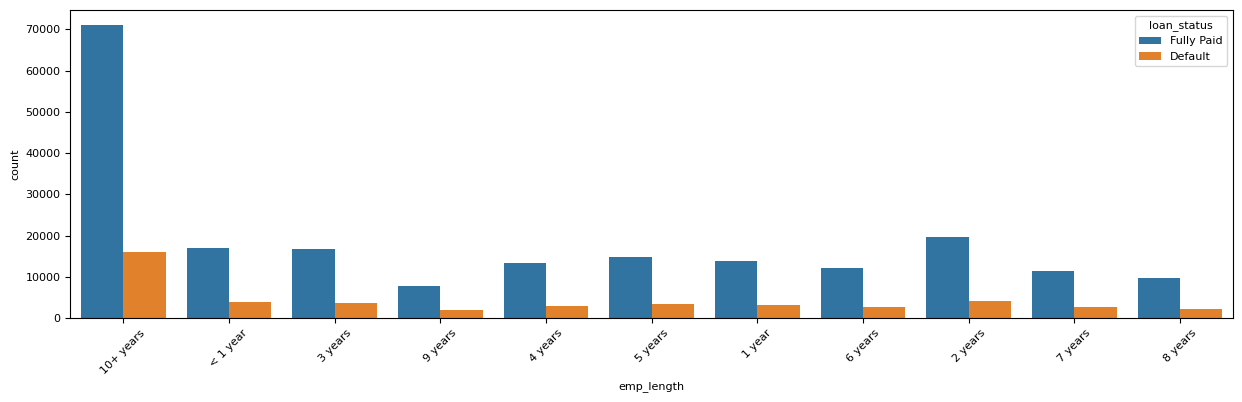

In [475]:
plt.rc('font', size = 8)
plt.figure(figsize = (15,4))
sns.countplot(data = df, x = 'emp_length',hue  = 'loan_status')
plt.tick_params('x', labelrotation = 45)

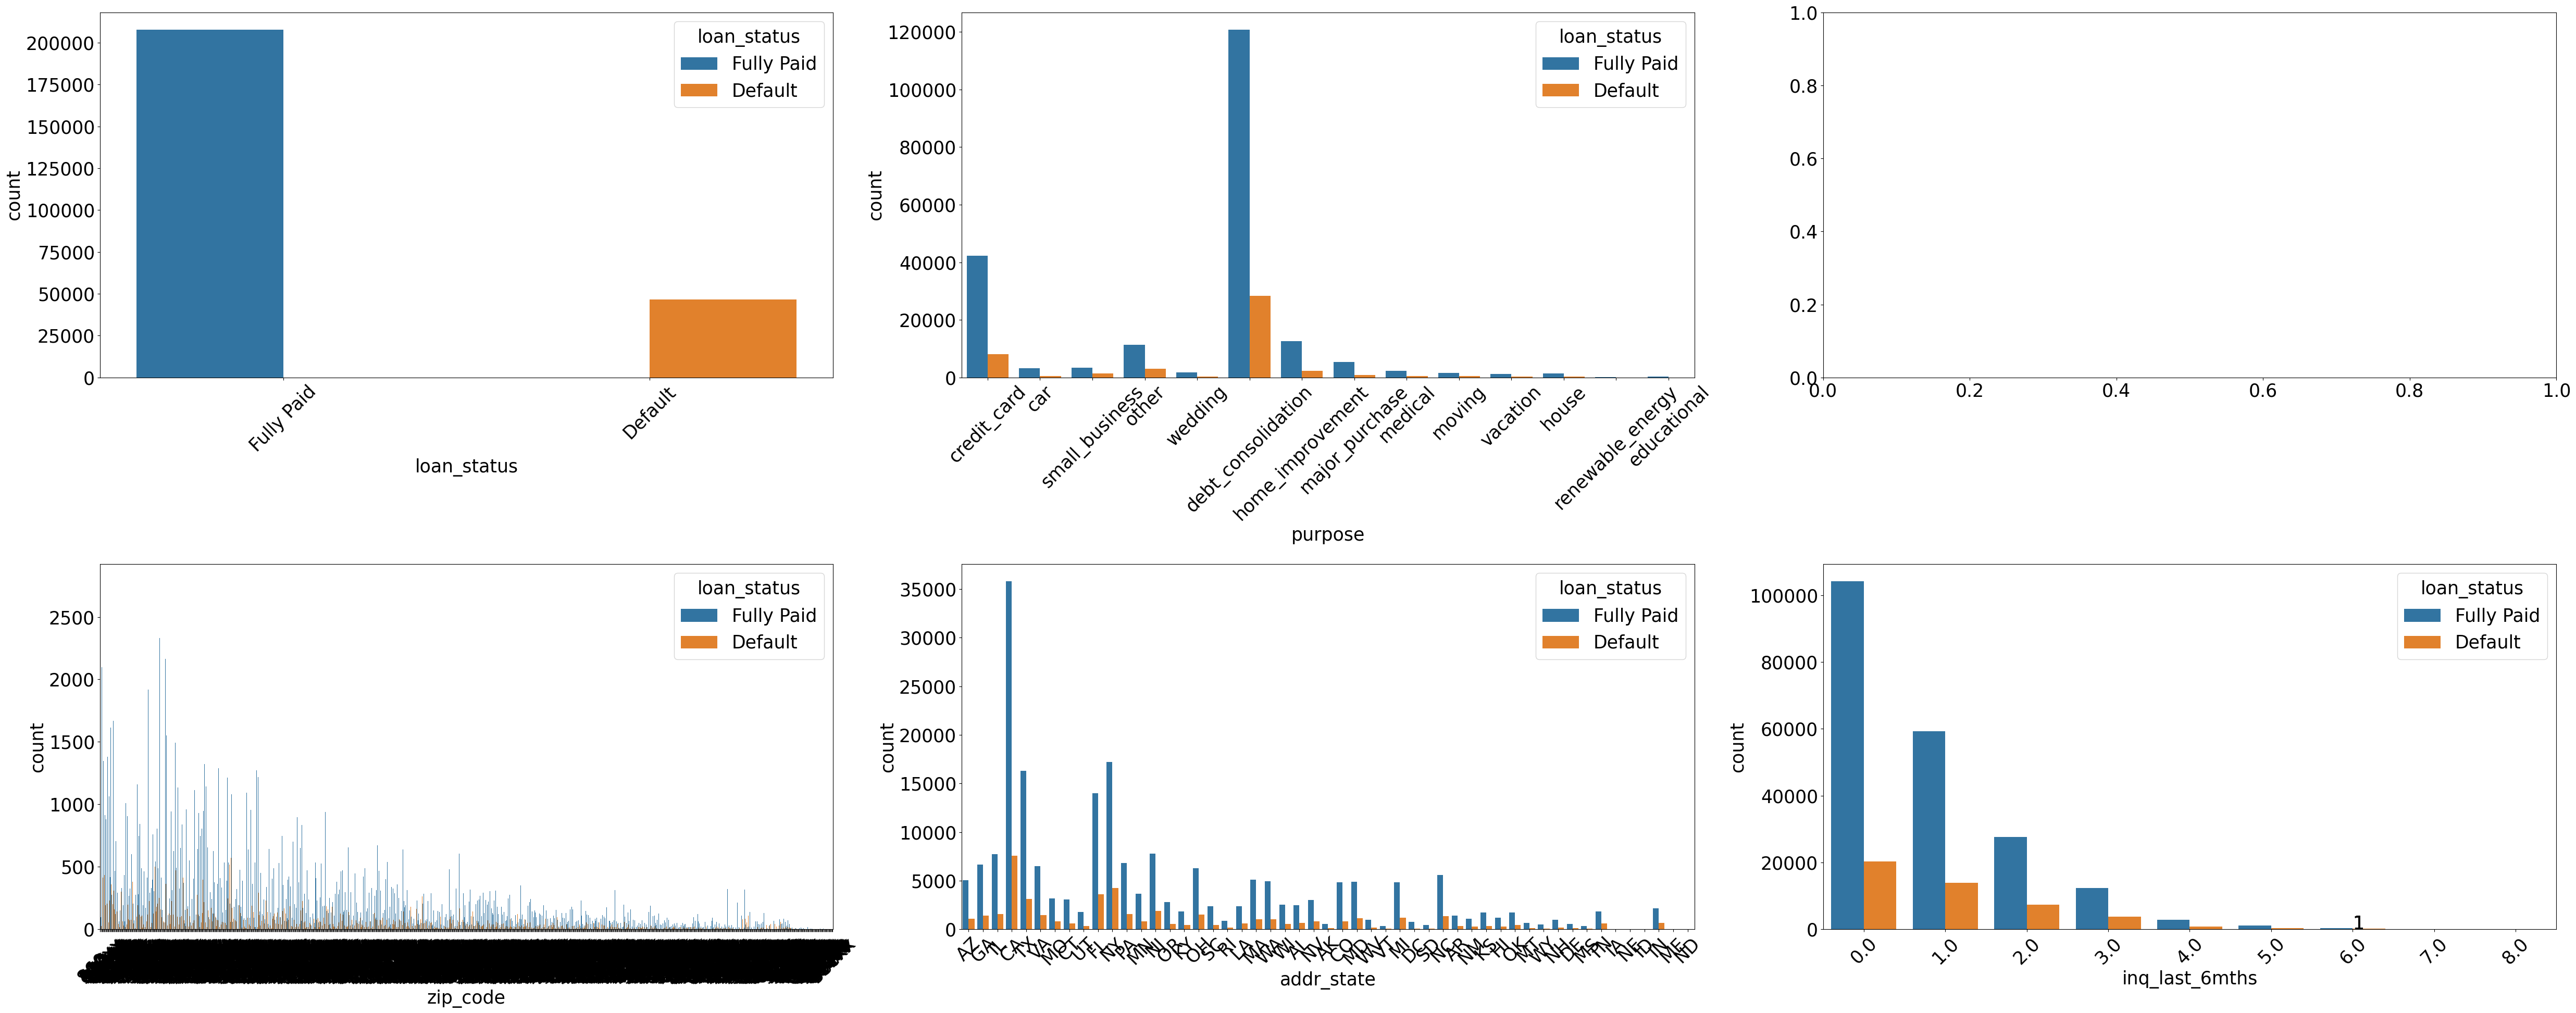

In [420]:
plt.rc('font', size=25)
fig,axs = plt.subplots(nrows = 2, ncols = 3,figsize = (50,20))
axs = axs.flatten()
for row, var in enumerate(cat_wo_emp_title.columns[6:12]):
    if var == 'title':
        pass
    else:
        sns.countplot(data = df,x = var ,hue ='loan_status', ax = axs[row])
        plt.text(x = 6, y = 3, s = 1)
        axs[row].tick_params(axis='x', rotation=45)
        #plt.text(i, y[i], y[i], ha = 'center')
        plt.tight_layout()

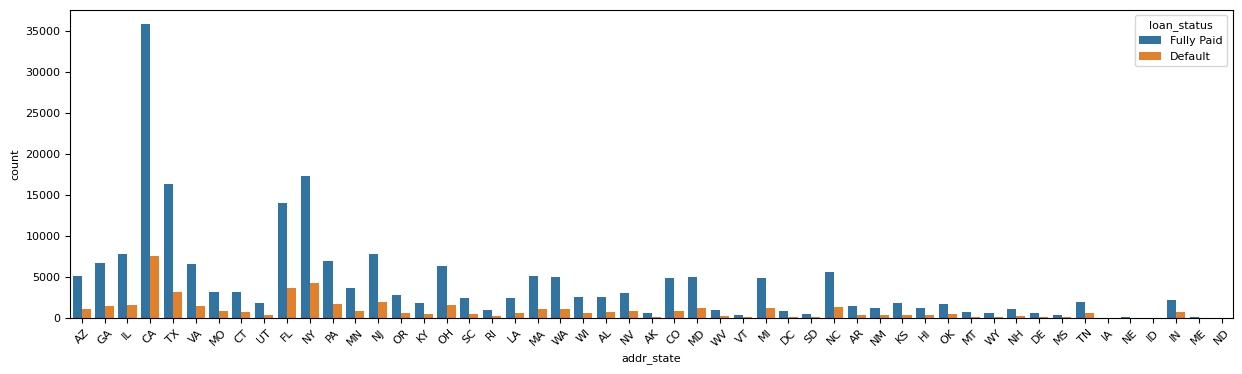

In [477]:
plt.rc('font', size = 8)
plt.figure(figsize = (15,4))
sns.countplot(data = df, x = 'addr_state',hue  = 'loan_status')
plt.tick_params('x', labelrotation = 45)

In [427]:
import stats

In [422]:
cnt_table = pd.crosstab(df['loan_status'],df['term'])

In [425]:
import statsmodels

In [435]:
cat.columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'loan_status', 'purpose',
       'title', 'zip_code', 'addr_state', 'inq_last_6mths',
       'mths_since_last_delinq', 'initial_list_status'],
      dtype='object')

In [465]:
def test_of_independence(data,target):
    cnt_table = pd.crosstab(df[target],df[column])
    t_stat,p_val,dof, expected_freq = stats.chi2_contingency(cnt_table)
    return t_stat,p_val,dof, expected_freq

In [ ]:
for i in cat.columns:
    cnt_table = pd.crosstab(df['loan_status'],df[i])
    t_stat,p_val,dof, expected_freq = stats.chi2_contingency(cnt_table)

In [467]:
df['loan_status'].dtype

dtype('O')

df.select_dtypes(include = 'object')- ['loan_status']

In [466]:
aop = df[['term', 'grade', 'sub_grade']]

In [ ]:
test_of_independence(data = ,'loan_status')

In [ ]:
stats.chi2_contingency(cnt_table)

In [436]:
cnt_table = pd.crosstab(df['loan_status'],df['grade'])
cnt_table

grade            A      B      C      D      E     F     G
loan_status                                               
Default       2664   9717  13002  10798   6459  3013   814
Fully Paid   39679  66546  52678  30020  12928  4726  1146

In [434]:
## term
stats.chi2_contingency(cnt_table)

Chi2ContingencyResult(statistic=5988.136665708869, pvalue=0.0, dof=1, expected_freq=array([[ 36080.61367874,  10386.38632126],
       [161292.38632126,  46430.61367874]]))

In [437]:
## grade
stats.chi2_contingency(cnt_table)

Chi2ContingencyResult(statistic=13419.493223913541, pvalue=0.0, dof=6, expected_freq=array([[ 7740.47830757, 13941.19682521, 12006.57995987,  7461.70190015,
         3544.02505606,  1414.72171604,   358.2962351 ],
       [34602.52169243, 62321.80317479, 53673.42004013, 33356.29809985,
        15842.97494394,  6324.27828396,  1601.7037649 ]]))

In [438]:
## sub grade

cnt_table = pd.crosstab(df['loan_status'],df['sub_grade'])
cnt_table

sub_grade      A1    A2    A3     A4     A5     B1     B2     B3     B4     B5  ...    F1    F2   F3   F4   F5   G1   G2   G3   G4   G5
loan_status                                                                     ...                                                    
Default       181   283   406    790   1004   1242   1619   2297   2382   2177  ...   793   643  641  505  431  297  206  146   78   87
Fully Paid   5689  5925  6774  10279  11012  10883  13035  15809  14610  12209  ...  1460  1114  919  696  537  397  297  190  158  104

[2 rows x 35 columns]

In [439]:
## grade
stats.chi2_contingency(cnt_table)

Chi2ContingencyResult(statistic=14131.723666193791, pvalue=0.0, dof=34, expected_freq=array([[ 1073.06066328,  1134.84848342,  1312.53416736,  2023.45970731,
         2196.5752862 ,  2216.50094418,  2678.81276998,  3309.85287383,
         3106.20899327,  2629.82124395,  2746.26752036,  2635.8537826 ,
         2349.76520713,  2216.68374838,  2058.0097014 ,  1847.96767379,
         1668.08833943,  1470.11138912,  1362.62251859,  1112.91197923,
          868.86837012,   837.97446005,   702.69935088,   613.67370471,
          520.80917031,   411.85786616,   321.18698218,   285.17455447,
          219.5478461 ,   176.95446713,   126.8661159 ,    91.9505134 ,
           61.42221173,    43.14179157,    34.9156025 ],
       [ 4796.93933672,  5073.15151658,  5867.46583264,  9045.54029269,
         9819.4247138 ,  9908.49905582, 11975.18723002, 14796.14712617,
        13885.79100673, 11756.17875605, 12276.73247964, 11783.1462174 ,
        10504.23479287,  9909.31625162,  9199.9902986 ,  8261.032

In [440]:
cnt_table = pd.crosstab(df['loan_status'],df['inq_last_6mths'])
cnt_table

inq_last_6mths     0.0    1.0    2.0    3.0   4.0   5.0  6.0  7.0  8.0
loan_status                                                           
Default          20237  13893   7300   3735   835   308  143   12    4
Fully Paid      104123  59208  27611  12400  2878  1075  380   34   14

In [450]:
a ='jkakdksa'

In [462]:
cnt_table[8.0].min()

4

In [470]:
for i in cnt_table.columns:
    if cnt_table[i].min() < 5:
        print(i,cnt_table[i].min())
        

SyntaxError: invalid syntax (949996486.py, line 3)

In [482]:
def test_of_independence(df, target_column, columns_to_exclude):
    results = {}
    for column in df.columns:
        if column == target_column or column in columns_to_exclude:
            continue
        
        contingency_table = pd.crosstab(df[column], df[target_column])
        
        chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
        if (expected < 5).any():
            print(f"Column '{column}' has expected frequency less than 5.")
            results[column] = 'Frequency check failed'
            continue
        if p < 0.05:
            print(f"Column '{column}' is associated with the target variable (p-value={p}).")
            results[column] = 'Associated'
        else:
            print(f"Column '{column}' is NOT associated with the target variable (p-value={p}).")
            results[column] = 'Not associated'
    
    return results


chi2_results = test_of_independence(cat, 'loan_status', ['loan_status'])
chi2_results


Column 'term' is associated with the target variable (p-value=0.0).
Column 'grade' is associated with the target variable (p-value=0.0).
Column 'sub_grade' is associated with the target variable (p-value=0.0).
Column 'emp_title' has expected frequency less than 5.
Column 'emp_length' is associated with the target variable (p-value=3.2210025275013566e-05).
Column 'home_ownership' has expected frequency less than 5.
Column 'verification_status' is associated with the target variable (p-value=7.48737445413394e-305).
Column 'purpose' is associated with the target variable (p-value=8.670514864994786e-197).
Column 'title' has expected frequency less than 5.
Column 'zip_code' has expected frequency less than 5.
Column 'addr_state' has expected frequency less than 5.
Column 'inq_last_6mths' has expected frequency less than 5.
Column 'mths_since_last_delinq' has expected frequency less than 5.
Column 'initial_list_status' is associated with the target variable (p-value=0.02710953811455667).


{'term': 'Associated',
 'grade': 'Associated',
 'sub_grade': 'Associated',
 'emp_title': 'Frequency check failed',
 'emp_length': 'Associated',
 'home_ownership': 'Frequency check failed',
 'verification_status': 'Associated',
 'purpose': 'Associated',
 'title': 'Frequency check failed',
 'zip_code': 'Frequency check failed',
 'addr_state': 'Frequency check failed',
 'inq_last_6mths': 'Frequency check failed',
 'mths_since_last_delinq': 'Frequency check failed',
 'initial_list_status': 'Associated'}

### Numeric Attributes

In [497]:
def perform_normality_and_levene_tests(df, target_variable):
    groups = df[target_variable].unique()

    for column in df.select_dtypes(include=[np.number]).columns:
        if column == target_variable:
            continue

        group1 = df[df[target_variable] == groups[0]][column]
        group2 = df[df[target_variable] == groups[1]][column]

        shapiro_group1 = stats.shapiro(group1)[1]
        shapiro_group2 = stats.shapiro(group2)[1]
        levene_test = stats.levene(group1, group2)[1]

        print(f"Results for {column}:")
        print(f"  Shapiro Group 1 (p-value = {shapiro_group1}): {'Normal' if shapiro_group1 > 0.05 else 'Not normal'}")
        print(f"  Shapiro Group 2 (p-value = {shapiro_group2}): {'Normal' if shapiro_group2 > 0.05 else 'Not normal'}")
        print(f"  Levene Test (p-value = {levene_test}): {'Equal variances' if levene_test > 0.05 else 'Unequal variances'}\n")


perform_normality_and_levene_tests(df, 'loan_status')


Results for loan_amnt:
  Shapiro Group 1 (p-value = 2.4342916543513613e-116): Not normal
  Shapiro Group 2 (p-value = 9.643118793975808e-81): Not normal
  Levene Test (p-value = 6.573790507164659e-63): Unequal variances

Results for funded_amnt:
  Shapiro Group 1 (p-value = 1.7027136682219578e-116): Not normal
  Shapiro Group 2 (p-value = 8.767936629820056e-81): Not normal
  Levene Test (p-value = 1.6602324118175842e-61): Unequal variances

Results for funded_amnt_inv:
  Shapiro Group 1 (p-value = 4.309939700284583e-116): Not normal
  Shapiro Group 2 (p-value = 2.507662661239817e-80): Not normal
  Levene Test (p-value = 2.638550499045199e-59): Unequal variances

Results for int_rate:
  Shapiro Group 1 (p-value = 1.940766466735568e-83): Not normal
  Shapiro Group 2 (p-value = 3.4309007275297265e-42): Not normal
  Levene Test (p-value = 7.10014695787815e-06): Unequal variances

Results for installment:
  Shapiro Group 1 (p-value = 2.5931353436558193e-116): Not normal
  Shapiro Group 2 (p

## Note :For time being we will proceed without normalizing our data and without performing any statistical tests.

# Feature Engineering

In [119]:
new = df1.copy()

## term

In [533]:
df1['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [534]:
df1['term'] = df1['term'].apply(lambda x: x.strip().replace('months',''))

In [535]:
df1['term'] = df1['term'].apply(lambda x: x.strip())

In [536]:
df1['term'].unique()

array(['36', '60'], dtype=object)

## emp_length

In [537]:
df1['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '9 years', '4 years',
       '5 years', '1 year', '6 years', '2 years', '7 years', '8 years'],
      dtype=object)

In [538]:
df1['emp_length'] = df1['emp_length'].str.extract(r'(\d+)')

In [539]:
df1['emp_length'].unique()

array(['10', '1', '3', '9', '4', '5', '6', '2', '7', '8'], dtype=object)

##  addr_state

### Importing files containg zone and the states in abbreviation from

In [1239]:
zo = pd.read_csv('zones.csv',)
zo.columns = [x.lower().strip() for x in zo.columns]
zo.head()

postal abbreviation region
0                  AL  South
1                  AK   West
2                  AZ   West
3                  AR  South
4                  CA   West

In [1240]:
# creating a dictionary with zone as key, and the states falling into that zone as their values,
#since a zone can have multiple states in them, values are getting stored as a list.
zo_states_dict = {}

for index, row in zo.iterrows():
    zo_name = row['region']
    states = [row['postal abbreviation']]  # list with the state name
    
    if zo_name in zo_states_dict:
        zo_states_dict[zo_name].extend(states)
    else:
        zo_states_dict[zo_name] = states

In [1243]:
#creating a new column ,'region' using reverse dictionary and mapping it to the addr_state column present in our dataset

state_to_region = {state: region for region, states in zone_states_dict.items() for state in states}

df1['region'] = df1['addr_state'].map(state_to_region)

In [1244]:
df1['region'].value_counts()

South        86767
West         75216
Northeast    52074
Midwest      40133
Name: region, dtype: int64

In [1245]:
df1.sample(2)

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
126446       5600         5600           5600.0   36       8.90       177.82   
51123        4800         4800           4800.0   36      11.99       159.41   

       grade sub_grade                     emp_title emp_length  ...  \
126446     A        A5  Greensboro Housing Authority          1  ...   
51123      B        B3         Individual Consultant          3  ...   

       recoveries  collection_recovery_fee last_pymnt_d last_pymnt_amnt  \
126446        0.0                      0.0   2013-01-01         5229.44   
51123         0.0                      0.0   2015-05-01         2792.66   

       last_credit_pull_d tot_coll_amt tot_cur_bal total_rev_hi_lim  \
126446         2016-01-01          0.0     18184.0          43200.0   
51123          2015-05-01          0.0      9200.0          16500.0   

       target_loan_status  region  
126446                  1   South  
51123                   1    West  

[2 rows x 47 columns]

##  zip_code

In [1246]:
df1['zip_code'].value_counts().head(3)

945xx    3303
112xx    2852
750xx    2780
Name: zip_code, dtype: int64

In [1247]:
df1['zip_code'] = df1['zip_code'].str.replace('x','')

In [1248]:
df1['zip_code'].unique()[:10]

array(['860', '309', '606', '917', '852', '900', '958', '774', '853',
       '913'], dtype=object)

In [1249]:
nd = new_df.copy()

In [1251]:
#defining the code to categorise zip_codes into subzones,

def map_to_sub_zone(row):
    region_name = None
    for region, states in zo_states_dict.items():
        if row['addr_state'] in states:
            region_name = region
            break
    
    if region_name:
        zone_range = 250  
        sub_zone = (int(row['zip_code']) // zone_range) + 1  #creating 4 sub zones for each value predsnt in region.
        return f"{region_name} - Sub-Zone {sub_zone}"
    
    return None

df1['sub-regions'] = df1.apply(map_to_sub_zone, axis=1)

In [1252]:
df1['sub-regions'].value_counts()

West - Sub-Zone 4         74441
Northeast - Sub-Zone 1    59582
South - Sub-Zone 2        42570
Midwest - Sub-Zone 3      23476
South - Sub-Zone 4        19459
Midwest - Sub-Zone 2      18922
South - Sub-Zone 1         8045
South - Sub-Zone 3         6869
West - Sub-Zone 3           749
West - Sub-Zone 1            15
Northeast - Sub-Zone 4       15
Northeast - Sub-Zone 2       14
West - Sub-Zone 2            11
Midwest - Sub-Zone 4         10
Midwest - Sub-Zone 1          8
Northeast - Sub-Zone 3        4
Name: sub-regions, dtype: int64

In [1254]:
df1.head(2)

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment grade  \
0       5000         5000           4975.0   36      10.65       162.87     B   
1       2500         2500           2500.0   60      15.27        59.83     C   

  sub_grade emp_title emp_length  ... collection_recovery_fee  last_pymnt_d  \
0        B2       NaN         10  ...                    0.00    2015-01-01   
1        C4     Ryder          1  ...                    1.11    2013-04-01   

  last_pymnt_amnt last_credit_pull_d tot_coll_amt tot_cur_bal  \
0          171.62         2016-01-01          0.0     80760.5   
1          119.66         2013-09-01          0.0     80760.5   

  total_rev_hi_lim target_loan_status region         sub-regions  
0          22300.0                  1   West   West - Sub-Zone 4  
1          22300.0                  0  South  South - Sub-Zone 2  

[2 rows x 48 columns]

In [1292]:
df1.loc[df1[df1['sub-regions'].eq('West - Sub-Zone 4')].index,
           ['zip_code','addr_state','region','sub-regions']].sample(5)

zip_code addr_state region        sub-regions
78985       900         CA   West  West - Sub-Zone 4
29126       923         CA   West  West - Sub-Zone 4
144069      801         CO   West  West - Sub-Zone 4
165870      851         AZ   West  West - Sub-Zone 4
187942      983         WA   West  West - Sub-Zone 4

##  emp_title and addr_state 

In [498]:
df1['emp_title'].nunique()

133189

In [499]:
df1['emp_title'].unique()

array([nan, 'Ryder', 'AIR RESOURCES BOARD', ...,
       'Asst. General Superintendent ', 'Gunnery Sgt Instructor',
       'Coordinator of RSVP'], dtype=object)

In [500]:
df1['emp_title'].value_counts().sort_values(ascending = False).head(20)

emp_title
Manager             1959
Teacher             1927
Supervisor           863
Registered Nurse     848
RN                   844
Sales                685
Project Manager      670
manager              590
Office Manager       571
Driver               543
Director             508
Engineer             471
Owner                468
US Army              458
General Manager      450
teacher              396
driver               384
Vice President       380
Accountant           358
Bank of America      347
Name: count, dtype: int64

In [501]:
df1['emp_title'].replace(np.nan, 'null', inplace = True)

In [502]:
df1[df1['emp_title'].str.contains(r'[^\w\s]', regex=True)]['emp_title'].sample(5)


231384           Director, Data Analytics
101389      The Arc of Livingston-Wyoming
99903                 US Government (HUD)
113466    Duxbury Mortgage Services, Inc.
142405           Richardson Seating Corp.
Name: emp_title, dtype: object

In [503]:
# checking for special characters
for i in df1['emp_title']:
    for j in i:
        if j in ['#','*','?']:
            print(i)

Wrenshall Public School District #100
Laborers Union Local #121
Allied Waste Services #922
E*Trade
Johnson County Fire District # 2
Sweetwater School District #1
North Greene Unit District #3
McCord Rural Water District #3
The Catfish Hole #3
laborers local  #91
Greenburgh Central School District #7
North Branch Fire District #1
local union #3 IBEW
Johnson County School District #1
1800-got-junk?
E*Trade Financial
Woodridge School District #68
E*TRADE Financial
Laramie County Schools #1
Adams County School District #50
IBEW Local #3
Nogales Unified School District #1
Lockwood School District #26
Safeway Store #1160
Snohomish County Fire District #5
Local Union #3  Welsbac Electric
nhaj l.c. dba bestop # 4
ibew local union #3
Page Unified School Dist. #8
ISD #11
Laramie County School District #1
E*Trade Financial
The Cirignano Limited Partnership #2
IBEW #6 EISB
SIGN*A*RAMA
SIGN*A*RAMA
Walmart Supercenter #3391
Elmhurst Community School Dist. #205
El Paso School District #11
Bay Area A?

1) we can see that in emp_title column a lot of special characters are present in rows, we need to treat them first

In [505]:
!pip install inflect

   ---------------------------------------- 0.0/57.0 kB ? eta -:--:--
   ---------------------------------------- 57.0/57.0 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0


In [506]:
import inflect
import re

def clean_title(title):
    p = inflect.engine()
    title = title.lower()
    title = re.sub(r'[^a-zA-Z0-9\s]', '', title)
    title = re.sub(r'\bstore\b', 'store manager', title)
    title = re.sub(r'\b1st\b', 'first', title)
    title = re.sub(r'\b2nd\b', 'second', title)
    title = re.sub(r'\b3rd\b', 'third', title)
    
    num_patterns = {
        r'\b4\b': 'four',
        r'\b5\b': 'five',
        r'\b6\b': 'six',
        r'\b7\b': 'seven',
        r'\b8\b': 'eight',
        r'\b9\b': 'nine',
    }
    for pattern, word in num_patterns.items():
        title = re.sub(pattern, word, title)
    
    # Replace other numbers with their words using inflect library
    title = re.sub(r'\d+', lambda x: p.number_to_words(x.group()), title)
    
    # Handle specific cases
    title = re.sub(r'(\b[A-Z]+\b)', lambda x: x.group().replace(' ', ''), title)
    
    # Handle cases where numbers are connected to words with no spaces
    title = re.sub(r'(\b[A-Za-z]+)(\d+)', r'\1 \2', title)
    
    return title.strip()

In [507]:
df1['emp_clean_title'] = df1['emp_title'].apply(clean_title)

In [508]:
df1['emp_clean_title'] = df1['emp_clean_title'].apply(lambda x:x.lower())

In [509]:
df1['emp_clean_title'].nunique()


114925

# we can see clearly that number of unique values in emp_title column gets down drastically upon treating the values, let's explore more

In [510]:
df1['emp_clean_title'].replace('registerd nurse','registered nurse',inplace = True)

In [511]:
df1['emp_clean_title'].value_counts().head(10)

emp_clean_title
null                14010
manager              2720
teacher              2421
supervisor           1304
registered nurse     1236
sales                1056
driver                988
rn                    971
us army               835
project manager       819
Name: count, dtype: int64

In [512]:
# Function to categorize the titles
def categorize_title(title):
    title = title.lower()
    if 'school' in title:
        return 'Education'
    elif 'bank' in title:
        return 'Banking'
    elif 'services' in title:
        return 'Services'
    elif 'manager' in title:
        return 'managers'
    elif 'analyst' in title:
        return 'analyst'
    elif 'engineer' in title:
        return 'engineers'
    elif 'executive' in title:
        return 'executives'
    elif 'inc' in title:
        return 'inc companies'
    elif 'driver' in title:
        return 'drivers'
    elif 'service' in title:
        return 'Services'
    elif 'accounting' in title:
        return 'accounting companies'
    elif 'transportaion' in title:
        return 'transport companies'
    elif 'restaurant' in title:
        return 'restaurants'
    elif 'assistant' in title:
        return 'assistants'
    elif 'medical' in title:
        return 'health industry'
    elif 'pharmaceuticals' in title:
        return 'health industry'
    elif 'teacher' in title:
        return 'teachers'
    elif 'supervisor' in title:
        return 'supervisors'
    elif 'specialist' in title:
        return 'specialist'
    elif 'coordinator' in title:
        return 'coordinator'
    elif 'company' in title:
        return 'companies'
    elif 'Education' in title:
        return 'Education'
    elif 'broker' in title:
        return 'broker'
    elif 'university' in title:
        return 'education'
    elif 'hospital' in title:
        return 'health industry'
    elif 'officer' in title:
        return 'officers'
    elif 'army' in title:
        return 'us govt'
    elif 'government' in title:
        return 'us govt'
    
    else:
        return title

In [513]:
# Create a df1 column 'category' based on the words present in the title
df1['category'] = df1['emp_clean_title'].apply(lambda x: categorize_title(x.lower()))

In [514]:
df1['category'].value_counts().lt(5).sum()

75354

In [515]:
df1['category'].nunique()

78572

### checkpoint
az = new.copy()

In [516]:
threshold = 100

# Count the occurrences of each unique value in the column
value_counts = df1['category'].value_counts()
less_than_threshold_values = value_counts[value_counts < threshold].index
df1['category1'] = df1['category'].where(~df1['category'].isin(less_than_threshold_values), 'Others')

In [517]:
df1['category1'].replace('null',np.nan,inplace=True)

In [518]:
df1.fillna(df1['category1'].mode()[0],inplace = True)

In [519]:
df1['category1'].value_counts().head(5)

category1
Others             146828
managers            18240
inc companies       11079
Services             7366
health industry      5825
Name: count, dtype: int64

In [520]:
df1['category1'].replace(['united states air force','usaf'],'us air force',inplace = True)

In [521]:
df1['category1'].replace('jpmorgan chase','jp morgan chase',inplace = True)

In [522]:
df1['category1'].replace('vp','vice president',inplace = True)

In [523]:
def cat1(title):
    title = title.lower()

    if title in ['others']:
        return title
    elif title in ['inc comanies', 'companies', 'services', 'ibm', 'jp morgan chase', 'walmart', 'walgreens', 'banking', 'education', 'accounting companies', 'wells fargo']:
        return 'corporates'
    elif title in ['managers', 'vice president', 'ceo', 'president', 'senior consultant', 'director', 'director of operations', 'financial advisor']:
        return 'Elite grade individuals'
    elif title in ['department of defense', 'department of homeland security', 'us navy', 'us air force', 'us govt']:
        return 'govt entities'
    else:
        return 'average grade individuals'

In [524]:
df1['cat'] = df1['category1'].apply(lambda x: cat1(x.lower()))

In [525]:
df1['cat'].value_counts()

cat
others                       146828
average grade individuals     62542
corporates                    21703
Elite grade individuals       20281
govt entities                  2836
Name: count, dtype: int64

In [526]:
df1.to_csv('lending_clubdata_for model_Building.csv')

In [527]:
df1.head(2)

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment grade sub_grade emp_title emp_length  ... last_pymnt_d  last_pymnt_amnt last_credit_pull_d tot_coll_amt tot_cur_bal total_rev_hi_lim emp_clean_title category category1     cat
0       5000         5000           4975.0   36 months     10.65       162.87     B        B2      null  10+ years  ...   2015-01-01           171.62         2016-01-01          0.0     80760.5          22300.0            null     null    Others  others
1       2500         2500           2500.0   60 months     15.27        59.83     C        C4     Ryder   < 1 year  ...   2013-04-01           119.66         2013-09-01          0.0     80760.5          22300.0           ryder    ryder    Others  others

[2 rows x 49 columns]

In [528]:
df1.rename(columns = {'cat':'emp_title_fe'},inplace = True)

In [529]:
df1.drop(['emp_title','emp_clean_title','category','category1'],
        axis = 1, inplace = True)

In [530]:
df1.shape

(254190, 45)

In [531]:
df1.head(2)

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment grade sub_grade emp_length home_ownership  ...  total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt last_credit_pull_d tot_coll_amt tot_cur_bal  total_rev_hi_lim  emp_title_fe
0       5000         5000           4975.0   36 months     10.65       162.87     B        B2  10+ years           RENT  ...                 0.0       0.00                    0.00   2015-01-01          171.62         2016-01-01          0.0     80760.5           22300.0        others
1       2500         2500           2500.0   60 months     15.27        59.83     C        C4   < 1 year           RENT  ...                 0.0     117.08                    1.11   2013-04-01          119.66         2013-09-01          0.0     80760.5           22300.0        others

[2 rows x 45 columns]

In [540]:
df1.to_csv('lending_club_data.csv')

## title

In [1289]:
new_df['title'].value_counts().head(30)

debt consolidation           88412
credit card refinancing      23273
home improvement              8699
other                         6169
consolidation                 5327
debt consolidation loan       3802
personal loan                 2567
credit card consolidation     2502
major purchase                2423
business                      1846
consolidation loan            1812
credit card payoff            1648
credit card refinance         1644
personal                      1556
medical expenses              1478
consolidate                   1424
loan                          1159
vacation                      1019
car financing                 1000
debt                           942
credit cards                   934
payoff                         905
credit card                    860
credit card loan               851
freedom                        835
my loan                        835
moving and relocation          823
debt free                      678
home buying         

In [1052]:
new_df['title'] = new_df['title'].apply(lambda x: x.lower().strip())

In [1054]:
new_df['title'].nunique()

39771

In [1057]:
d[d['index'].eq('title')]

index data_types                               description
21  title        obj  The loan title provided by the borrower.

In [1060]:
new_df['title'].value_counts().head(30).values.sum()

166649

In [1293]:
df1['purpose'].value_counts()

debt_consolidation    149153
credit_card            50309
home_improvement       14976
other                  14342
major_purchase          6279
small_business          4765
car                     3656
medical                 2869
moving                  2039
wedding                 1955
house                   1659
vacation                1596
educational              325
renewable_energy         267
Name: purpose, dtype: int64

In [1294]:
cat.columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'loan_status', 'purpose',
       'title', 'zip_code', 'addr_state', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'total_acc',
       'initial_list_status'],
      dtype='object')

In [1295]:
data1 = df1.copy()

# Since we got a new column, subregions inplace of zip_code,region in place of addr_state and loan_stat_enco for loan_status, so we are going to drop the later ones.

In [1296]:
df1.drop(['zip_code','addr_state','loan_status'],axis = 1,inplace = True)

In [1297]:
cat.drop(['zip_code','addr_state','loan_status'],axis = 1,inplace = True)

In [1298]:
cat.shape

(254190, 16)

In [1301]:
df1.shape

(254190, 45)

# Exploratry Data Analysis

### 1) Uni-variate analysis

In [1299]:
#defining function to plot histgram and boxplot for numeric columns
def plot_histogram_boxplot(column_data):

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
    
    # histogram 
    sns.histplot(column_data, bins=20, kde=True, color='skyblue', ax=axes[0])
    axes[0].set_title(f' {column_data.name}')
    axes[0].set_xlabel(column_data.name)
    axes[0].set_ylabel('Frequency')
    plt.grid(True)
    
    # Box Plot
    axes[1].boxplot(column_data, vert=False, patch_artist=True, boxprops=dict(facecolor='lightgray'))
    axes[1].set_title(f' {column_data.name}')
    axes[1].set_xlabel(column_data.name)
    plt.grid(True)
    plt.tight_layout()    

In [1300]:
numeric.shape

(254190, 22)

In [126]:
sns.set_style('whitegrid')

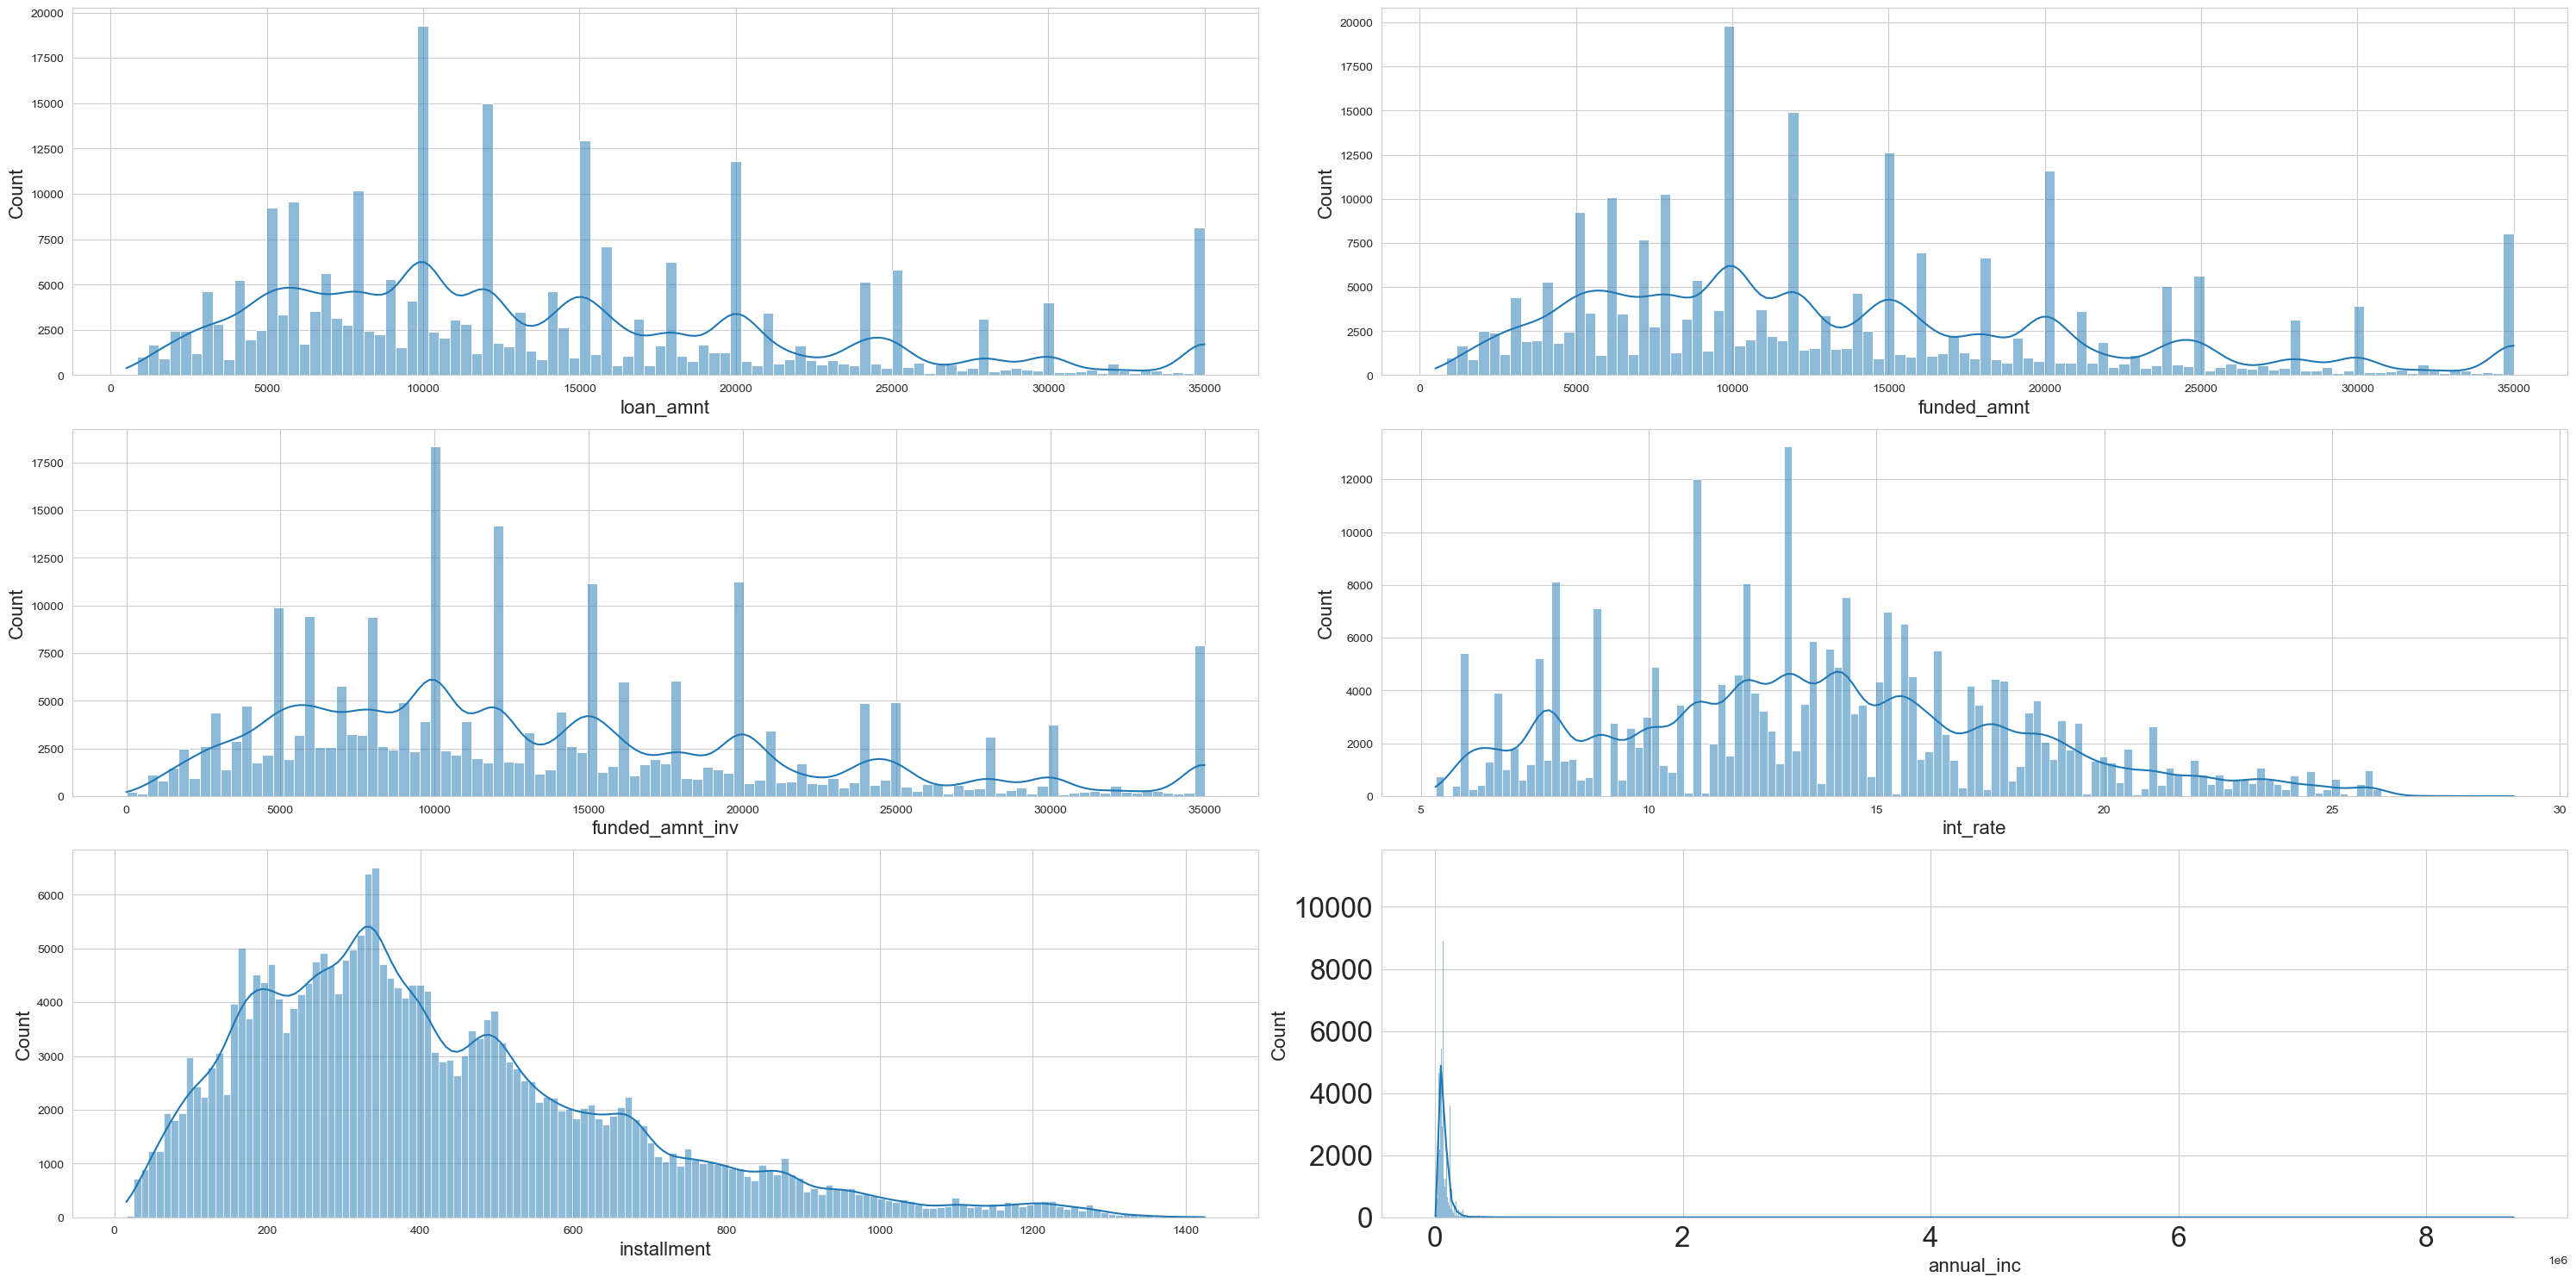

In [1303]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(30, 15))
axs = axs.flatten()

for row, var in enumerate(numeric.columns[:6]):
    sns.histplot(data=df1, x=var, kde=True, ax=axs[row])
    plt.tick_params(axis='both', which='major', labelsize=24)
    axs[row].set_xlabel(f'{var}', fontsize=16)  
    axs[row].set_ylabel('Count', fontsize=16)   
    axs[row].grid(True)
    
        
   
plt.tight_layout()

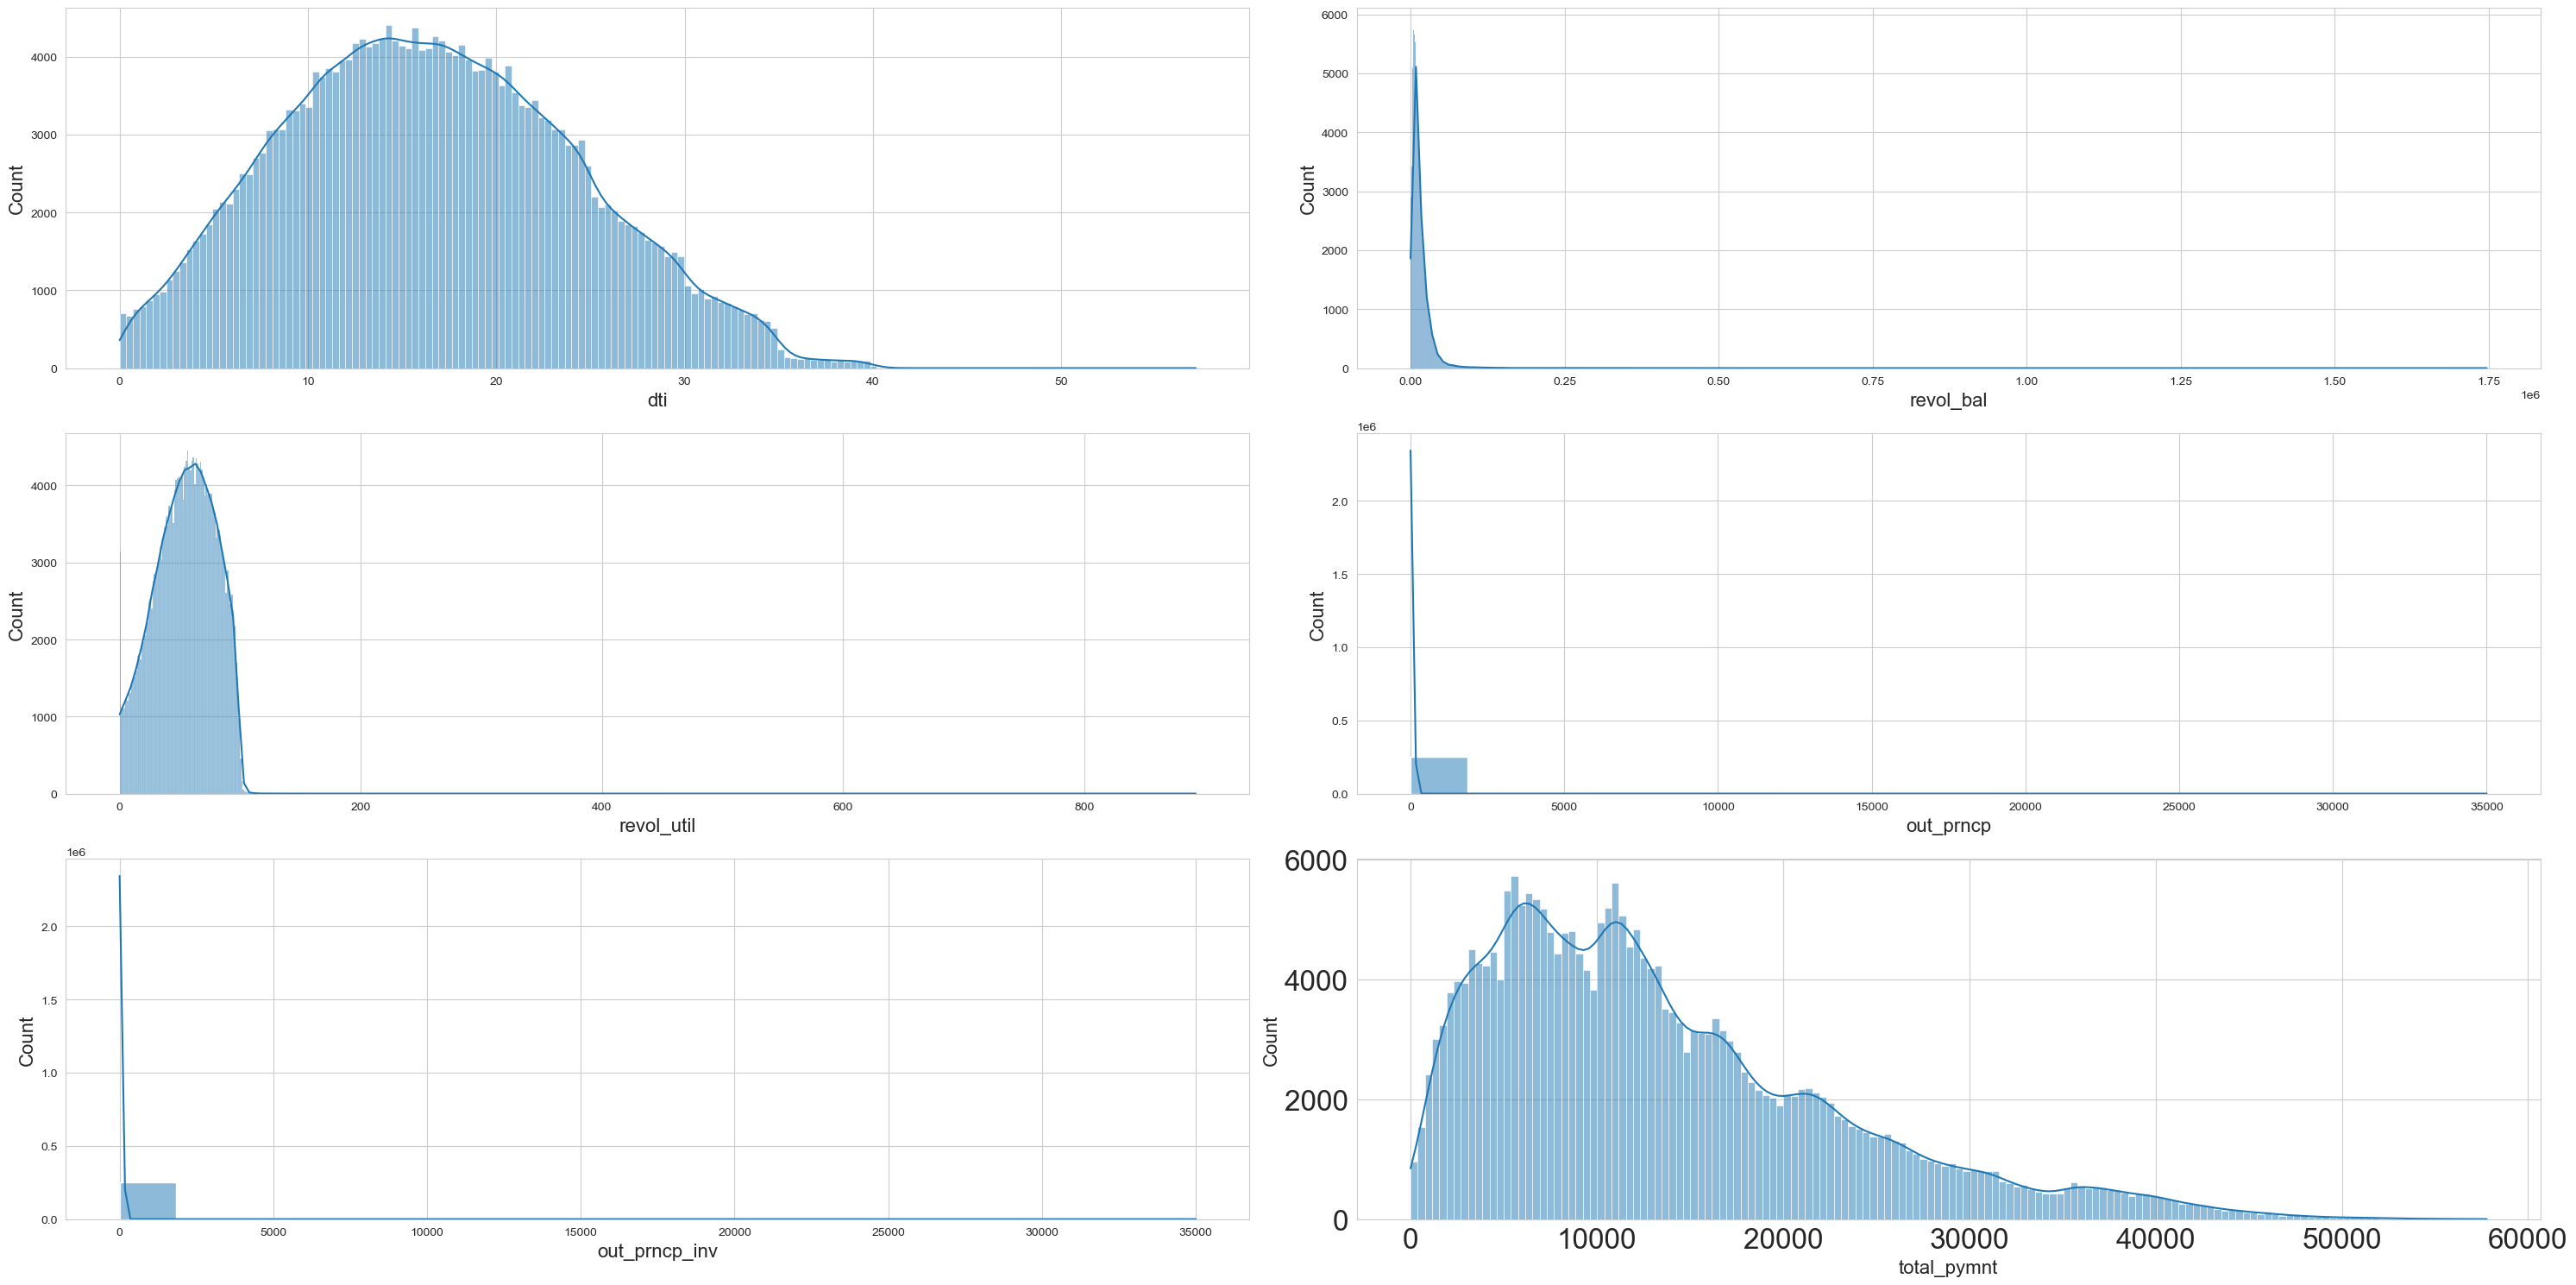

In [1304]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(30, 15))
axs = axs.flatten()

for row, var in enumerate(numeric.columns[6:12]):
    sns.histplot(data=df1, x=var, kde=True, ax=axs[row])
    plt.tick_params(axis='both', which='major', labelsize=24)
    axs[row].set_xlabel(f'{var}', fontsize=16)  
    axs[row].set_ylabel('Count', fontsize=16)   
    axs[row].grid(True)
    
        
   
plt.tight_layout()

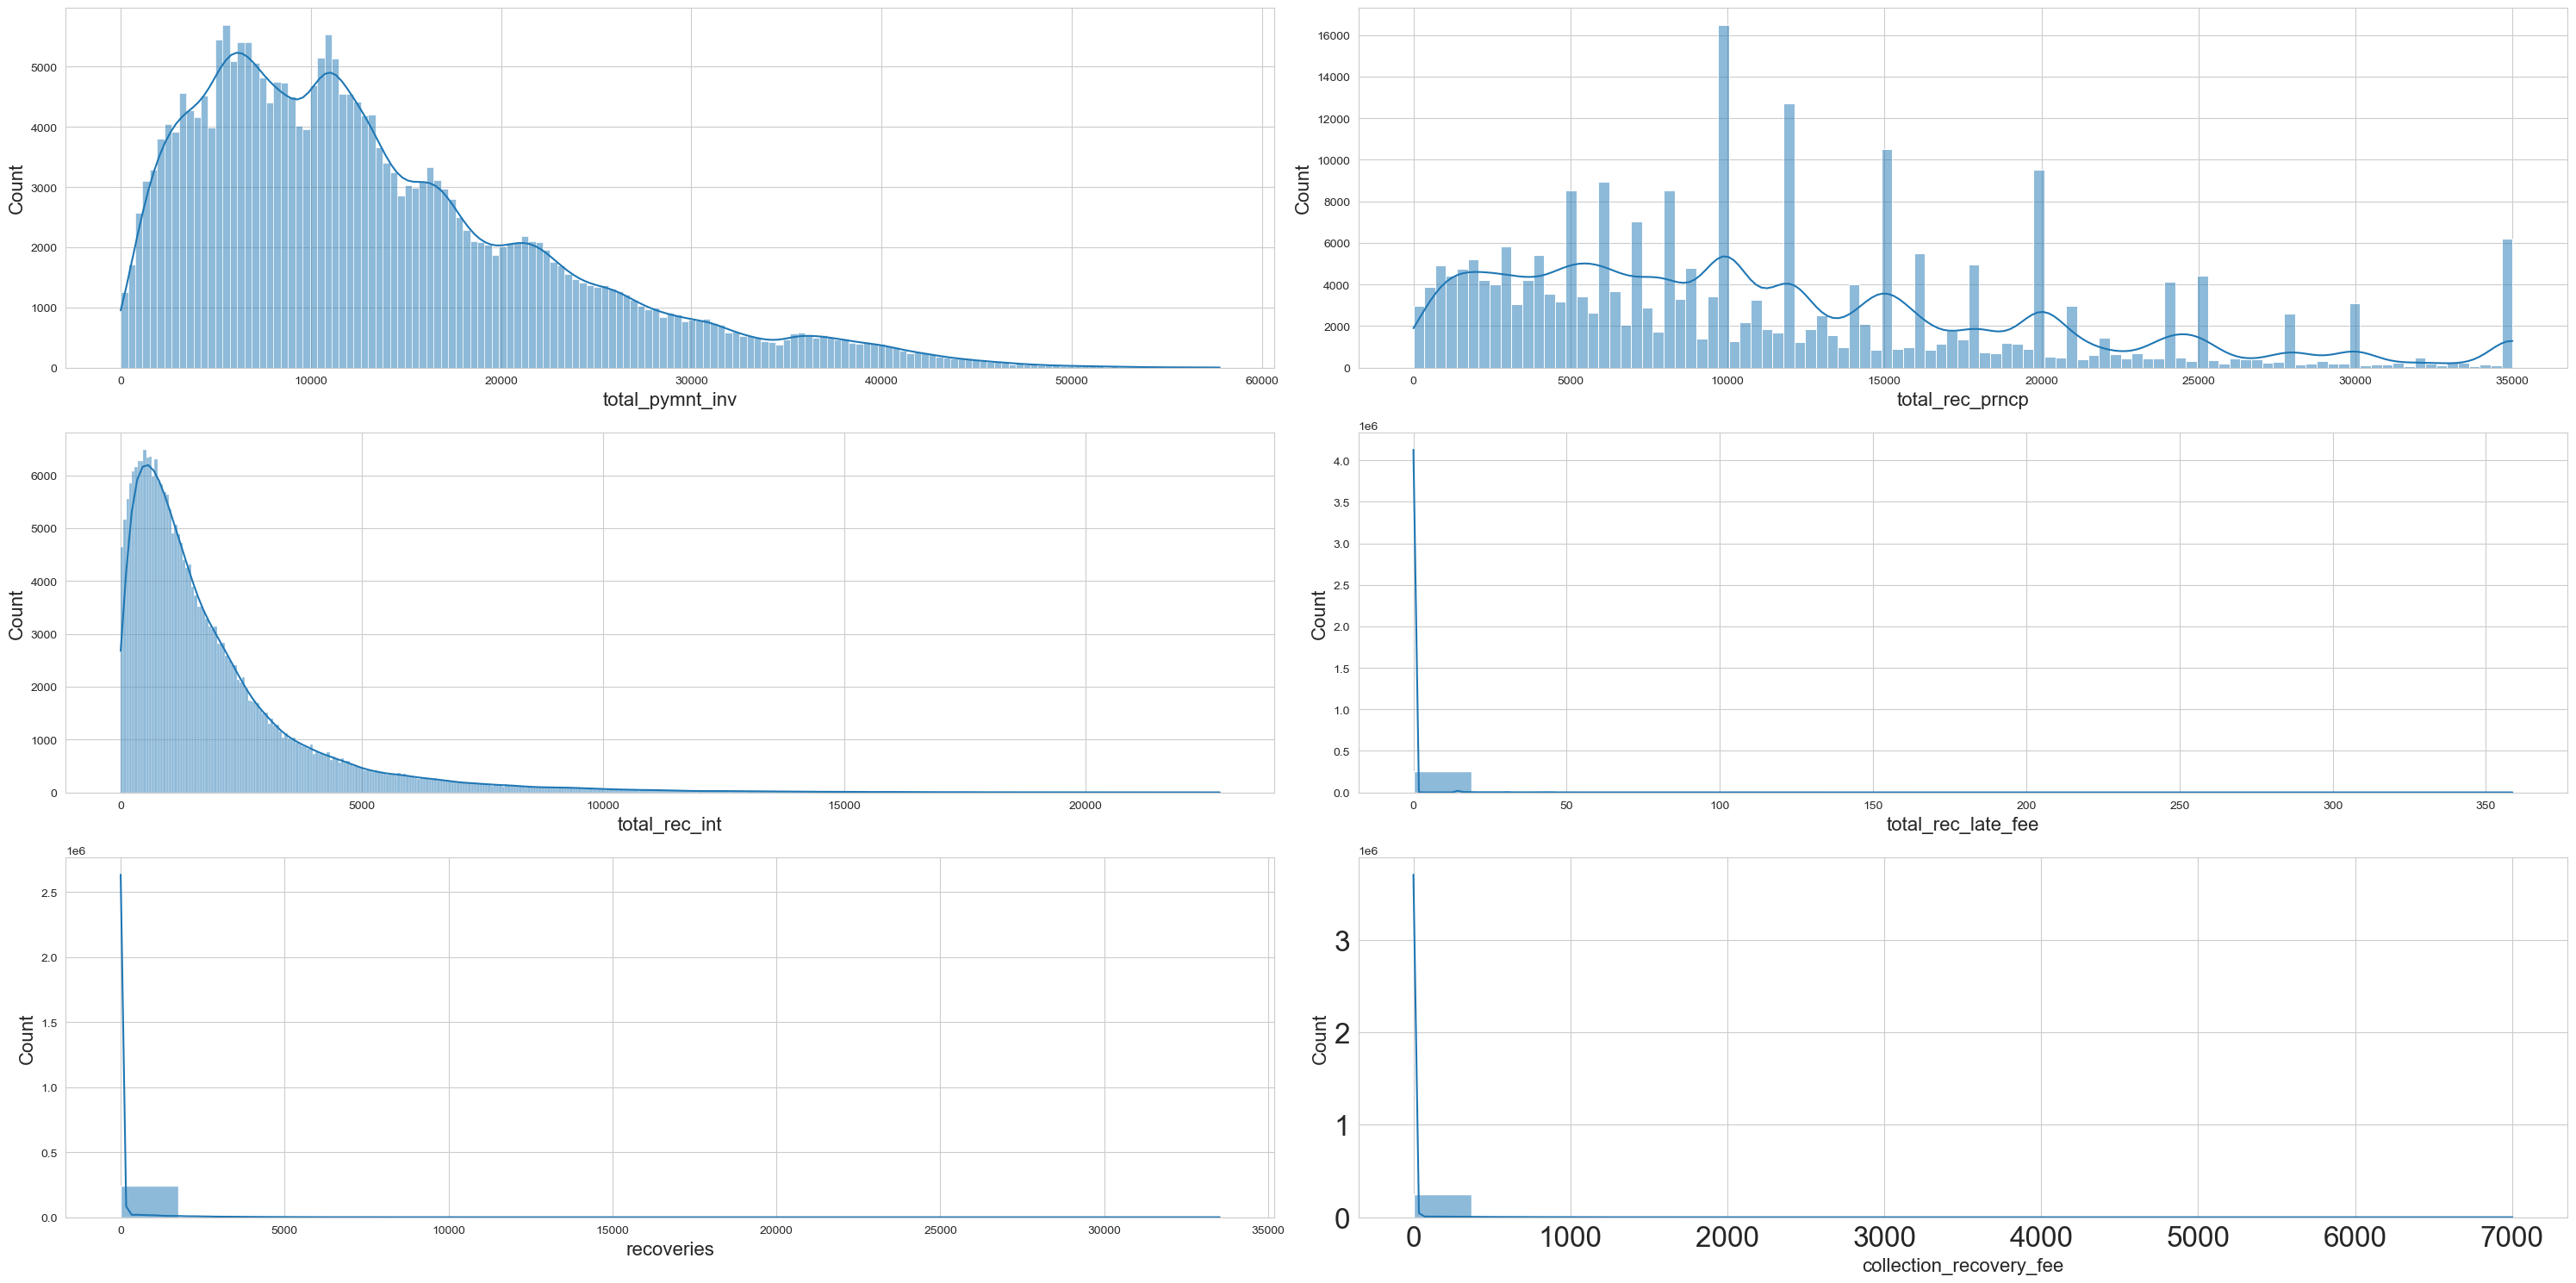

In [1312]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(30, 15))
axs = axs.flatten()

for row, var in enumerate(numeric.columns[12:18]):
    sns.histplot(data=df1, x=var, kde=True, ax=axs[row])
    plt.tick_params(axis='both', which='major', labelsize=24)
    axs[row].set_xlabel(f'{var}', fontsize=16)  
    axs[row].set_ylabel('Count', fontsize=16)   
    axs[row].grid(True)
    
        
   
plt.tight_layout()

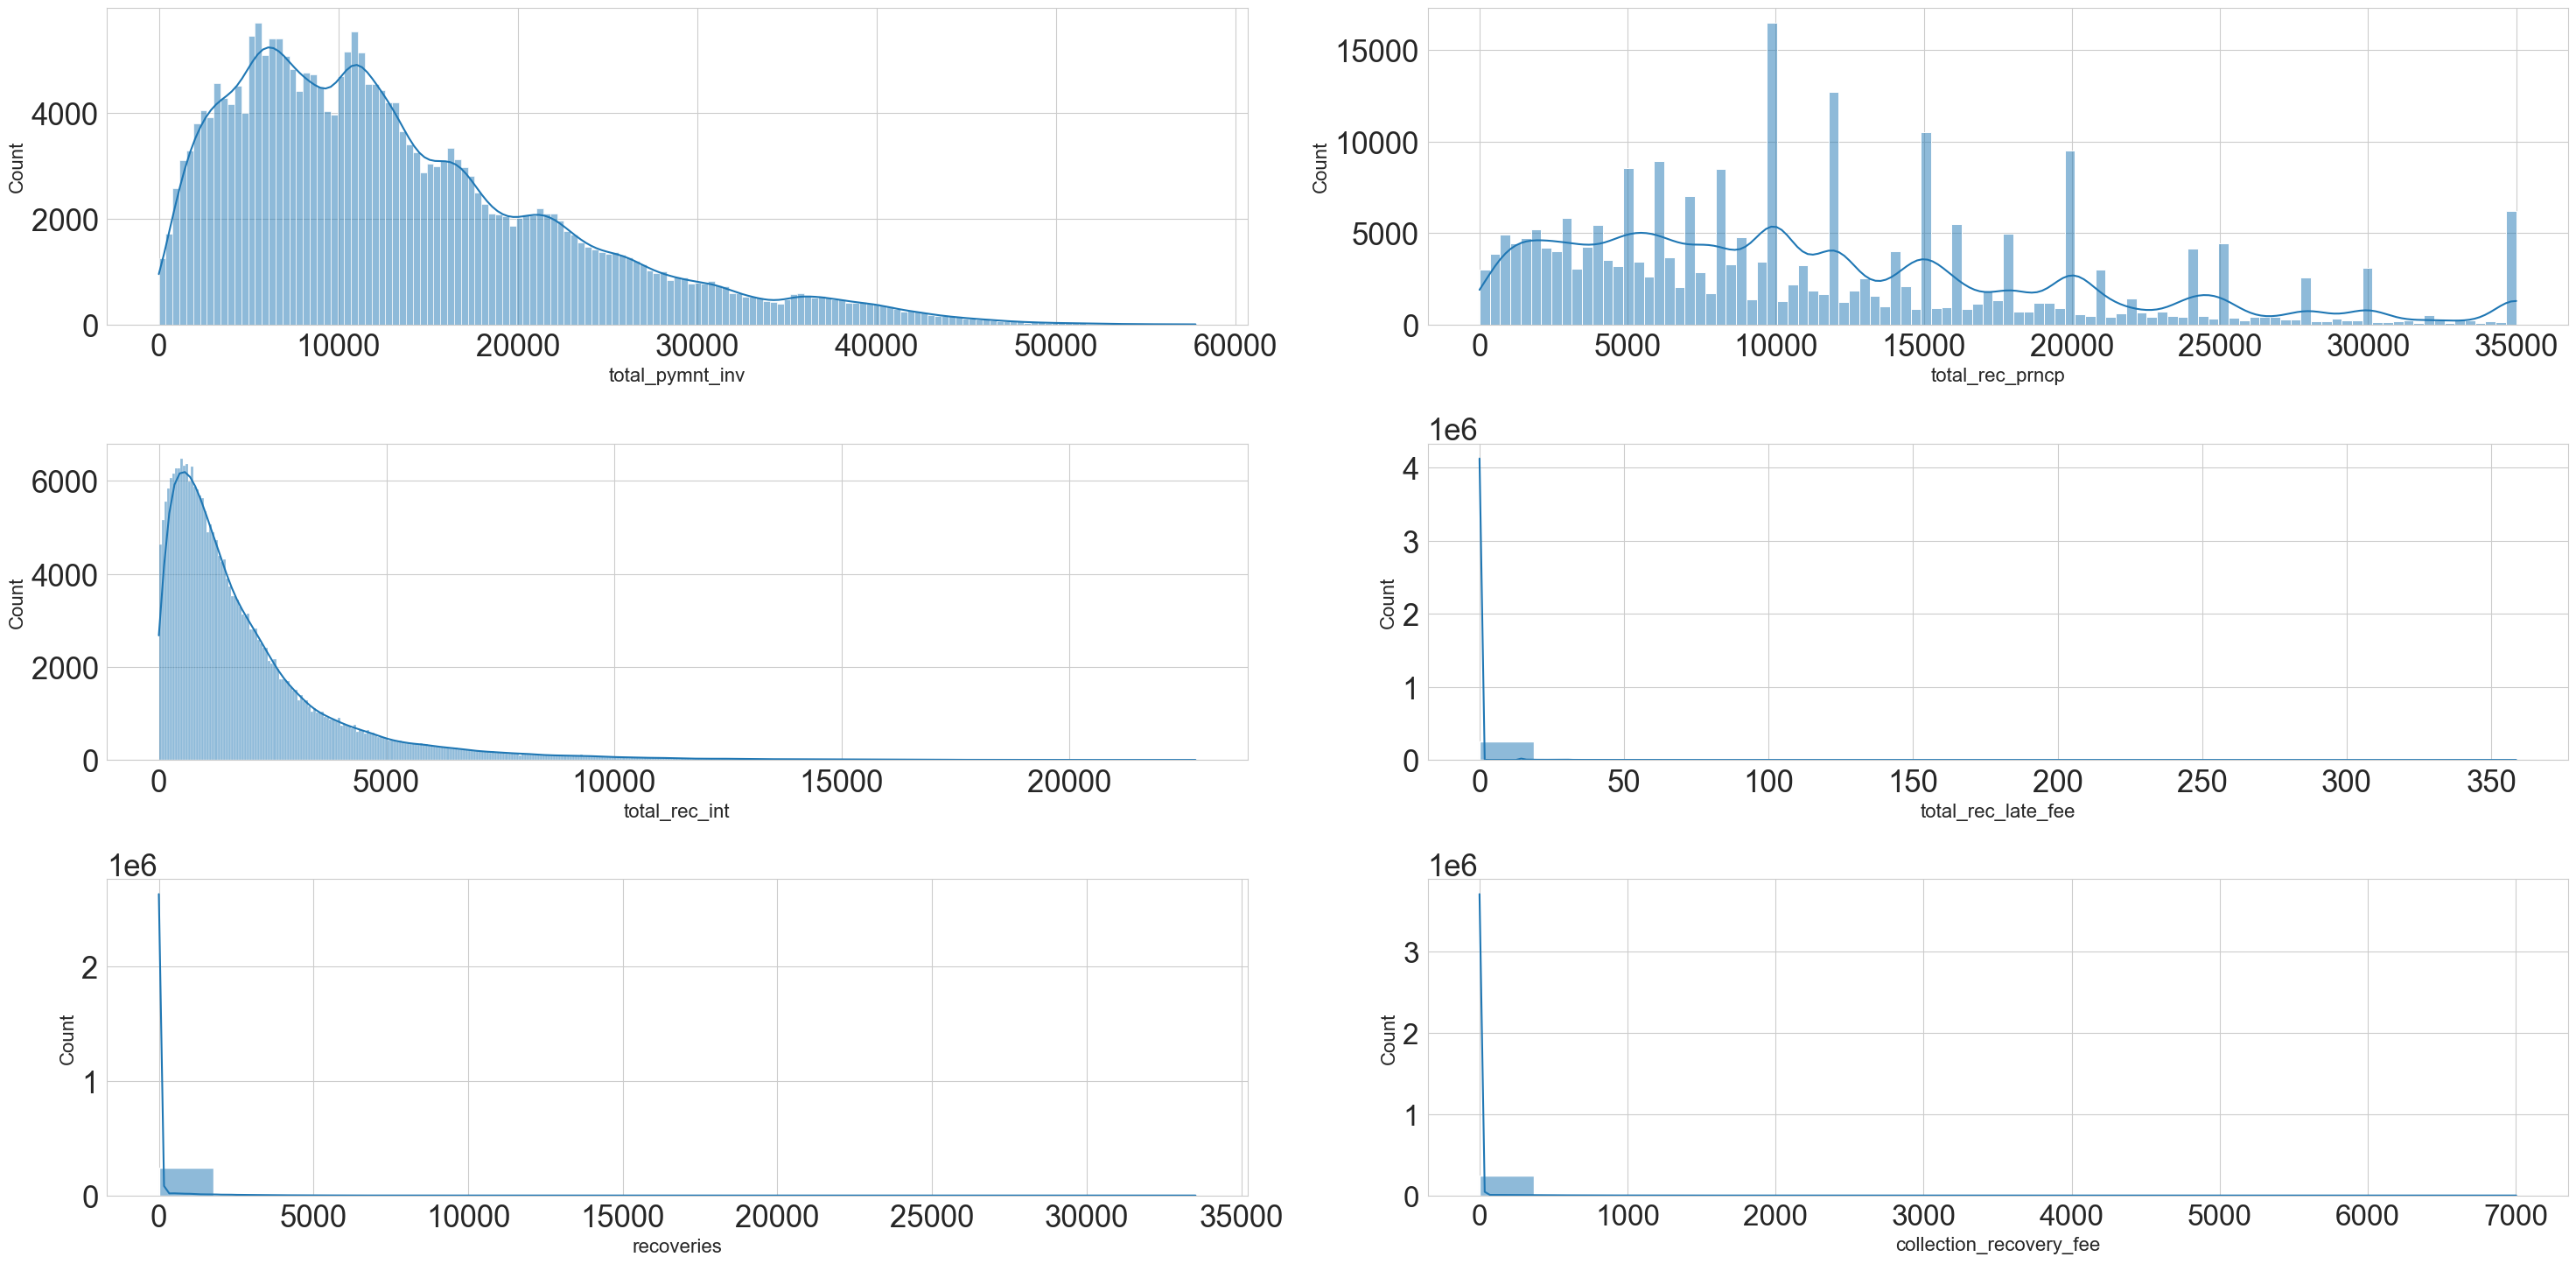

In [1362]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(30, 15))
axs = axs.flatten()

for row, var in enumerate(numeric.columns[18:24]):
    sns.histplot(data=df1, x=var, kde=True, ax=axs[row])
    plt.tick_params(axis='both', which='major', labelsize=24)
    axs[row].set_xlabel(f'{var}', fontsize=16)  
    axs[row].set_ylabel('Count', fontsize=16)   
    axs[row].grid(True)
    
        
   
plt.tight_layout()

Text(0.5, 0, 'sub_regions')

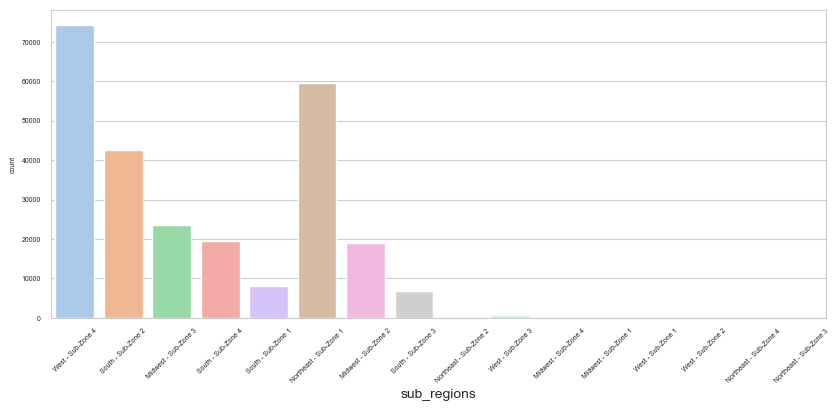

In [1397]:
plt.rc('font', size=5)
plt.figure(figsize = (10,4))
sns.countplot(df1, x = 'sub-regions',palette= 'pastel')
plt.tick_params('x', rotation = 45)
plt.xlabel('sub_regions', fontsize = 10)

Text(0.5, 0, 'sub_grade')

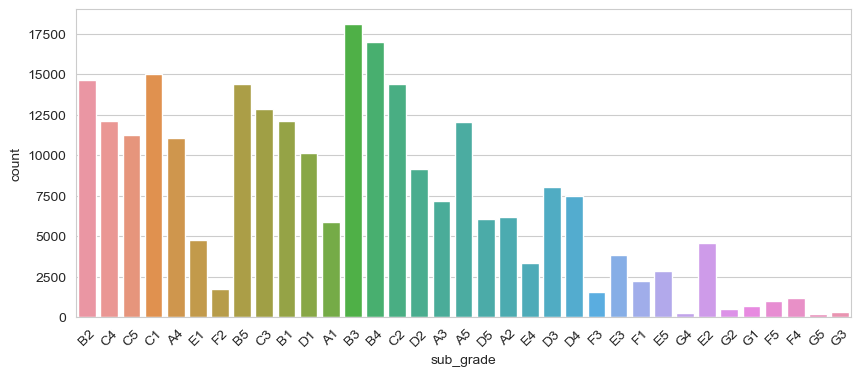

In [1389]:
plt.rc('font', size=10)
plt.figure(figsize = (10,4))
sns.countplot(df1, x = 'sub_grade')
plt.tick_params('x', rotation = 45)
plt.xlabel('sub_grade', fontsize = 10)

Text(0.5, 0, 'emp_length')

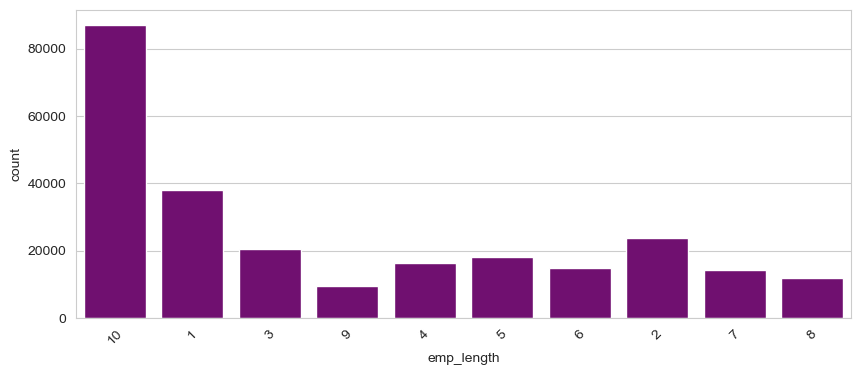

In [1405]:
plt.rc('font', size=10)
plt.figure(figsize = (10,4))
sns.countplot(df1, x = 'emp_length',color = 'purple')
plt.tick_params('x', rotation = 45)
plt.xlabel('emp_length', fontsize = 10)

Text(0.5, 0, 'purpose')

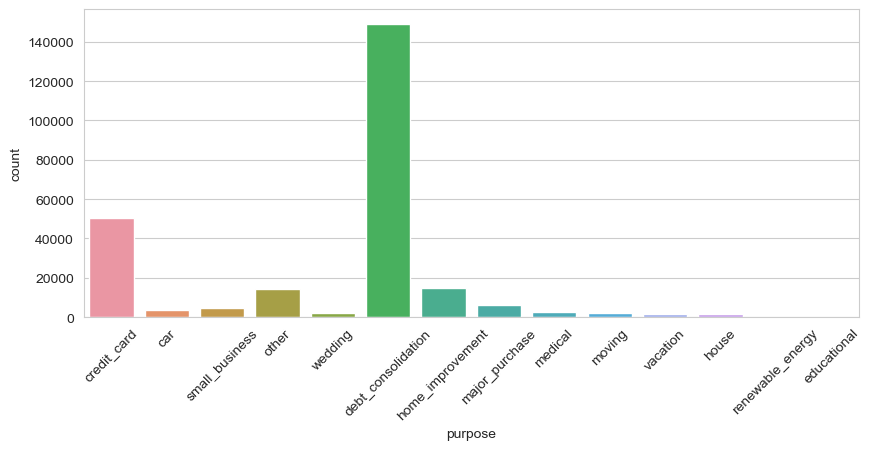

In [1406]:
plt.rc('font', size=10)
plt.figure(figsize = (10,4))
sns.countplot(df1, x = 'purpose')
plt.tick_params('x', rotation = 45)
plt.xlabel('purpose', fontsize = 10)

Text(0.5, 0, 'home_ownership')

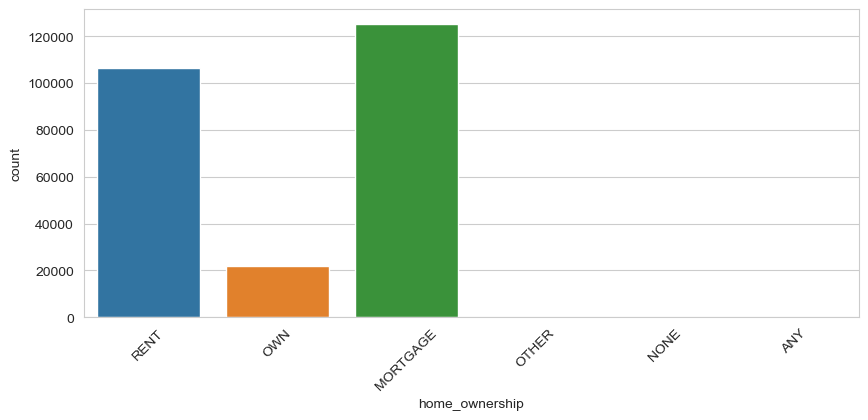

In [1407]:
plt.rc('font', size=10)
plt.figure(figsize = (10,4))
sns.countplot(df1, x = 'home_ownership')
plt.tick_params('x', rotation = 45)
plt.xlabel('home_ownership', fontsize = 10)

In [1398]:
cat.columns

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'title', 'initial_list_status',
       'region', 'sub-regions', 'emp_title_fe'],
      dtype='object')

# Bivariate analysis

In [1313]:
def count_plot(data,x,y):
    sns.countplot(data  = data, x = x, hue = y)
    plt.title(f'Distributon of {x} with {y}  ')
    

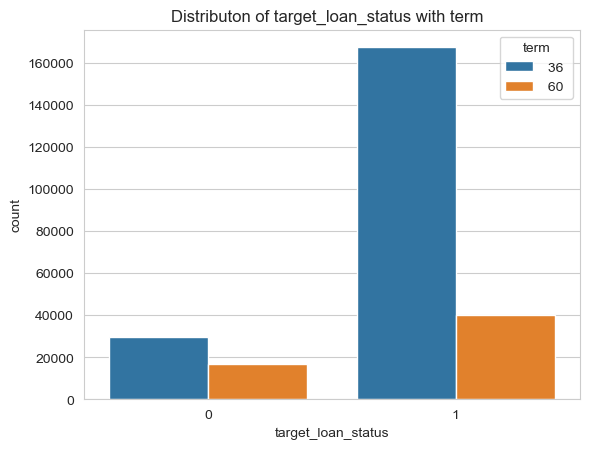

In [1315]:
count_plot(df1,'target_loan_status','term')

In [1316]:
import warnings
warnings.filterwarnings('ignore')

In [581]:
df1['loan_stat_enco'] = df1['loan_stat_enco'].astype('object')

In [619]:
def count_pl(data,x,y):
    sns.countplot(data = data,x = x ,hue = y)
   # plt.text(x = 6, y = 4, s = 6)
    #plt.text(i, y[i], y[i], ha = 'center')
    plt.tight_layout()

In [1319]:
cat = df1.select_dtypes(include = ['object'])

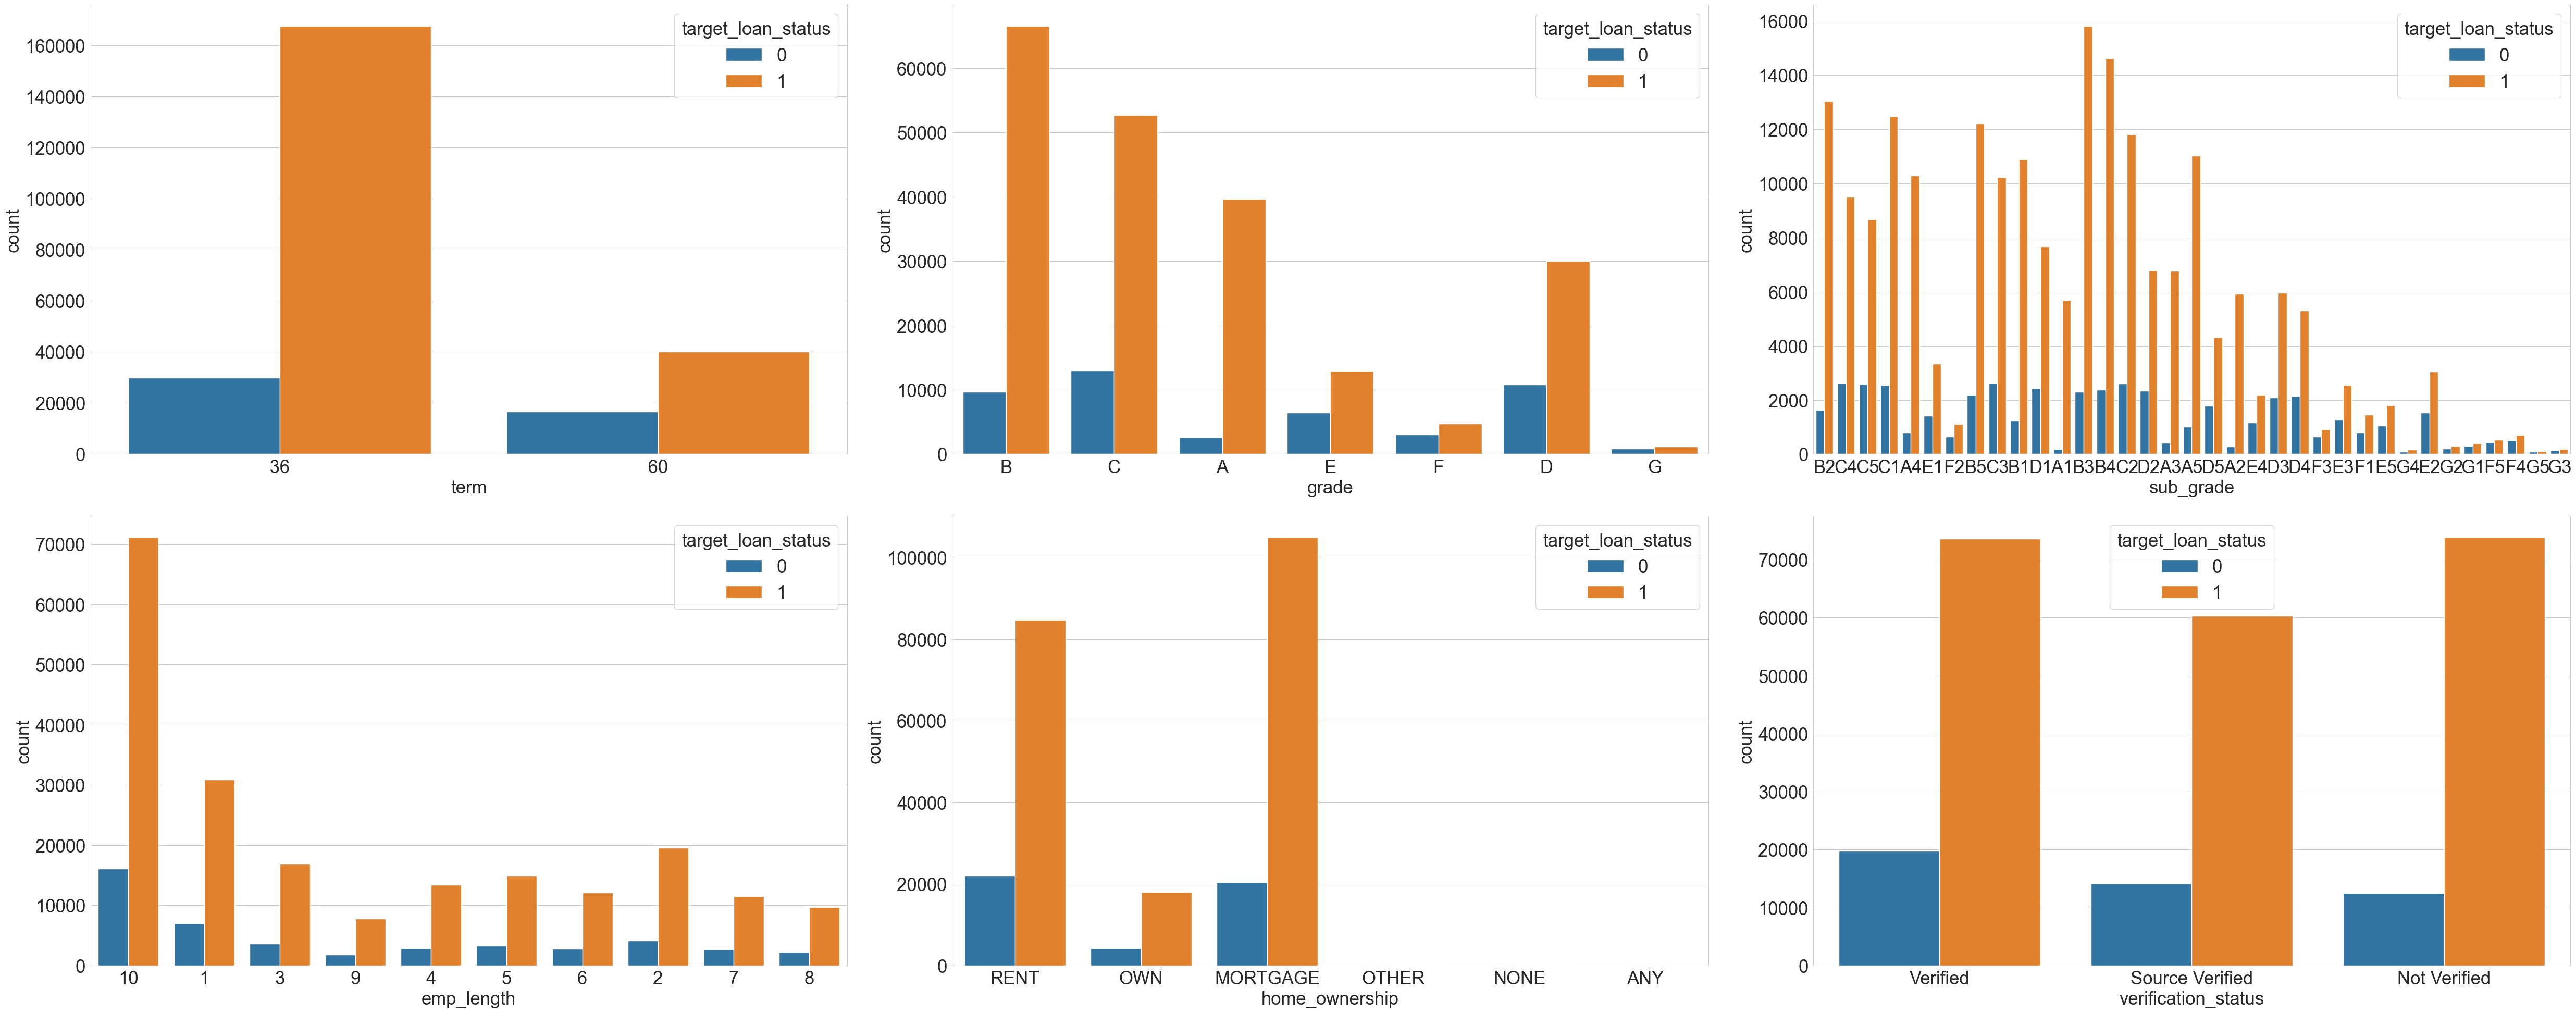

In [1338]:
plt.rc('font', size=25)
fig,axs = plt.subplots(nrows = 2, ncols = 3,figsize = (50,20))
axs = axs.flatten()
for row, var in enumerate(cat.columns[:6]):
    sns.countplot(data = df1,x = var ,hue ='target_loan_status', ax = axs[row])
    plt.tight_layout()



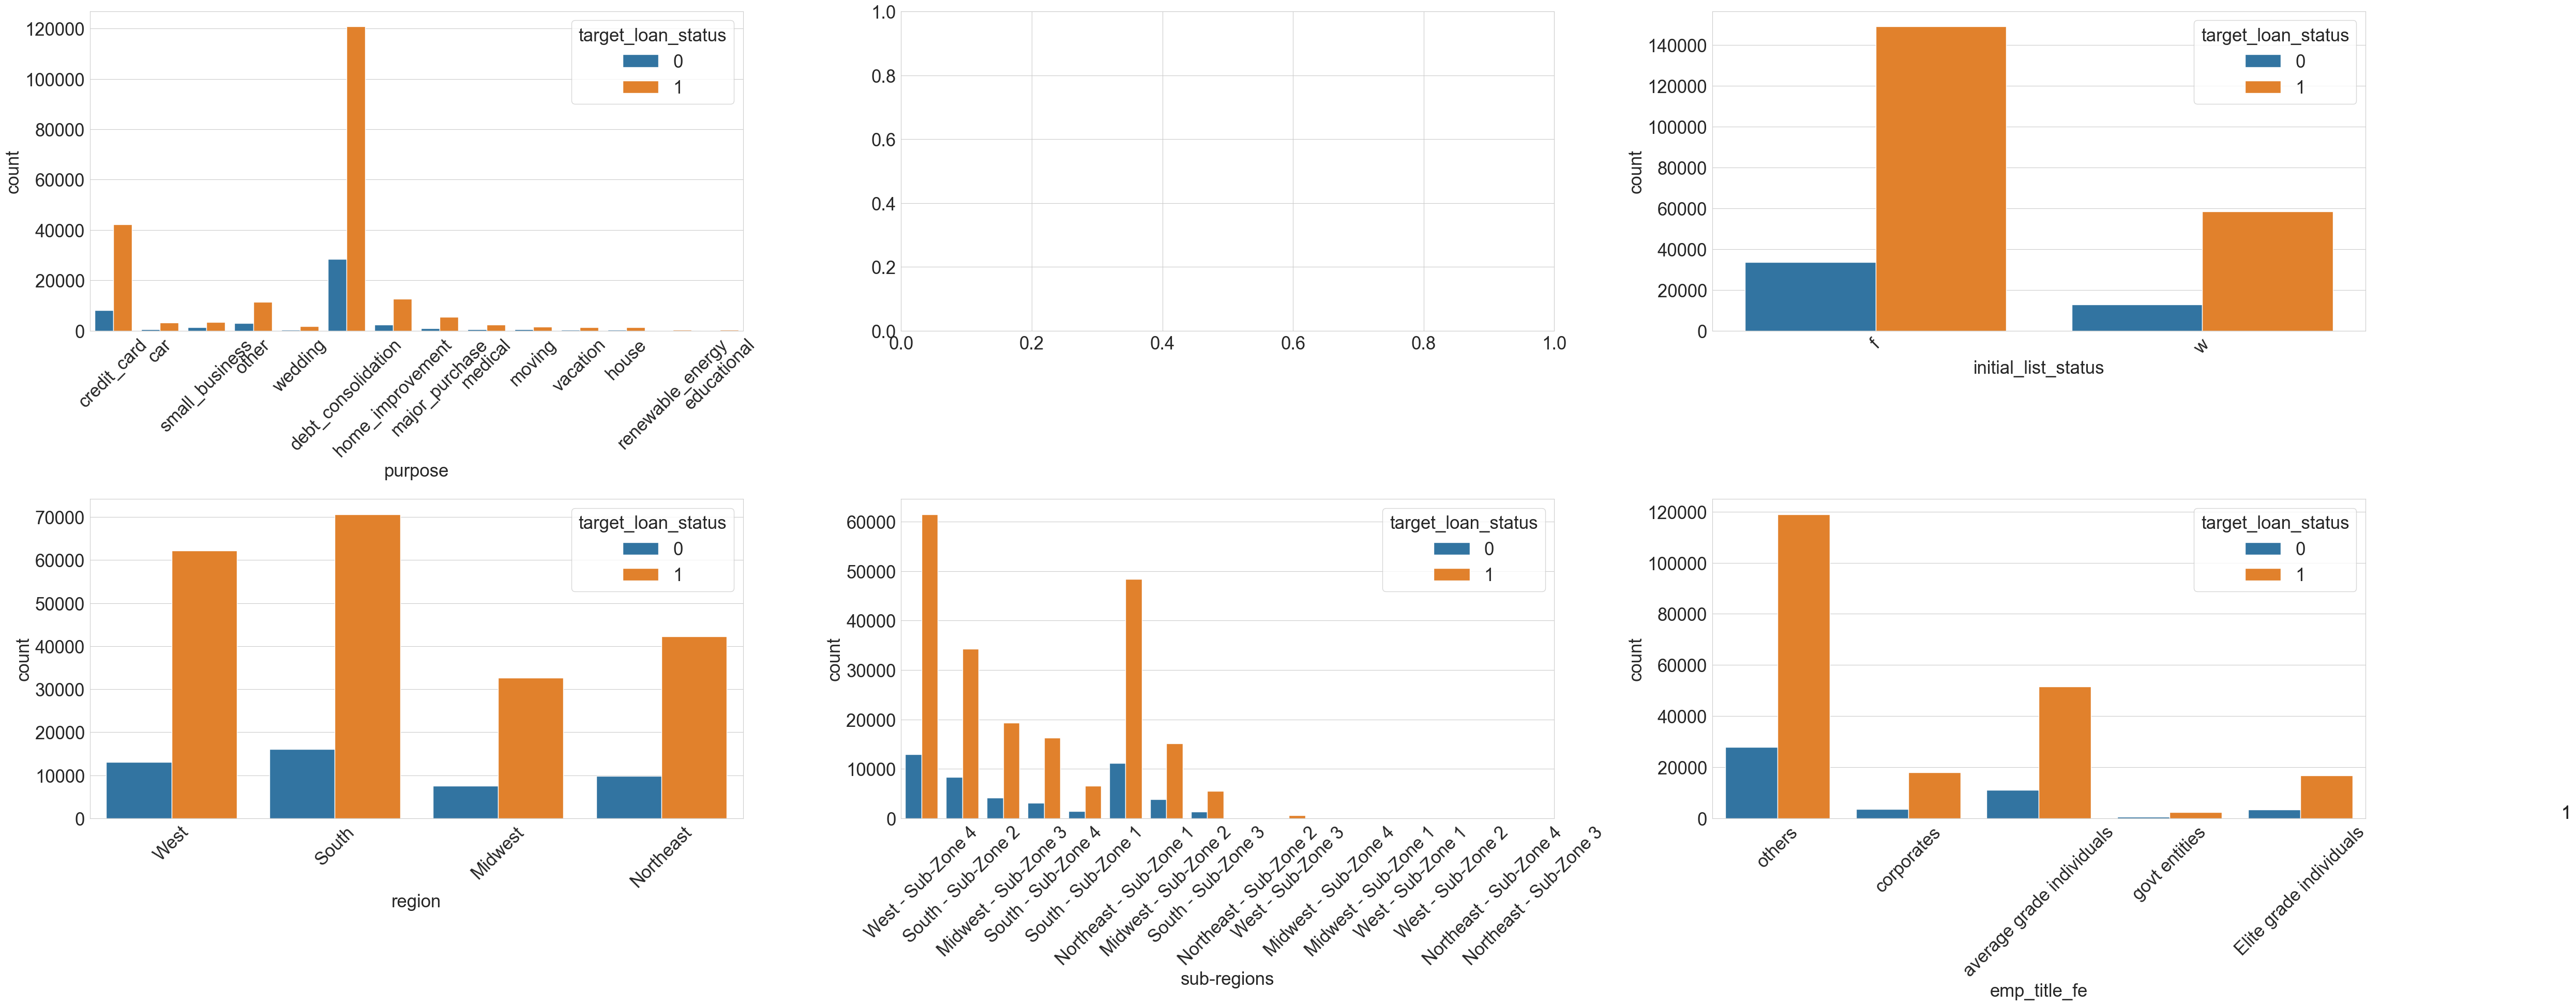

In [1341]:
plt.rc('font', size=25)
fig,axs = plt.subplots(nrows = 2, ncols = 3,figsize = (50,20))
axs = axs.flatten()
for row, var in enumerate(cat.columns[6:12]):
    if var == 'title':
        pass
    else:
        sns.countplot(data = df1,x = var ,hue ='target_loan_status', ax = axs[row])
        plt.text(x = 6, y = 3, s = 1)
        axs[row].tick_params(axis='x', rotation=45)
        #plt.text(i, y[i], y[i], ha = 'center')
        plt.tight_layout()

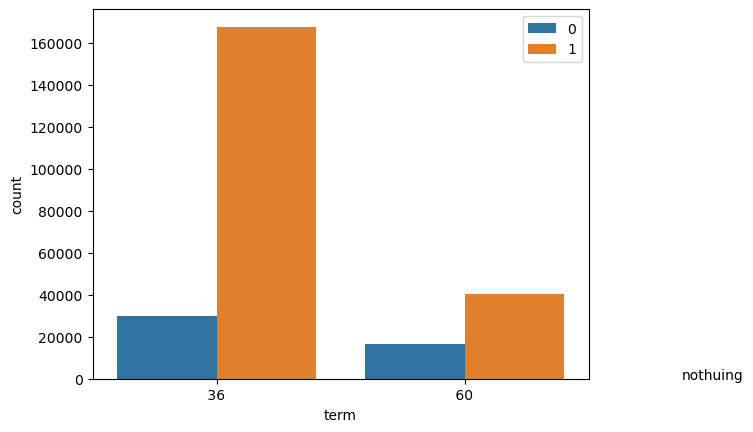

In [640]:
sns.countplot(data = df1,x ='term',hue ='loan_stat_enco')
plt.text(2, 2, 'nothuing', ha = 'center')
plt.legend()

In [1366]:
bivar_gp(df1,'region','target_loan_status',)

target_loan_status     region  Count_0  Count_1  Total  Percentage_0
0                     Midwest     7536    32597  40133     18.777565
1                   Northeast     9811    42263  52074     18.840496
2                       South    16089    70678  86767     18.542764
3                        West    13031    62185  75216     17.324771

In [1367]:
bivar_gp(df1,'sub-regions','target_loan_status',)

target_loan_status             sub-regions  Count_0  Count_1  Total  \
0                     Midwest - Sub-Zone 1        1        7      8   
1                     Midwest - Sub-Zone 2     3790    15132  18922   
2                     Midwest - Sub-Zone 3     4196    19280  23476   
3                     Midwest - Sub-Zone 4        0       10     10   
4                   Northeast - Sub-Zone 1    11141    48441  59582   
5                   Northeast - Sub-Zone 2        4       10     14   
6                   Northeast - Sub-Zone 3        2        2      4   
7                   Northeast - Sub-Zone 4        2       13     15   
8                       South - Sub-Zone 1     1473     6572   8045   
9                       South - Sub-Zone 2     8323    34247  42570   
10                      South - Sub-Zone 3     1357     5512   6869   
11                      South - Sub-Zone 4     3147    16312  19459   
12                       West - Sub-Zone 1        4       11     15   
13                       West - Sub-Zone 2        2        9     11   
14                       West - Sub-Zone 3      106      643    749   
15                       West - Sub-Zone 4    12919    61522  74441   

target_loan_status  Percentage_0  
0                      12.500000  
1                      20.029595  
2                      17.873573  
3                       0.000000  
4                      18.698600  
5                      28.571429  
6                      50.000000  
7                      13.333333  
8                      18.309509  
9                      19.551327  
10                     19.755423  
11                     16.172465  
12                     26.666667  
13                     18.181818  
14                     14.152203  
15                     17.354684

In [1123]:
bivar_gp(new_df,'emp_title_fe','loan_stat_enco',)

loan_stat_enco               emp_title_fe  Count_0  Count_1   Total  \
0                 Elite grade individuals     3465    16816   20281   
1               average grade individuals    11034    51508   62542   
2                              corporates     3672    18031   21703   
3                           govt entities      480     2356    2836   
4                                  others    27816   119012  146828   

loan_stat_enco  Percentage_0  
0                  17.084956  
1                  17.642544  
2                  16.919320  
3                  16.925247  
4                  18.944615

In [1368]:
bivar_gp(df1,'purpose','target_loan_status',)

target_loan_status             purpose  Count_0  Count_1   Total  Percentage_0
0                                  car      458     3198    3656     12.527352
1                          credit_card     8059    42250   50309     16.019003
2                   debt_consolidation    28389   120764  149153     19.033476
3                          educational       56      269     325     17.230769
4                     home_improvement     2316    12660   14976     15.464744
5                                house      293     1366    1659     17.661242
6                       major_purchase      888     5391    6279     14.142379
7                              medical      584     2285    2869     20.355525
8                               moving      436     1603    2039     21.383031
9                                other     3001    11341   14342     20.924557
10                    renewable_energy       54      213     267     20.224719
11                      small_business     1390     3375    4765     29.171039
12                            vacation      278     1318    1596     17.418546
13                             wedding      265     1690    1955     13.554987

# Insights

* Here, we can see that the highest number of defaulters are from the group who borrowed loan for 'small_business purpose, followed by moving, medical,renewable_energy,, with each passing 20% mark, which signifies that out of  all the loan that has been borrowed under that partciular purpose has, 20% turned out to be defaulters.

In [1364]:
bivar_gp(df1,'grade','target_loan_status',)

target_loan_status grade  Count_0  Count_1  Total  Percentage_0
0                      A     2664    39679  42343      6.291477
1                      B     9717    66546  76263     12.741434
2                      C    13002    52678  65680     19.795981
3                      D    10798    30020  40818     26.454015
4                      E     6459    12928  19387     33.316140
5                      F     3013     4726   7739     38.932679
6                      G      814     1146   1960     41.530612

#  Insights

* We can see clearly that as grades are degrading, percentage of defaulters are getting increased significantly.
* It can be seen that grade A, and B has comparatively smaller % of defaulters, while F and G has the  highest with 38% and  41.53% percent of defaulters.
* BUt here, major issue seems to be with grade C and D,both combined accumulates approximately to 35% of total data, and thier default percentage is also somewhere arond 20%.


In [1369]:
cat.columns

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'title', 'initial_list_status',
       'region', 'sub-regions', 'emp_title_fe'],
      dtype='object')

In [1375]:
bivar_gp(df1,'home_ownership','target_loan_status',)

target_loan_status home_ownership  Count_0  Count_1   Total  Percentage_0
0                             ANY        0        1       1      0.000000
1                        MORTGAGE    20376   104966  125342     16.256323
2                            NONE        7       36      43     16.279070
3                           OTHER       27      114     141     19.148936
4                             OWN     4135    17960   22095     18.714641
5                            RENT    21922    84646  106568     20.570903

In [1373]:
bivar_gp(df1,'emp_length','target_loan_status',)

target_loan_status emp_length  Count_0  Count_1  Total  Percentage_0
0                           1     7001    30925  37926     18.459632
1                          10    16104    71120  87224     18.462808
2                           2     4119    19528  23647     17.418700
3                           3     3638    16846  20484     17.760203
4                           4     2841    13422  16263     17.469102
5                           5     3280    14856  18136     18.085576
6                           6     2758    12058  14816     18.615011
7                           7     2673    11483  14156     18.882453
8                           8     2227     9695  11922     18.679752
9                           9     1826     7790   9616     18.989185

In [1374]:
bivar_gp(df1,'initial_list_status','target_loan_status',)

target_loan_status initial_list_status  Count_0  Count_1   Total  Percentage_0
0                                    f    33601   149146  182747     18.386622
1                                    w    12866    58577   71443     18.008762

In [1370]:
bivar_gp(df1,'verification_status','target_loan_status',)

target_loan_status verification_status  Count_0  Count_1  Total  Percentage_0
0                         Not Verified    12486    73856  86342     14.461097
1                      Source Verified    14202    60271  74473     19.069999
2                             Verified    19779    73596  93375     21.182329

# Insights

* Seems like,  some serious issues persists in their income verifciation check process at Lending Club, becuase the highest number of defualters belong to the the source verified and verified category, while the defualters who wasn't verified , has 14.46% of default ratio, comparatively to that of 19% and 21.18%.

In [1376]:
bivar_gp(df1,'sub_grade','target_loan_status',)

target_loan_status sub_grade  Count_0  Count_1  Total  Percentage_0
0                         A1      181     5689   5870      3.083475
1                         A2      283     5925   6208      4.558634
2                         A3      406     6774   7180      5.654596
3                         A4      790    10279  11069      7.137049
4                         A5     1004    11012  12016      8.355526
5                         B1     1242    10883  12125     10.243299
6                         B2     1619    13035  14654     11.048178
7                         B3     2297    15809  18106     12.686402
8                         B4     2382    14610  16992     14.018362
9                         B5     2177    12209  14386     15.132768
10                        C1     2547    12476  15023     16.954004
11                        C2     2609    11810  14419     18.094181
12                        C3     2627    10227  12854     20.437218
13                        C4     2634     9492  12126     21.721920
14                        C5     2585     8673  11258     22.961450
15                        D1     2431     7678  10109     24.047878
16                        D2     2344     6781   9125     25.687671
17                        D3     2091     5951   8042     26.000995
18                        D4     2155     5299   7454     28.910652
19                        D5     1777     4311   6088     29.188568
20                        E1     1421     3332   4753     29.896907
21                        E2     1529     3055   4584     33.355148
22                        E3     1286     2558   3844     33.454735
23                        E4     1173     2184   3357     34.941912
24                        E5     1050     1799   2849     36.855037
25                        F1      793     1460   2253     35.197514
26                        F2      643     1114   1757     36.596471
27                        F3      641      919   1560     41.089744
28                        F4      505      696   1201     42.048293
29                        F5      431      537    968     44.524793
30                        G1      297      397    694     42.795389
31                        G2      206      297    503     40.954274
32                        G3      146      190    336     43.452381
33                        G4       78      158    236     33.050847
34                        G5       87      104    191     45.549738

In [1377]:
bivar_gp(df1,'term','target_loan_status',)

target_loan_status  term  Count_0  Count_1   Total  Percentage_0
0                    36     29798   167575  197373     15.097303
1                    60     16669    40148   56817     29.338050

# Inisghts

* borrowers whose loan repayment period is 60 months turned to be dafulting more comaparatively to that with 36 months of period.